# Backtesting Crossover Strategies on Hourly datasets for Ether and BTC

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Backtesting-Crossover-Strategies-on-Hourly-datasets-for-Ether-and-BTC" data-toc-modified-id="Backtesting-Crossover-Strategies-on-Hourly-datasets-for-Ether-and-BTC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Backtesting Crossover Strategies on Hourly datasets for Ether and BTC</a></span><ul class="toc-item"><li><span><a href="#Preparations:" data-toc-modified-id="Preparations:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preparations:</a></span></li></ul></li><li><span><a href="#ETHER" data-toc-modified-id="ETHER-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ETHER</a></span><ul class="toc-item"><li><span><a href="#Download-and-organise-data-from-Binance-(ETH-/-USDT)-1-hour-candles" data-toc-modified-id="Download-and-organise-data-from-Binance-(ETH-/-USDT)-1-hour-candles-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Download and organise data from Binance (ETH / USDT) 1 hour candles</a></span></li><li><span><a href="#Lets-see-how-the-downloaded-data-looks-like" data-toc-modified-id="Lets-see-how-the-downloaded-data-looks-like-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Lets see how the downloaded data looks like</a></span></li><li><span><a href="#EMA-and-Price-Crossover-Backtest-on-ETH-/-USDT" data-toc-modified-id="EMA-and-Price-Crossover-Backtest-on-ETH-/-USDT-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>EMA and Price Crossover Backtest on ETH / USDT</a></span></li><li><span><a href="#Optimise-parameters-for-EMA-and-Price-Crossover" data-toc-modified-id="Optimise-parameters-for-EMA-and-Price-Crossover-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Optimise parameters for EMA and Price Crossover</a></span></li><li><span><a href="#Simple-EMA-crossover-strategy-for-Ether" data-toc-modified-id="Simple-EMA-crossover-strategy-for-Ether-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Simple EMA crossover strategy for Ether</a></span></li><li><span><a href="#Now-we-can-check-if-the-result-could-be-improved-with-optimised-parameters." data-toc-modified-id="Now-we-can-check-if-the-result-could-be-improved-with-optimised-parameters.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Now we can check if the result could be improved with optimised parameters.</a></span></li><li><span><a href="#Backtest-with-optimised-parameters-for-ETH-/-USDT" data-toc-modified-id="Backtest-with-optimised-parameters-for-ETH-/-USDT-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Backtest with optimised parameters for ETH / USDT</a></span></li></ul></li><li><span><a href="#Bitcoin" data-toc-modified-id="Bitcoin-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bitcoin</a></span><ul class="toc-item"><li><span><a href="#Download-and-organise-data-from-Binance-(BTC-/-USDT)-1-hour-candles" data-toc-modified-id="Download-and-organise-data-from-Binance-(BTC-/-USDT)-1-hour-candles-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Download and organise data from Binance (BTC / USDT) 1 hour candles</a></span></li><li><span><a href="#Visualise-BTC-price-data" data-toc-modified-id="Visualise-BTC-price-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualise BTC price data</a></span></li><li><span><a href="#Backtest:-EMA-and-Price-Crossover-strategy-on-BTC-/-USDT-1h" data-toc-modified-id="Backtest:-EMA-and-Price-Crossover-strategy-on-BTC-/-USDT-1h-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Backtest: EMA and Price Crossover strategy on BTC / USDT 1h</a></span></li><li><span><a href="#Optimise-parameters-for-EMA-and-Price-Crossover" data-toc-modified-id="Optimise-parameters-for-EMA-and-Price-Crossover-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Optimise parameters for EMA and Price Crossover</a></span></li><li><span><a href="#Backtest-Simple-EMA-crossover-strategy" data-toc-modified-id="Backtest-Simple-EMA-crossover-strategy-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Backtest Simple EMA crossover strategy</a></span></li><li><span><a href="#Optimise-Simple-EMA-crossover-strategy-parameters" data-toc-modified-id="Optimise-Simple-EMA-crossover-strategy-parameters-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Optimise Simple EMA crossover strategy parameters</a></span></li><li><span><a href="#Backtest-with-optimised-parameters-for-simple-EMA-crossover" data-toc-modified-id="Backtest-with-optimised-parameters-for-simple-EMA-crossover-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Backtest with optimised parameters for simple EMA crossover</a></span></li></ul></li><li><span><a href="#The-End" data-toc-modified-id="The-End-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Preparations:

In [24]:
# imports
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import matplotlib.pyplot as plt
import pandas as pd

import datetime  # For datetime objects
import pprint
import itertools

import backtrader as bt

from binance.client import Client
from klychi import api_key, api_secret

client = Client(api_key, api_secret)

# to display all of the columns and rows and max width
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# to solve issue of bt plot not showing after re-running the cell
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'  # improves the quality of graphs

# set size for plots (width, height)
plt.rcParams['figure.figsize'] = [18, 14]
plt.style.use('ggplot')

In [2]:
def organise_binance_klines(df, save_csv=False, csv_name=''):
    col_names = ['open_time_unix', 'open', 'high', 'low', 'close', 'volume', 
                 'close_time_unix', 'quote_asset_volume', 'number_of_trades', 
                 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    
    df_new = df.copy()
    
    # change unix time to datetime; binance show time in ms
    df_new['candle-start'] = pd.to_datetime(df_new[0], unit='ms')
    df_new['candle-end'] = pd.to_datetime(df_new[6], unit='ms')
    
    # rename columns
    df_new.columns = col_names + ['candle-start', 'candle-end']
    
    # set index and drop extra columns
    df_new.set_index(['candle-end'], inplace=True)
    
    # change dtypes of data from object to float/int
    df_new = df_new.astype({'open': 'float64', 'high': 'float64', 'low': 'float64', 'close': 'float64',
                            'volume': 'float64','quote_asset_volume': 'float64', 'number_of_trades': 'int64',
                            'taker_buy_base_asset_volume': 'float64', 
                            'taker_buy_quote_asset_volume': 'float64'})
    
    if save_csv:
        df_new.to_csv(path_or_buf=str(csv_name) + '.csv')
    
    return df_new


def printTradeAnalysis(analyzer):
    '''
    Function to print the Technical Analysis results in a nice format.
    '''
    #Get the results we are interested in
    total_open = analyzer.total.open
    total_closed = analyzer.total.closed
    total_won = analyzer.won.total
    total_lost = analyzer.lost.total
    win_streak = analyzer.streak.won.longest
    lose_streak = analyzer.streak.lost.longest
    pnl_net = round(analyzer.pnl.net.total, 2)
    strike_rate = round(number=((total_won / total_closed) * 100), ndigits=2)
    #Designate the rows
    h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
    h2 = ['Strike Rate %','Win Streak', 'Losing Streak', 'PnL Net']
    r1 = [total_open, total_closed,total_won,total_lost]
    r2 = [strike_rate, win_streak, lose_streak, pnl_net]
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("Trade Analysis Results:")
    for row in print_list:
        print(row_format.format('',*row))


def printDrawDown(analyzer):
    '''
    Function to print the DrawDown results in a nice format.
    '''
    ddpct = round(analyzer.drawdown, 2)
    moneydd = round(analyzer.moneydown, 2)
    ddlen = analyzer.len
    maxdd = round(analyzer.max.drawdown, 2)
    maxmoneydd = round(analyzer.max.moneydown, 2)
    maxddlen = analyzer.max.len
    
    # Designate the rows
    h1 = ['DrawDown %', 'Money Down $', 'DrawDown Length']
    h2 = ['Max DrawDown %','Max MoneyDown $ ', 'Max DrawDown Length']
    r1 = [ddpct, moneydd, ddlen]
    r2 = [maxdd, maxmoneydd, maxddlen]
    
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("DrawDown Results:")
    for row in print_list:
        print(row_format.format('',*row))



# ETHER

## Download and organise data from Binance (ETH / USDT) 1 hour candles

In [3]:
# download data (might take a minute)
# ETH/USDT pair at 1 hour granularity
eth_usdt1h_raw = pd.DataFrame(client.get_historical_klines("ETHUSDT", 
                                                           Client.KLINE_INTERVAL_1HOUR, 
                                                           '1 Jan 2017'))

In [4]:
# organise eth/usdt data
eth_usdt1h = organise_binance_klines(eth_usdt1h_raw, save_csv=True, csv_name='eth_usdt1h')

# describe downloaded data
eth_usdt1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17535 entries, 2017-08-17 04:59:59.999000 to 2019-08-21 14:59:59.999000
Data columns (total 13 columns):
open_time_unix                  17535 non-null int64
open                            17535 non-null float64
high                            17535 non-null float64
low                             17535 non-null float64
close                           17535 non-null float64
volume                          17535 non-null float64
close_time_unix                 17535 non-null int64
quote_asset_volume              17535 non-null float64
number_of_trades                17535 non-null int64
taker_buy_base_asset_volume     17535 non-null float64
taker_buy_quote_asset_volume    17535 non-null float64
ignore                          17535 non-null object
candle-start                    17535 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 1.9+ MB


In [5]:
eth_usdt1h.head()

,open_time_unix,open,high,low,close,volume,close_time_unix,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,candle-start
candle-end,,,,,,,,,,,,,
2017-08-17 04:59:59.999,1502942400000,301.13,302.57,298.0,301.61,125.66877,1502945999999,37684.804181,129,80.56377,24193.440789,47039.70675719,2017-08-17 04:00:00
2017-08-17 05:59:59.999,1502946000000,301.61,303.28,300.0,303.10,377.67246,1502949599999,114043.282676,202,328.10428,99079.803569,47250.80517462,2017-08-17 05:00:00
2017-08-17 06:59:59.999,1502949600000,302.40,304.44,301.9,302.68,303.86672,1502953199999,92034.441294,182,259.28668,78525.948613,47176.44458354,2017-08-17 06:00:00
2017-08-17 07:59:59.999,1502953200000,302.68,307.96,302.6,307.96,754.74510,1502956799999,229725.136967,198,592.43176,180297.966961,46884.54339102,2017-08-17 07:00:00
2017-08-17 08:59:59.999,1502956800000,307.95,309.97,307.0,308.62,150.75029,1502960399999,46559.462371,182,140.68470,43451.495398,46771.05734185,2017-08-17 08:00:00


In [6]:
eth_usdt1h.describe()

,open_time_unix,open,high,low,close,volume,close_time_unix,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,1.753500e+04,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,1.753500e+04,1.753500e+04,17535.000000,17535.000000,1.753500e+04
mean,1.534680e+12,369.932457,373.285374,366.293506,369.916627,10535.313058,1.534683e+12,2.862978e+06,5264.191560,5381.007812,1.456724e+06
std,1.831833e+10,255.753336,259.020557,252.015708,255.743146,13823.325083,1.831833e+10,3.309800e+06,4812.716027,7012.749973,1.664808e+06
min,1.502942e+12,82.160000,82.950000,81.790000,82.170000,0.000000,1.502946e+12,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.518867e+12,188.120000,189.750000,186.195000,188.115000,2677.985540,1.518871e+12,8.626033e+05,2465.500000,1314.273120,4.285168e+05
50%,1.534712e+12,289.700000,292.000000,287.370000,289.710000,6359.854420,1.534716e+12,1.977114e+06,4206.000000,3227.157060,1.000558e+06
75%,1.550529e+12,473.500000,476.995000,470.130000,473.495000,13099.339600,1.550533e+12,3.708239e+06,6736.500000,6748.109360,1.918065e+06
max,1.566396e+12,1431.010000,1440.000000,1395.780000,1431.010000,279023.454890,1.566400e+12,4.474518e+07,67360.000000,121053.794110,2.239968e+07


## Lets see how the downloaded data looks like

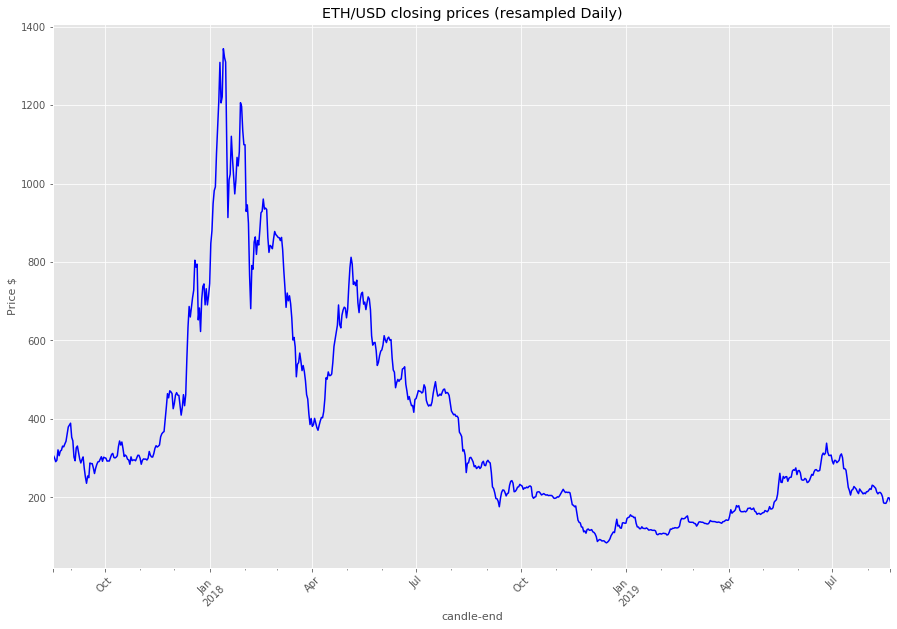

In [7]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot()
ax1.set_xlabel(xlabel='Time', fontsize=11)
ax1.set_ylabel(ylabel='Price $', fontsize=11)

# data is in hourly resolution, so resampling it in daily format to smooth graph
eth_usdt1h['close'].resample('D').mean().plot(ax=ax1, color='blue')

plt.title('ETH/USD closing prices (resampled Daily)')

plt.xticks(rotation=45)

plt.show()

## EMA and Price Crossover Backtest on ETH / USDT

Starting Portfolio Value: 10000.00
2017-08-20T19:59:59.998997, BUY CREATE , 297.88
2017-08-20T20:59:59.999004, BUY EXECUTED, Price: 297.87, Cost: 500.42, Comm 0.50
2017-08-20T20:59:59.999004, Trade id: 2235
2017-08-22T01:59:59.998997, CLOSE LONG , 309.97 , Wait for Short
2017-08-22T02:59:59.999004, SELL EXECUTED, Price: 309.96, Cost: 500.42, Comm 0.55
2017-08-22T02:59:59.999004, OPERATION PROFIT, GROSS 203.11, NET 202.06, Acc Balance: 10202.06
2017-08-22T05:59:59.999004, SELL CREATE , 279.96
2017-08-22T06:59:59.999000, SELL EXECUTED, Price: 302.99, Cost: -542.35, Comm 0.54
2017-08-22T06:59:59.999000, Trade id: 2236
2017-08-22T10:59:59.998997, CLOSE SHORT , 310.24 , Wait for Long
2017-08-22T11:59:59.999004, BUY EXECUTED, Price: 309.40, Cost: -542.35, Comm 0.55
2017-08-22T11:59:59.999004, OPERATION PROFIT, GROSS -114.74, NET -115.84, Acc Balance: 10086.23
2017-08-22T17:59:59.999004, BUY CREATE , 312.07
2017-08-22T18:59:59.999000, BUY EXECUTED, Price: 313.99, Cost: 502.38, Comm 0.50
2017-

2017-11-10T11:59:59.999004, CLOSE LONG , 311.56 , Wait for Short
2017-11-10T12:59:59.999000, SELL EXECUTED, Price: 311.03, Cost: 472.96, Comm 0.52
2017-11-10T12:59:59.999000, OPERATION PROFIT, GROSS 215.76, NET 214.77, Acc Balance: 9688.05
2017-11-10T15:59:59.999000, SELL CREATE , 301.00
2017-11-10T16:59:59.998997, SELL EXECUTED, Price: 300.98, Cost: -484.58, Comm 0.48
2017-11-10T16:59:59.998997, Trade id: 2272
2017-11-11T17:59:59.999004, CLOSE SHORT , 306.25 , Wait for Long
2017-11-11T18:59:59.999000, BUY EXECUTED, Price: 309.86, Cost: -484.58, Comm 0.51
2017-11-11T18:59:59.999000, OPERATION PROFIT, GROSS -142.97, NET -143.96, Acc Balance: 9544.09
2017-11-11T21:59:59.999000, BUY CREATE , 311.79
2017-11-11T22:59:59.998997, BUY EXECUTED, Price: 311.78, Cost: 477.02, Comm 0.48
2017-11-11T22:59:59.998997, Trade id: 2273
2017-11-12T01:59:59.998997, CLOSE LONG , 302.50 , Wait for Short
2017-11-12T02:59:59.999004, SELL EXECUTED, Price: 302.49, Cost: 477.02, Comm 0.48
2017-11-12T02:59:59.9990

2018-01-30T02:59:59.999004, SELL CREATE , 1148.10
2018-01-30T03:59:59.999000, SELL EXECUTED, Price: 1148.10, Cost: -493.68, Comm 0.49
2018-01-30T03:59:59.999000, Trade id: 2304
2018-01-30T07:59:59.998997, CLOSE SHORT , 1174.96 , Wait for Long
2018-01-30T08:59:59.999004, BUY EXECUTED, Price: 1174.05, Cost: -493.68, Comm 0.50
2018-01-30T08:59:59.999004, OPERATION PROFIT, GROSS -111.59, NET -112.58, Acc Balance: 9861.37
2018-02-01T04:59:59.998997, BUY CREATE , 1152.51
2018-02-01T05:59:59.999004, BUY EXECUTED, Price: 1152.51, Cost: 495.58, Comm 0.50
2018-02-01T05:59:59.999004, Trade id: 2305
2018-02-01T08:59:59.999004, CLOSE LONG , 1123.30 , Wait for Short
2018-02-01T09:59:59.999000, SELL EXECUTED, Price: 1123.29, Cost: 495.58, Comm 0.48
2018-02-01T09:59:59.999000, OPERATION PROFIT, GROSS -125.65, NET -126.62, Acc Balance: 9734.75
2018-02-01T10:59:59.998997, SELL CREATE , 1096.00
2018-02-01T11:59:59.999004, SELL EXECUTED, Price: 1093.05, Cost: -480.94, Comm 0.48
2018-02-01T11:59:59.999004,

2018-03-19T23:59:59.999004, BUY CREATE , 556.88
2018-03-20T00:59:59.999000, BUY EXECUTED, Price: 556.88, Cost: 467.78, Comm 0.47
2018-03-20T00:59:59.999000, Trade id: 2327
2018-03-20T04:59:59.998997, CLOSE LONG , 534.99 , Wait for Short
2018-03-20T05:59:59.999004, SELL EXECUTED, Price: 534.74, Cost: 467.78, Comm 0.45
2018-03-20T05:59:59.999004, OPERATION PROFIT, GROSS -185.98, NET -186.89, Acc Balance: 9207.48
2018-03-20T08:59:59.999004, SELL CREATE , 519.90
2018-03-20T09:59:59.999000, SELL EXECUTED, Price: 519.27, Cost: -462.15, Comm 0.46
2018-03-20T09:59:59.999000, Trade id: 2328
2018-03-20T16:59:59.998997, CLOSE SHORT , 550.70 , Wait for Long
2018-03-20T17:59:59.999004, BUY EXECUTED, Price: 551.07, Cost: -462.15, Comm 0.49
2018-03-20T17:59:59.999004, OPERATION PROFIT, GROSS -283.02, NET -283.97, Acc Balance: 8923.51
2018-03-20T17:59:59.999004, BUY CREATE , 556.00
2018-03-20T18:59:59.999000, BUY EXECUTED, Price: 556.00, Cost: 444.80, Comm 0.44
2018-03-20T18:59:59.999000, Trade id: 23

2018-06-14T16:59:59.998997, CLOSE SHORT , 503.92 , Wait for Long
2018-06-14T17:59:59.999004, BUY EXECUTED, Price: 504.45, Cost: -468.76, Comm 0.46
2018-06-14T17:59:59.999004, OPERATION PROFIT, GROSS 752.86, NET 751.93, Acc Balance: 10165.37
2018-06-14T19:59:59.998997, BUY CREATE , 519.65
2018-06-14T20:59:59.999004, BUY EXECUTED, Price: 519.65, Cost: 498.86, Comm 0.50
2018-06-14T20:59:59.999004, Trade id: 2359
2018-06-15T09:59:59.999000, CLOSE LONG , 498.01 , Wait for Short
2018-06-15T10:59:59.998997, SELL EXECUTED, Price: 498.00, Cost: 498.86, Comm 0.49
2018-06-15T10:59:59.998997, OPERATION PROFIT, GROSS -207.84, NET -208.83, Acc Balance: 9956.54
2018-06-15T22:59:59.998997, SELL CREATE , 487.80
2018-06-15T23:59:59.999004, SELL EXECUTED, Price: 487.79, Cost: -497.55, Comm 0.50
2018-06-15T23:59:59.999004, Trade id: 2360
2018-06-16T05:59:59.999004, CLOSE SHORT , 497.65 , Wait for Long
2018-06-16T06:59:59.999000, BUY EXECUTED, Price: 497.65, Cost: -497.55, Comm 0.52
2018-06-16T06:59:59.999

2018-08-05T20:59:59.999004, CLOSE SHORT , 411.57 , Wait for Long
2018-08-05T21:59:59.999000, BUY EXECUTED, Price: 411.95, Cost: -498.11, Comm 0.52
2018-08-05T21:59:59.999000, OPERATION PROFIT, GROSS -44.65, NET -45.67, Acc Balance: 10580.06
2018-08-06T05:59:59.999004, BUY CREATE , 410.76
2018-08-06T06:59:59.999000, BUY EXECUTED, Price: 411.09, Cost: 501.53, Comm 0.50
2018-08-06T06:59:59.999000, Trade id: 2383
2018-08-06T07:59:59.998997, CLOSE LONG , 408.86 , Wait for Short
2018-08-06T08:59:59.999004, SELL EXECUTED, Price: 408.78, Cost: 501.53, Comm 0.50
2018-08-06T08:59:59.999004, OPERATION PROFIT, GROSS -28.18, NET -29.18, Acc Balance: 10550.88
2018-08-06T08:59:59.999004, SELL CREATE , 407.33
2018-08-06T09:59:59.999000, SELL EXECUTED, Price: 407.42, Cost: -501.13, Comm 0.50
2018-08-06T09:59:59.999000, Trade id: 2384
2018-08-07T07:59:59.998997, CLOSE SHORT , 408.22 , Wait for Long
2018-08-07T08:59:59.999004, BUY EXECUTED, Price: 408.22, Cost: -501.13, Comm 0.52
2018-08-07T08:59:59.9990

2018-10-31T15:59:59.999000, CLOSE SHORT , 199.36 , Wait for Long
2018-10-31T16:59:59.998997, BUY EXECUTED, Price: 199.60, Cost: -466.22, Comm 0.50
2018-10-31T16:59:59.998997, OPERATION PROFIT, GROSS -48.38, NET -49.34, Acc Balance: 9273.56
2018-11-01T05:59:59.999004, BUY CREATE , 198.43
2018-11-01T06:59:59.999000, BUY EXECUTED, Price: 198.43, Cost: 464.33, Comm 0.46
2018-11-01T06:59:59.999000, Trade id: 2423
2018-11-03T09:59:59.999000, CLOSE LONG , 199.95 , Wait for Short
2018-11-03T10:59:59.998997, SELL EXECUTED, Price: 199.94, Cost: 464.33, Comm 0.49
2018-11-03T10:59:59.998997, OPERATION PROFIT, GROSS 35.33, NET 34.38, Acc Balance: 9307.94
2018-11-03T17:59:59.999004, SELL CREATE , 199.98
2018-11-03T18:59:59.999000, SELL EXECUTED, Price: 199.98, Cost: -465.95, Comm 0.47
2018-11-03T18:59:59.999000, Trade id: 2424
2018-11-03T20:59:59.999004, CLOSE SHORT , 200.68 , Wait for Long
2018-11-03T21:59:59.999000, BUY EXECUTED, Price: 200.62, Cost: -465.95, Comm 0.47
2018-11-03T21:59:59.999000, 

2019-01-22T14:59:59.999004, CLOSE SHORT , 117.60 , Wait for Long
2019-01-22T15:59:59.999000, BUY EXECUTED, Price: 117.63, Cost: -376.20, Comm 0.40
2019-01-22T15:59:59.999000, OPERATION PROFIT, GROSS 9.57, NET 8.80, Acc Balance: 7542.52
2019-01-22T20:59:59.999004, BUY CREATE , 118.32
2019-01-22T21:59:59.999000, BUY EXECUTED, Price: 118.32, Cost: 377.44, Comm 0.38
2019-01-22T21:59:59.999000, Trade id: 2453
2019-01-23T09:59:59.999000, CLOSE LONG , 117.25 , Wait for Short
2019-01-23T10:59:59.998997, SELL EXECUTED, Price: 117.22, Cost: 377.44, Comm 0.38
2019-01-23T10:59:59.998997, OPERATION PROFIT, GROSS -35.09, NET -35.85, Acc Balance: 7506.67
2019-01-23T19:59:59.998997, SELL CREATE , 115.76
2019-01-23T20:59:59.999004, SELL EXECUTED, Price: 115.70, Cost: -374.87, Comm 0.37
2019-01-23T20:59:59.999004, Trade id: 2454
2019-01-24T19:59:59.998997, CLOSE SHORT , 116.58 , Wait for Long
2019-01-24T20:59:59.999004, BUY EXECUTED, Price: 116.57, Cost: -374.87, Comm 0.39
2019-01-24T20:59:59.999004, OP

2019-04-30T12:59:59.999000, BUY CREATE , 159.34
2019-04-30T13:59:59.998997, BUY EXECUTED, Price: 159.34, Cost: 396.76, Comm 0.40
2019-04-30T13:59:59.998997, Trade id: 2493
2019-05-01T19:59:59.998997, CLOSE LONG , 159.27 , Wait for Short
2019-05-01T20:59:59.999004, SELL EXECUTED, Price: 159.26, Cost: 396.76, Comm 0.41
2019-05-01T20:59:59.999004, OPERATION PROFIT, GROSS -1.99, NET -2.80, Acc Balance: 7924.77
2019-05-04T15:59:59.999000, SELL CREATE , 161.99
2019-05-04T16:59:59.998997, SELL EXECUTED, Price: 162.06, Cost: -397.05, Comm 0.40
2019-05-04T16:59:59.998997, Trade id: 2494
2019-05-04T22:59:59.998997, CLOSE SHORT , 164.39 , Wait for Long
2019-05-04T23:59:59.999004, BUY EXECUTED, Price: 164.44, Cost: -397.05, Comm 0.40
2019-05-04T23:59:59.999004, OPERATION PROFIT, GROSS -58.31, NET -59.11, Acc Balance: 7865.66
2019-05-06T14:59:59.999004, BUY CREATE , 167.26
2019-05-06T15:59:59.999000, BUY EXECUTED, Price: 167.26, Cost: 393.06, Comm 0.39
2019-05-06T15:59:59.999000, Trade id: 2495
201

2019-07-21T16:59:59.998997, SELL CREATE , 220.44
2019-07-21T17:59:59.999004, SELL EXECUTED, Price: 220.52, Cost: -407.96, Comm 0.41
2019-07-21T17:59:59.999004, Trade id: 2524
2019-07-21T21:59:59.999000, CLOSE SHORT , 224.70 , Wait for Long
2019-07-21T22:59:59.998997, BUY EXECUTED, Price: 224.70, Cost: -407.96, Comm 0.42
2019-07-21T22:59:59.998997, OPERATION PROFIT, GROSS -77.33, NET -78.15, Acc Balance: 8081.67
2019-07-22T03:59:59.999000, BUY CREATE , 225.93
2019-07-22T04:59:59.998997, BUY EXECUTED, Price: 225.94, Cost: 404.43, Comm 0.40
2019-07-22T04:59:59.998997, Trade id: 2525
2019-07-22T04:59:59.998997, CLOSE LONG , 224.33 , Wait for Short
2019-07-22T05:59:59.999004, SELL EXECUTED, Price: 224.40, Cost: 404.43, Comm 0.40
2019-07-22T05:59:59.999004, OPERATION PROFIT, GROSS -27.57, NET -28.37, Acc Balance: 8053.30
2019-07-22T09:59:59.999000, SELL CREATE , 220.70
2019-07-22T10:59:59.998997, SELL EXECUTED, Price: 220.75, Cost: -401.76, Comm 0.40
2019-07-22T10:59:59.998997, Trade id: 252

<IPython.core.display.Javascript object>


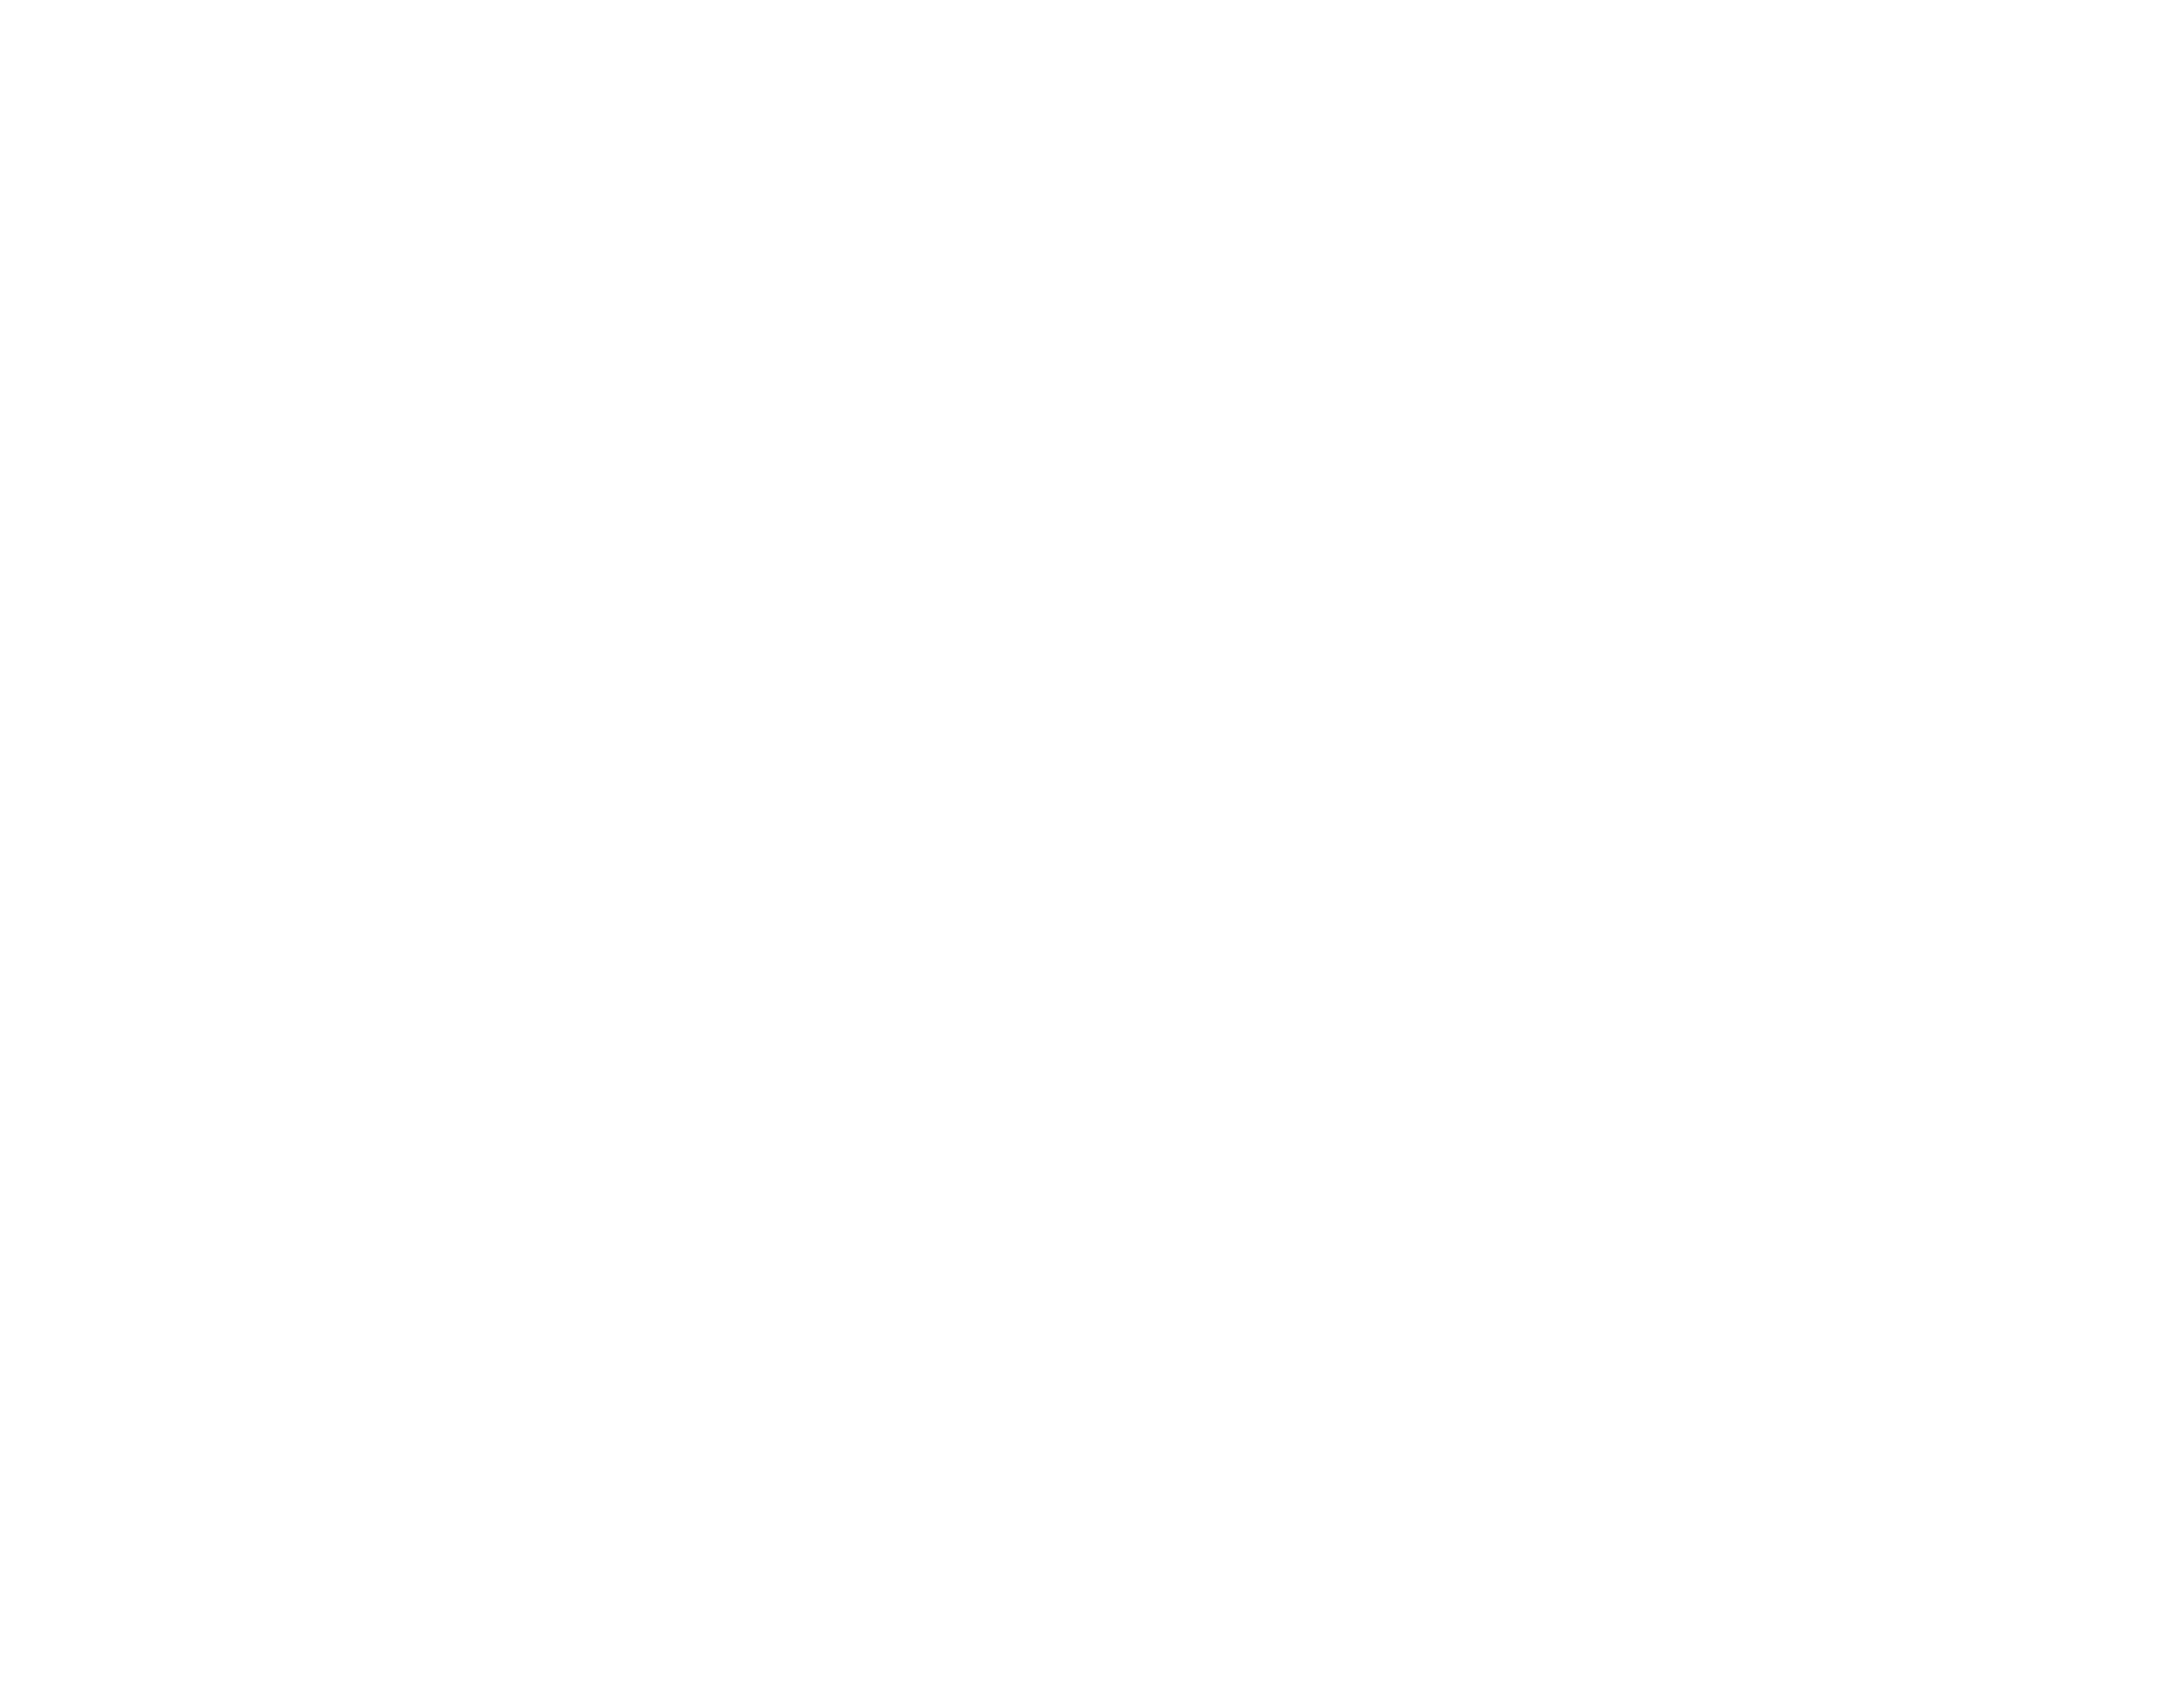

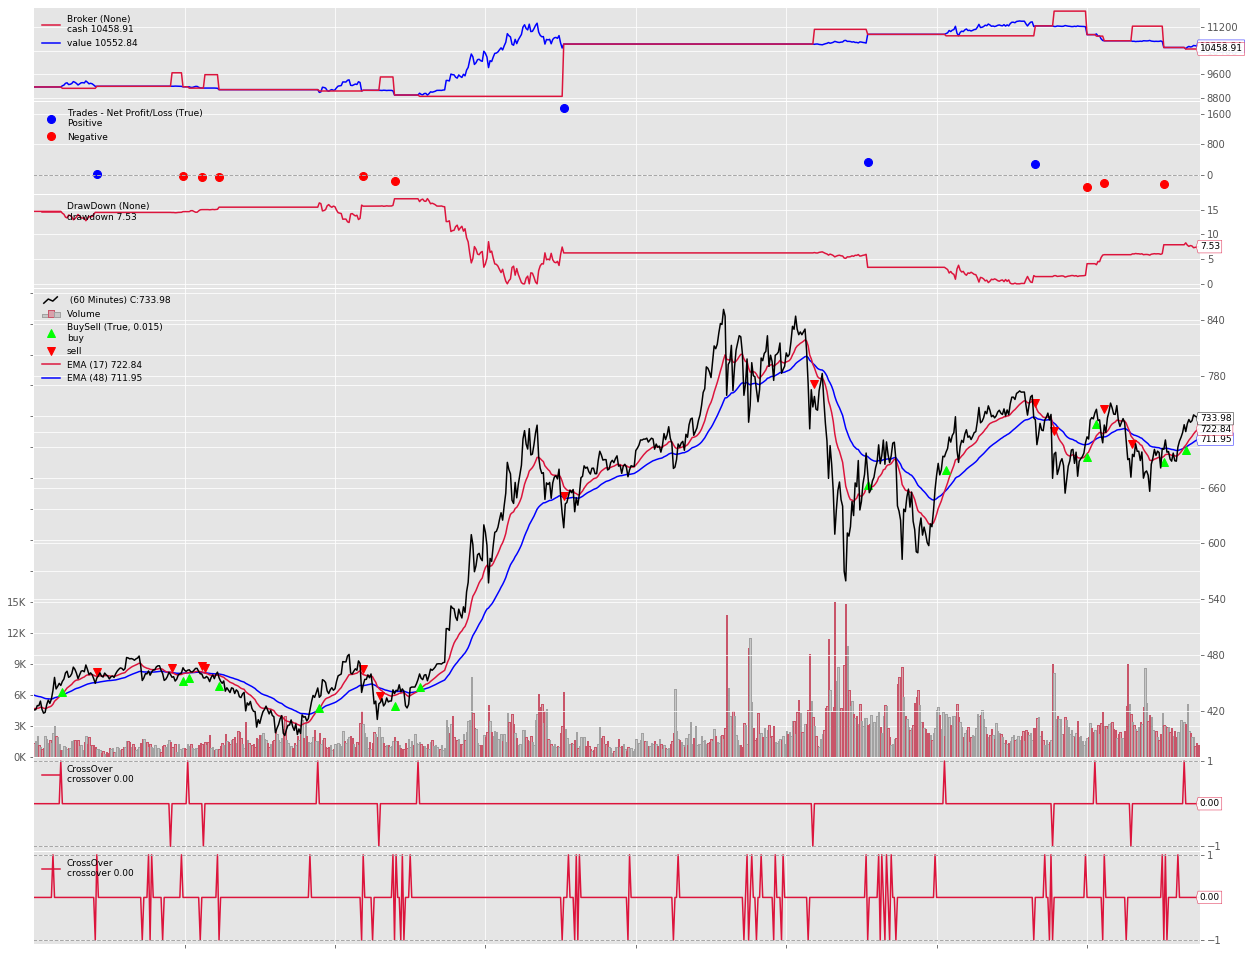

In [25]:
# EMA AND Price Crossover

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),  # multiply profits and loses (margin trading)
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )
    


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)
        self.pricecrossover = bt.ind.CrossOver(self.datas[0].close, ema_long)
        
        self.wait_to_enter = ''


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        # if an order is active, no new orders are allowed
        if self.order:
            return   
        
        # if position is not opened
        if not self.position:
            
            # if signal is go long - cross upwards
            if self.crossover > 0:
                
                # if we are waiting for a Short signal
                if self.wait_to_enter == 'wait_for_short':
                    return
                
                else: # BUY BUY BUY
                    self.log('BUY CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.buy(size=round(min((cerebro.broker.getvalue()*0.05),
                                                         500) / self.dataclose[0], 2))
                            # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
            
            # if signal is go short - cross downwards
            elif self.crossover < 0:
                
                # if we are waiting for a Long signal
                if self.wait_to_enter == 'wait_for_long':
                    return

                else:  # SELL SELL SELL
                    self.log('SELL CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.sell(size=round(min((cerebro.broker.getvalue()*0.05),
                                             500) / self.dataclose[0], 2))
                             # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
        
        # if we are in the market:
        elif self.position:
            # if price signals close short == -1
            if self.pricecrossover > 0:
                self.log('CLOSE SHORT , %.2f , Wait for Long' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_long'
                self.order = self.close()
            
            # if price signals close long == 1
            elif self.pricecrossover < 0:
                self.log('CLOSE LONG , %.2f , Wait for Short' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_short'
                self.order = self.close()
                
                
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isopen:
            self.log('Trade id: {}'.format(trade.ref))
        
        elif trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=eth_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', thestrat.analyzers.returns.get_analysis()['rnorm100'] * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 1, 1), 
                 plotname='ETH/USDT 1h EMA and Price Crossover, 2017_08-2019_08',
                savefig=True)
    
    # cerebro.plot()  # plot backtest

##  Optimise parameters for EMA and Price Crossover

Short EMA (15-20), Long EMA (45-50)

In [9]:
# Parameter optimisation for EMA and Price Crossover

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', False),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)
        self.pricecrossover = bt.ind.CrossOver(self.datas[0].close, ema_long)
        
        self.wait_to_enter = ''


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        # if an order is active, no new orders are allowed
        if self.order:
            return   
        
        # if position is not opened
        if not self.position:
            
            # if signal is go long - cross upwards
            if self.crossover > 0:
                
                # if we are waiting for a Short signal
                if self.wait_to_enter == 'wait_for_short':
                    return
                
                else: # BUY BUY BUY
                    self.log('BUY CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.buy(size=round(min((cerebro.broker.getvalue()*0.05),
                                                         500) / self.dataclose[0], 2))
                            # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
            
            # if signal is go short - cross downwards
            elif self.crossover < 0:
                
                # if we are waiting for a Long signal
                if self.wait_to_enter == 'wait_for_long':
                    return

                else:  # SELL SELL SELL
                    self.log('SELL CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.sell(size=round(min((cerebro.broker.getvalue()*0.05),
                                             500) / self.dataclose[0], 2))
                             # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
        
        # if we are in the market:
        elif self.position:
            # if price signals close short == -1
            if self.pricecrossover > 0:
                self.log('CLOSE SHORT , %.2f , Wait for Long' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_long'
                self.order = self.close()
            
            # if price signals close long == 1
            elif self.pricecrossover < 0:
                self.log('CLOSE LONG , %.2f , Wait for Short' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_short'
                self.order = self.close()


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))
    
    
#     UNCOMMENT TO OPTIMISE
    def stop(self):
        self.log('(Short EMA %2d), (Long EMA: %2d) Ending Value %.2f' %
                 (self.params.short_ema, self.params.long_ema, self.broker.getvalue()),
                 doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    strats = cerebro.optstrategy(
        TestStrategy,
        short_ema=range(15, 21),
        long_ema=range(45, 51))
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=eth_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Add a Percentage sizer - set to 5% of portfolio value
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=5)
    # cerebro.addsizer(bt.sizers.FixedSize)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Run over everything
    thestrats = cerebro.run(maxcpus=2)  # OPTIMIZE
    thestrat = thestrats[0]


Starting Portfolio Value: 10000.00
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 45) Ending Value 9872.66
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 46) Ending Value 9567.88
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 47) Ending Value 9007.81
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 48) Ending Value 8207.05
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 49) Ending Value 9363.25
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 50) Ending Value 9524.91
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 45) Ending Value 7182.83
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 46) Ending Value 7852.83
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 48) Ending Value 9659.98
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 47) Ending Value 8667.83
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 49) Ending Value 8625.97
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 50) Ending Value 9899.39
2019-

Parameter optimisation didn't improve returns, larger ranges could be tried

## Simple EMA crossover strategy for Ether

Starting Portfolio Value: 10000.00
2017-08-20T19:59:59.998997, BUY CREATE , 297.88
2017-08-20T20:59:59.999004, BUY EXECUTED, Price: 297.87, Cost: 500.42, Comm 0.50
2017-08-20T20:59:59.999004, TRADE OPENED, SIZE:  1 , VAL: 500.42
2017-08-22T05:59:59.999004, CLOSE LONG , 279.96
2017-08-22T05:59:59.999004, SELL CREATE , 279.96
2017-08-22T06:59:59.999000, SELL EXECUTED, Price: 302.99, Cost: 500.42, Comm 0.54
2017-08-22T06:59:59.999000, SELL EXECUTED, Price: 302.99, Cost: -527.20, Comm 0.53
2017-08-22T06:59:59.999000, OPERATION PROFIT, GROSS 86.02, NET 84.98, Acc Balance: 10080.31
2017-08-22T06:59:59.999000, TRADE OPENED, SIZE: -1 , VAL: -527.20
2017-08-22T17:59:59.999004, CLOSE SHORT , 312.07
2017-08-22T17:59:59.999004, BUY CREATE , 312.07
2017-08-22T18:59:59.999000, BUY EXECUTED, Price: 313.99, Cost: -527.20, Comm 0.55
2017-08-22T18:59:59.999000, BUY EXECUTED, Price: 313.99, Cost: 502.38, Comm 0.50
2017-08-22T18:59:59.999000, OPERATION PROFIT, GROSS -191.40, NET -192.47, Acc Balance: 9845

2017-11-05T19:59:59.998997, CLOSE LONG , 294.17
2017-11-05T19:59:59.998997, SELL CREATE , 294.17
2017-11-05T20:59:59.999004, SELL EXECUTED, Price: 294.07, Cost: 440.42, Comm 0.46
2017-11-05T20:59:59.999004, SELL EXECUTED, Price: 294.07, Cost: -441.11, Comm 0.44
2017-11-05T20:59:59.999004, OPERATION PROFIT, GROSS -51.95, NET -52.85, Acc Balance: 8820.09
2017-11-05T20:59:59.999004, TRADE OPENED, SIZE: -1 , VAL: -441.11
2017-11-06T12:59:59.999000, CLOSE SHORT , 301.06
2017-11-06T12:59:59.999000, BUY CREATE , 301.06
2017-11-06T13:59:59.998997, BUY EXECUTED, Price: 301.08, Cost: -441.11, Comm 0.46
2017-11-06T13:59:59.998997, BUY EXECUTED, Price: 301.08, Cost: 439.58, Comm 0.44
2017-11-06T13:59:59.998997, OPERATION PROFIT, GROSS -105.15, NET -106.05, Acc Balance: 8687.91
2017-11-06T13:59:59.998997, TRADE OPENED, SIZE:  1 , VAL: 439.58
2017-11-07T14:59:59.999004, CLOSE LONG , 287.80
2017-11-07T14:59:59.999004, SELL CREATE , 287.80
2017-11-07T15:59:59.999000, SELL EXECUTED, Price: 287.80, Cost

2018-02-01T04:59:59.998997, CLOSE SHORT , 1152.51
2018-02-01T04:59:59.998997, BUY CREATE , 1152.51
2018-02-01T05:59:59.999004, BUY EXECUTED, Price: 1152.51, Cost: -505.16, Comm 0.53
2018-02-01T05:59:59.999004, BUY EXECUTED, Price: 1152.51, Cost: 495.58, Comm 0.50
2018-02-01T05:59:59.999004, OPERATION PROFIT, GROSS -19.40, NET -20.44, Acc Balance: 12354.27
2018-02-01T05:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 495.58
2018-02-01T10:59:59.998997, CLOSE LONG , 1096.00
2018-02-01T10:59:59.998997, SELL CREATE , 1096.00
2018-02-01T11:59:59.999004, SELL EXECUTED, Price: 1093.05, Cost: 495.58, Comm 0.47
2018-02-01T11:59:59.999004, SELL EXECUTED, Price: 1093.05, Cost: -502.80, Comm 0.50
2018-02-01T11:59:59.999004, OPERATION PROFIT, GROSS -255.68, NET -256.64, Acc Balance: 12061.15
2018-02-01T11:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -502.80
2018-02-01T13:59:59.998997, CLOSE SHORT , 1136.00
2018-02-01T13:59:59.998997, BUY CREATE , 1136.00
2018-02-01T14:59:59.999004, BUY EXECUTED, Price: 1

2018-03-10T07:59:59.998997, CLOSE SHORT , 729.19
2018-03-10T07:59:59.998997, BUY CREATE , 729.19
2018-03-10T08:59:59.999004, BUY EXECUTED, Price: 729.26, Cost: -496.34, Comm 0.49
2018-03-10T08:59:59.999004, BUY EXECUTED, Price: 729.26, Cost: 503.19, Comm 0.50
2018-03-10T08:59:59.999004, OPERATION PROFIT, GROSS 733.70, NET 732.71, Acc Balance: 13273.93
2018-03-10T08:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 503.19
2018-03-10T20:59:59.999004, CLOSE LONG , 688.99
2018-03-10T20:59:59.999004, SELL CREATE , 688.99
2018-03-10T21:59:59.999000, SELL EXECUTED, Price: 688.98, Cost: 503.19, Comm 0.48
2018-03-10T21:59:59.999000, SELL EXECUTED, Price: 688.98, Cost: -502.96, Comm 0.50
2018-03-10T21:59:59.999000, OPERATION PROFIT, GROSS -277.93, NET -278.91, Acc Balance: 13000.92
2018-03-10T21:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -502.96
2018-03-11T19:59:59.998997, CLOSE SHORT , 729.20
2018-03-11T19:59:59.998997, BUY CREATE , 729.20
2018-03-11T20:59:59.999004, BUY EXECUTED, Price: 729.20, Cos

2018-05-26T16:59:59.998997, CLOSE SHORT , 601.67
2018-05-26T16:59:59.998997, BUY CREATE , 601.67
2018-05-26T17:59:59.999004, BUY EXECUTED, Price: 601.30, Cost: -499.96, Comm 0.50
2018-05-26T17:59:59.999004, BUY EXECUTED, Price: 601.30, Cost: 499.08, Comm 0.50
2018-05-26T17:59:59.999004, OPERATION PROFIT, GROSS 670.25, NET 669.25, Acc Balance: 16731.39
2018-05-26T17:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 499.08
2018-05-26T23:59:59.999004, CLOSE LONG , 586.00
2018-05-26T23:59:59.999004, SELL CREATE , 586.00
2018-05-27T00:59:59.999000, SELL EXECUTED, Price: 586.03, Cost: 499.08, Comm 0.50
2018-05-27T00:59:59.999000, SELL EXECUTED, Price: 586.03, Cost: -498.13, Comm 0.50
2018-05-27T00:59:59.999000, OPERATION PROFIT, GROSS -126.74, NET -127.74, Acc Balance: 16588.59
2018-05-27T00:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -498.13
2018-05-29T18:59:59.999000, CLOSE SHORT , 564.99
2018-05-29T18:59:59.999000, BUY CREATE , 564.99
2018-05-29T19:59:59.998997, BUY EXECUTED, Price: 564.86, Cos

2018-08-15T16:59:59.998997, CLOSE SHORT , 304.19
2018-08-15T16:59:59.998997, BUY CREATE , 304.19
2018-08-15T17:59:59.999004, BUY EXECUTED, Price: 304.29, Cost: -501.45, Comm 0.50
2018-08-15T17:59:59.999004, BUY EXECUTED, Price: 304.29, Cost: 499.04, Comm 0.50
2018-08-15T17:59:59.999004, OPERATION PROFIT, GROSS 1149.98, NET 1148.99, Acc Balance: 18414.87
2018-08-15T17:59:59.999004, TRADE OPENED, SIZE:  1 , VAL: 499.04
2018-08-18T18:59:59.999000, CLOSE LONG , 289.44
2018-08-18T18:59:59.999000, SELL CREATE , 289.44
2018-08-18T19:59:59.998997, SELL EXECUTED, Price: 289.57, Cost: 499.04, Comm 0.52
2018-08-18T19:59:59.998997, SELL EXECUTED, Price: 289.57, Cost: -500.96, Comm 0.50
2018-08-18T19:59:59.998997, OPERATION PROFIT, GROSS -241.41, NET -242.42, Acc Balance: 18236.23
2018-08-18T19:59:59.998997, TRADE OPENED, SIZE: -1 , VAL: -500.96
2018-08-19T14:59:59.999004, CLOSE SHORT , 301.66
2018-08-19T14:59:59.999004, BUY CREATE , 301.66
2018-08-19T15:59:59.999000, BUY EXECUTED, Price: 301.52, C

2018-11-03T17:59:59.999004, CLOSE LONG , 199.98
2018-11-03T17:59:59.999004, SELL CREATE , 199.98
2018-11-03T18:59:59.999000, SELL EXECUTED, Price: 199.98, Cost: 500.04, Comm 0.53
2018-11-03T18:59:59.999000, SELL EXECUTED, Price: 199.98, Cost: -499.95, Comm 0.50
2018-11-03T18:59:59.999000, OPERATION PROFIT, GROSS 39.06, NET 38.03, Acc Balance: 18597.54
2018-11-03T18:59:59.999000, TRADE OPENED, SIZE: -2 , VAL: -499.95
2018-11-04T08:59:59.999004, CLOSE SHORT , 201.91
2018-11-04T08:59:59.999004, BUY CREATE , 201.91
2018-11-04T09:59:59.999000, BUY EXECUTED, Price: 201.92, Cost: -499.95, Comm 0.52
2018-11-04T09:59:59.999000, BUY EXECUTED, Price: 201.92, Cost: 500.76, Comm 0.50
2018-11-04T09:59:59.999000, OPERATION PROFIT, GROSS -48.50, NET -49.52, Acc Balance: 18540.90
2018-11-04T09:59:59.999000, TRADE OPENED, SIZE:  2 , VAL: 500.76
2018-11-08T11:59:59.999004, CLOSE LONG , 215.51
2018-11-08T11:59:59.999004, SELL CREATE , 215.51
2018-11-08T12:59:59.999000, SELL EXECUTED, Price: 215.45, Cost: 

2019-01-22T20:59:59.999004, CLOSE SHORT , 118.32
2019-01-22T20:59:59.999004, BUY CREATE , 118.32
2019-01-22T21:59:59.999000, BUY EXECUTED, Price: 118.32, Cost: -500.02, Comm 0.53
2019-01-22T21:59:59.999000, BUY EXECUTED, Price: 118.32, Cost: 500.49, Comm 0.50
2019-01-22T21:59:59.999000, OPERATION PROFIT, GROSS -16.54, NET -17.57, Acc Balance: 21464.43
2019-01-22T21:59:59.999000, TRADE OPENED, SIZE:  4 , VAL: 500.49
2019-01-23T19:59:59.998997, CLOSE LONG , 115.76
2019-01-23T19:59:59.998997, SELL CREATE , 115.76
2019-01-23T20:59:59.999004, SELL EXECUTED, Price: 115.70, Cost: 500.49, Comm 0.50
2019-01-23T20:59:59.999004, SELL EXECUTED, Price: 115.70, Cost: -499.82, Comm 0.50
2019-01-23T20:59:59.999004, OPERATION PROFIT, GROSS -110.83, NET -111.83, Acc Balance: 21390.80
2019-01-23T20:59:59.999004, TRADE OPENED, SIZE: -4 , VAL: -499.82
2019-01-26T10:59:59.998997, CLOSE SHORT , 116.42
2019-01-26T10:59:59.998997, BUY CREATE , 116.42
2019-01-26T11:59:59.999004, BUY EXECUTED, Price: 116.42, Cos

2019-03-05T14:59:59.999004, CLOSE SHORT , 133.47
2019-03-05T14:59:59.999004, BUY CREATE , 133.47
2019-03-05T15:59:59.999000, BUY EXECUTED, Price: 133.50, Cost: -499.60, Comm 0.55
2019-03-05T15:59:59.999000, BUY EXECUTED, Price: 133.50, Cost: 500.62, Comm 0.50
2019-03-05T15:59:59.999000, OPERATION PROFIT, GROSS 83.17, NET 82.12, Acc Balance: 22294.60
2019-03-05T15:59:59.999000, TRADE OPENED, SIZE:  3 , VAL: 500.62
2019-03-08T23:59:59.999004, CLOSE LONG , 133.52
2019-03-08T23:59:59.999004, SELL CREATE , 133.52
2019-03-09T00:59:59.999000, SELL EXECUTED, Price: 133.51, Cost: 500.62, Comm 0.56
2019-03-09T00:59:59.999000, SELL EXECUTED, Price: 133.51, Cost: -499.33, Comm 0.50
2019-03-09T00:59:59.999000, OPERATION PROFIT, GROSS 0.37, NET -0.68, Acc Balance: 22275.83
2019-03-09T00:59:59.999000, TRADE OPENED, SIZE: -3 , VAL: -499.33
2019-03-09T11:59:59.999004, CLOSE SHORT , 137.27
2019-03-09T11:59:59.999004, BUY CREATE , 137.27
2019-03-09T12:59:59.999000, BUY EXECUTED, Price: 137.29, Cost: -499

2019-05-09T10:59:59.998997, BUY EXECUTED, Price: 171.37, Cost: -500.18, Comm 0.50
2019-05-09T10:59:59.998997, BUY EXECUTED, Price: 171.37, Cost: 500.40, Comm 0.50
2019-05-09T10:59:59.998997, OPERATION PROFIT, GROSS -19.34, NET -20.34, Acc Balance: 21485.08
2019-05-09T10:59:59.998997, TRADE OPENED, SIZE:  2 , VAL: 500.40
2019-05-09T11:59:59.999004, CLOSE LONG , 170.39
2019-05-09T11:59:59.999004, SELL CREATE , 170.39
2019-05-09T12:59:59.999000, SELL EXECUTED, Price: 170.39, Cost: 500.40, Comm 0.50
2019-05-09T12:59:59.999000, SELL EXECUTED, Price: 170.39, Cost: -499.24, Comm 0.50
2019-05-09T12:59:59.999000, OPERATION PROFIT, GROSS -28.62, NET -29.61, Acc Balance: 21460.31
2019-05-09T12:59:59.999000, TRADE OPENED, SIZE: -2 , VAL: -499.24
2019-05-10T04:59:59.998997, CLOSE SHORT , 175.64
2019-05-10T04:59:59.998997, BUY CREATE , 175.64
2019-05-10T05:59:59.999004, BUY EXECUTED, Price: 175.64, Cost: -499.24, Comm 0.53
2019-05-10T05:59:59.999004, BUY EXECUTED, Price: 175.64, Cost: 500.57, Comm 0

2019-08-04T12:59:59.999000, CLOSE LONG , 218.27
2019-08-04T12:59:59.999000, SELL CREATE , 218.27
2019-08-04T13:59:59.998997, SELL EXECUTED, Price: 218.34, Cost: 499.02, Comm 0.57
2019-08-04T13:59:59.998997, SELL EXECUTED, Price: 218.34, Cost: -500.00, Comm 0.50
2019-08-04T13:59:59.998997, OPERATION PROFIT, GROSS 140.77, NET 139.70, Acc Balance: 21502.35
2019-08-04T13:59:59.998997, TRADE OPENED, SIZE: -2 , VAL: -500.00
2019-08-04T14:59:59.999004, CLOSE SHORT , 220.66
2019-08-04T14:59:59.999004, BUY CREATE , 220.66
2019-08-04T15:59:59.999000, BUY EXECUTED, Price: 220.62, Cost: -500.00, Comm 0.51
2019-08-04T15:59:59.999000, BUY EXECUTED, Price: 220.62, Cost: 500.81, Comm 0.50
2019-08-04T15:59:59.999000, OPERATION PROFIT, GROSS -52.21, NET -53.22, Acc Balance: 21450.66
2019-08-04T15:59:59.999000, TRADE OPENED, SIZE:  2 , VAL: 500.81
2019-08-06T23:59:59.999004, CLOSE LONG , 226.28
2019-08-06T23:59:59.999004, SELL CREATE , 226.28
2019-08-07T00:59:59.999000, SELL EXECUTED, Price: 226.31, Cost

<IPython.core.display.Javascript object>


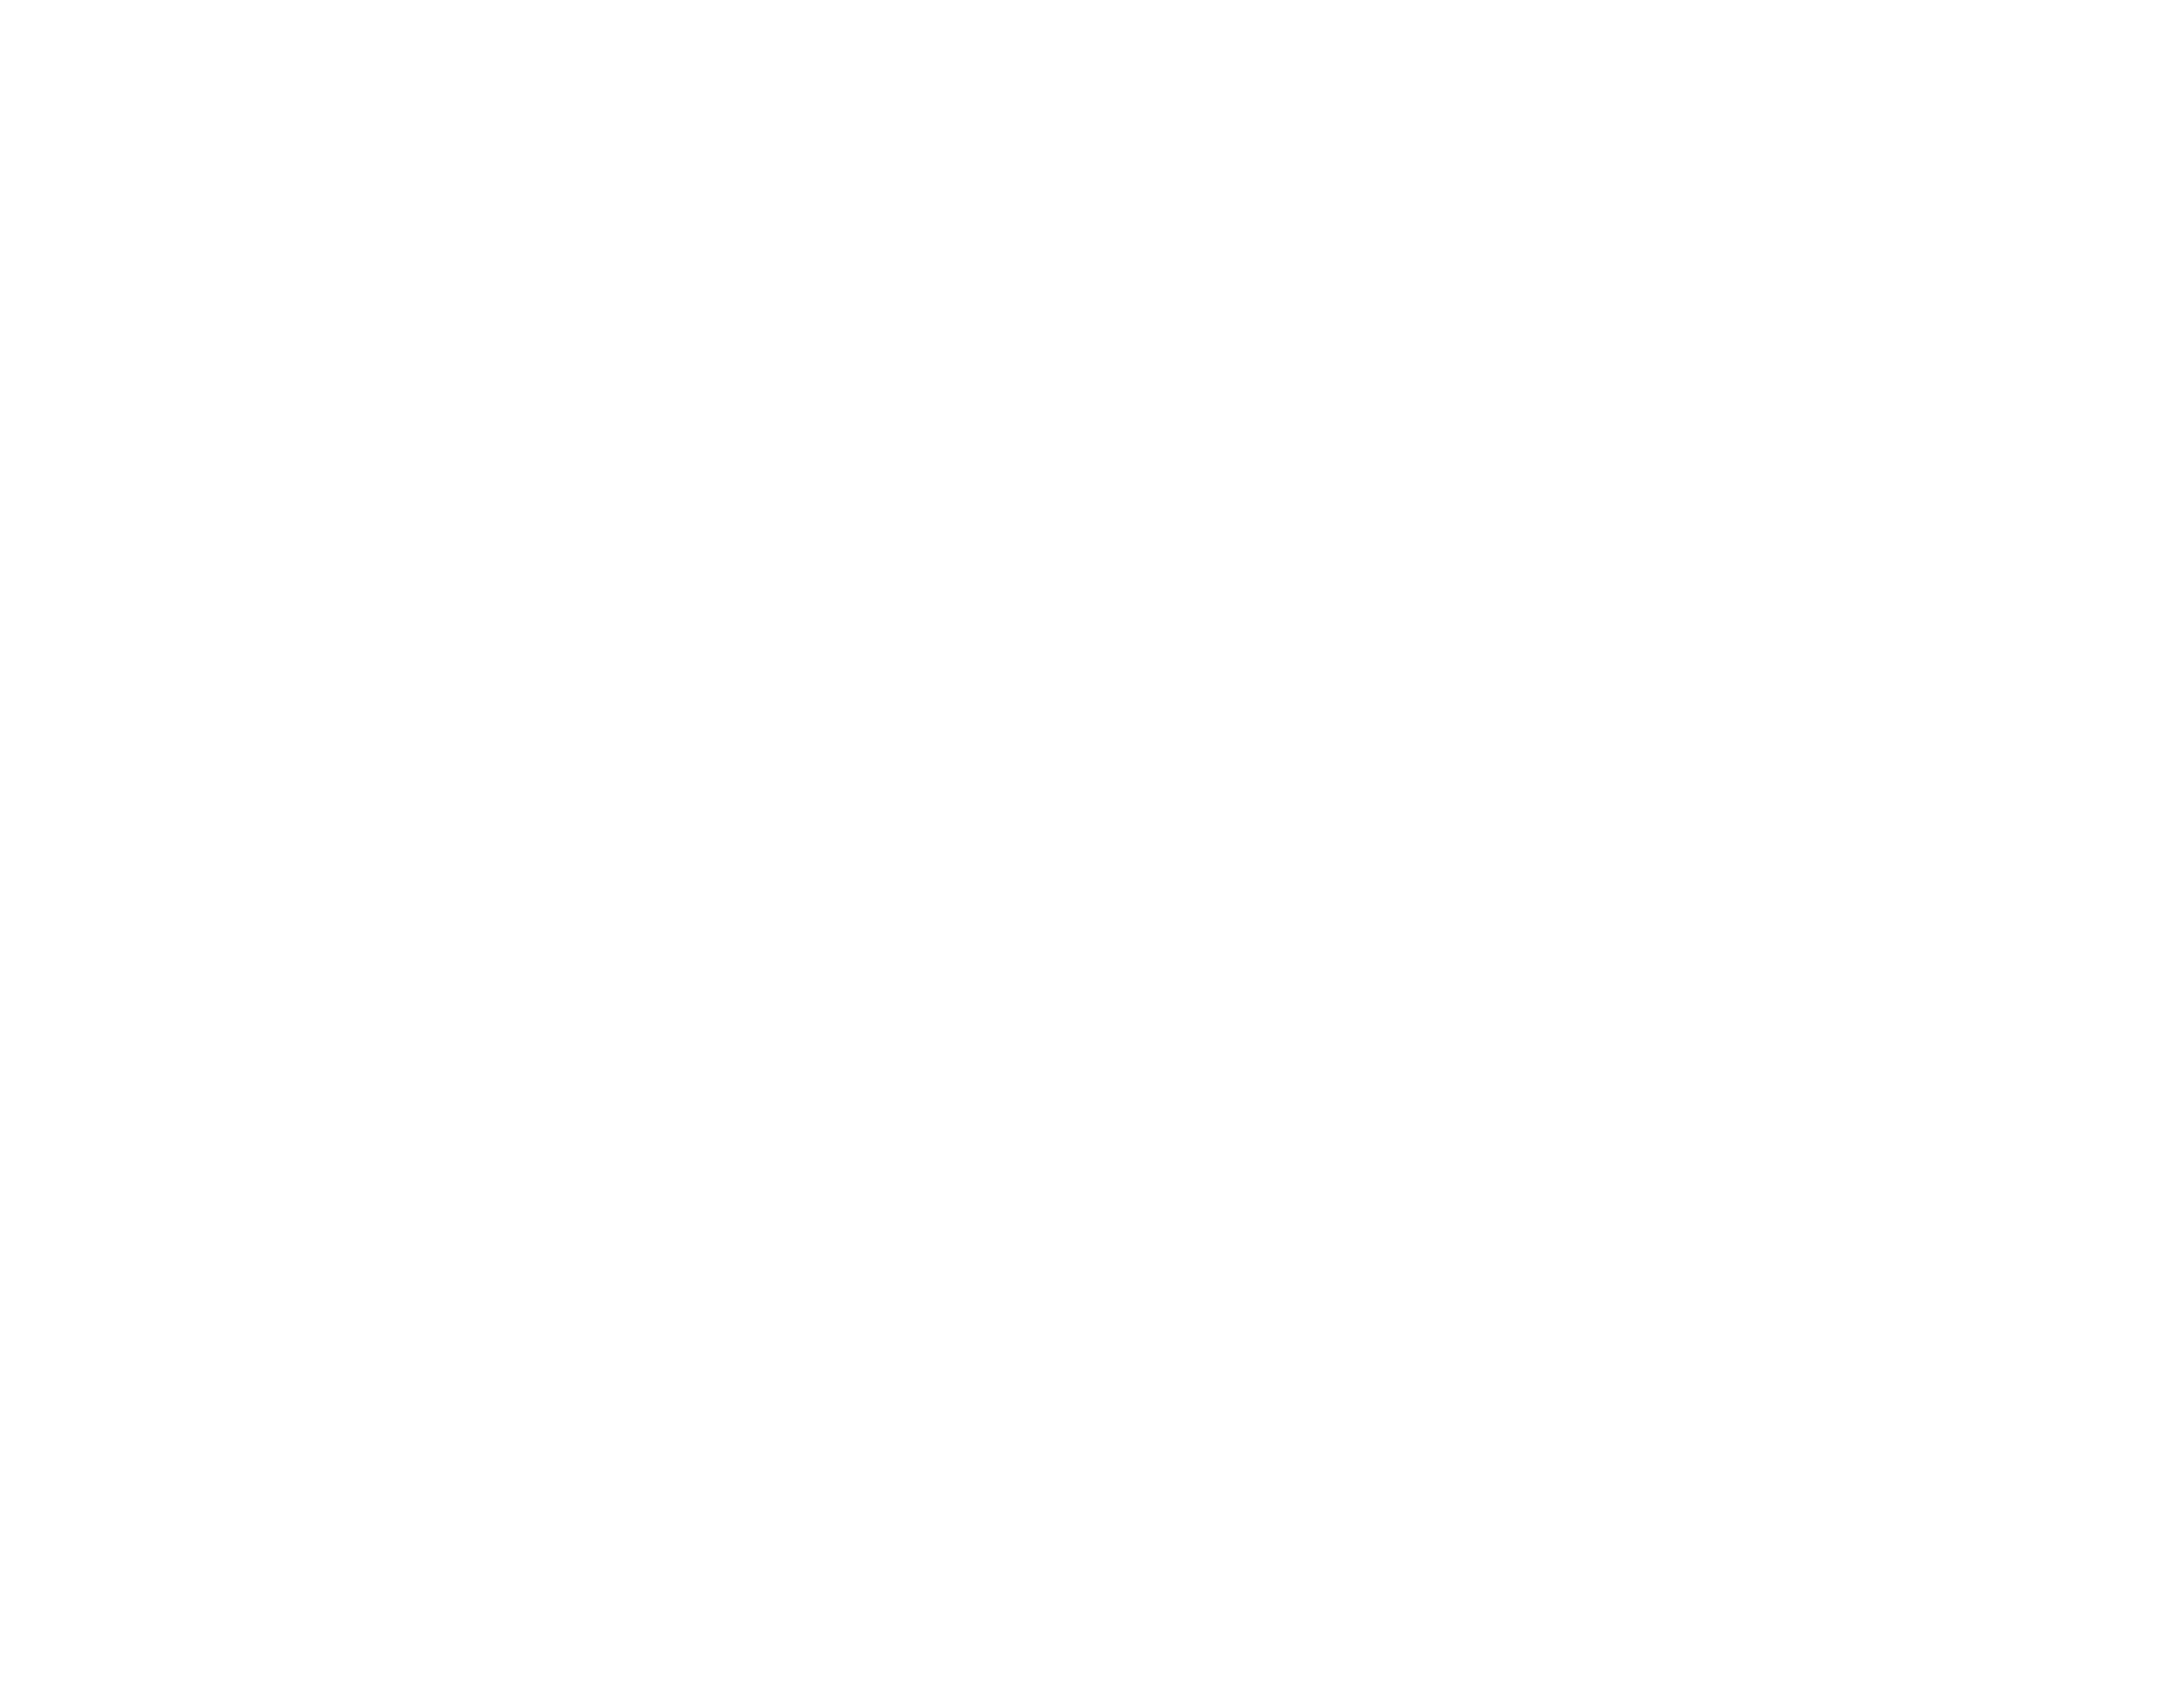

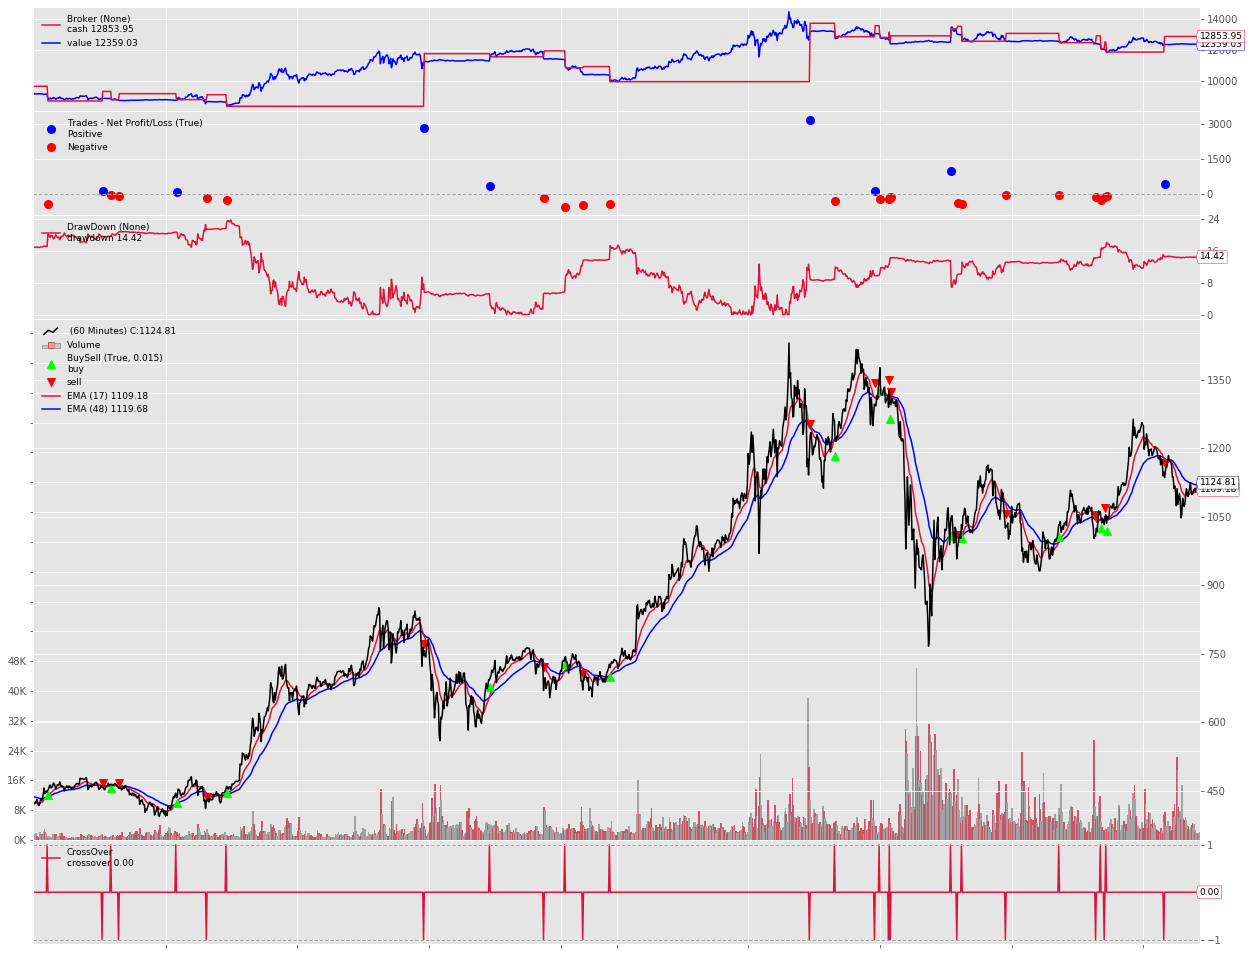

In [26]:
# EMA Crossover ETHER (17h and 48h)

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=eth_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', thestrat.analyzers.returns.get_analysis()['rnorm100'] * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 2, 1))
    
    # cerebro.plot()  # plot backtest

Returns improved


## Now we can check if the result could be improved with optimised parameters. 

Short EMA (15-20), Long EMA (45-50)

In [11]:
# Parameter optimisation for Simple EMA Crossover

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', False),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))
    
    
#     UNCOMMENT TO OPTIMISE
    def stop(self):
        self.log('(Short EMA %2d), (Long EMA: %2d) Ending Value %.2f' %
                 (self.params.short_ema, self.params.long_ema, self.broker.getvalue()),
                 doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    strats = cerebro.optstrategy(
        TestStrategy,
        short_ema=range(15, 21),
        long_ema=range(45, 51))
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=eth_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Add a Percentage sizer - set to 5% of portfolio value
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=5)
    # cerebro.addsizer(bt.sizers.FixedSize)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Run over everything
    thestrats = cerebro.run(maxcpus=2)  # OPTIMIZE
    thestrat = thestrats[0]


Starting Portfolio Value: 10000.00
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 46) Ending Value 22343.72
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 45) Ending Value 22064.97
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 47) Ending Value 21503.18
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 48) Ending Value 21272.27
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 49) Ending Value 20541.28
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 50) Ending Value 21005.41
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 45) Ending Value 20047.57
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 46) Ending Value 20337.13
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 47) Ending Value 21799.49
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 48) Ending Value 21761.27
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 49) Ending Value 22356.23
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 50) Ending Value 22

So the best parameters were 20 and 50 which got us 27k instead of 22k

## Backtest with optimised parameters for ETH / USDT

Starting Portfolio Value: 10000.00
2017-08-20T21:59:59.999000, BUY CREATE , 298.13
2017-08-20T22:59:59.998997, BUY EXECUTED, Price: 298.13, Cost: 500.86, Comm 0.50
2017-08-20T22:59:59.998997, TRADE OPENED, SIZE:  1 , VAL: 500.86
2017-08-22T08:59:59.999004, CLOSE LONG , 299.82
2017-08-22T08:59:59.999004, SELL CREATE , 299.82
2017-08-22T09:59:59.999000, SELL EXECUTED, Price: 301.09, Cost: 500.86, Comm 0.53
2017-08-22T09:59:59.999000, SELL EXECUTED, Price: 301.09, Cost: -502.82, Comm 0.50
2017-08-22T09:59:59.999000, OPERATION PROFIT, GROSS 49.73, NET 48.69, Acc Balance: 10036.10
2017-08-22T09:59:59.999000, TRADE OPENED, SIZE: -1 , VAL: -502.82
2017-08-22T12:59:59.999000, CLOSE SHORT , 311.23
2017-08-22T12:59:59.999000, BUY CREATE , 311.23
2017-08-22T13:59:59.998997, BUY EXECUTED, Price: 306.66, Cost: -502.82, Comm 0.51
2017-08-22T13:59:59.998997, BUY EXECUTED, Price: 306.66, Cost: 493.72, Comm 0.49
2017-08-22T13:59:59.998997, OPERATION PROFIT, GROSS -93.02, NET -94.03, Acc Balance: 9960.3

2017-11-10T17:59:59.999004, CLOSE LONG , 299.72
2017-11-10T17:59:59.999004, SELL CREATE , 299.72
2017-11-10T18:59:59.999000, SELL EXECUTED, Price: 299.60, Cost: 460.21, Comm 0.49
2017-11-10T18:59:59.999000, SELL EXECUTED, Price: 299.60, Cost: -452.40, Comm 0.45
2017-11-10T18:59:59.999000, OPERATION PROFIT, GROSS 11.70, NET 10.76, Acc Balance: 9038.37
2017-11-10T18:59:59.999000, TRADE OPENED, SIZE: -1 , VAL: -452.40
2017-11-11T22:59:59.998997, CLOSE SHORT , 311.50
2017-11-11T22:59:59.998997, BUY CREATE , 311.50
2017-11-11T23:59:59.999004, BUY EXECUTED, Price: 311.32, Cost: -452.40, Comm 0.48
2017-11-11T23:59:59.999004, BUY EXECUTED, Price: 311.32, Cost: 451.41, Comm 0.45
2017-11-11T23:59:59.999004, OPERATION PROFIT, GROSS -176.97, NET -177.91, Acc Balance: 8826.78
2017-11-11T23:59:59.999004, TRADE OPENED, SIZE:  1 , VAL: 451.41
2017-11-12T02:59:59.999004, CLOSE LONG , 298.98
2017-11-12T02:59:59.999004, SELL CREATE , 298.98
2017-11-12T03:59:59.999000, SELL EXECUTED, Price: 298.00, Cost: 

2018-02-07T10:59:59.998997, CLOSE SHORT , 828.35
2018-02-07T10:59:59.998997, BUY CREATE , 828.35
2018-02-07T11:59:59.999004, BUY EXECUTED, Price: 828.35, Cost: -495.07, Comm 0.45
2018-02-07T11:59:59.999004, BUY EXECUTED, Price: 828.35, Cost: 497.01, Comm 0.50
2018-02-07T11:59:59.999004, OPERATION PROFIT, GROSS 1223.15, NET 1222.20, Acc Balance: 15830.73
2018-02-07T11:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 497.01
2018-02-11T04:59:59.998997, CLOSE LONG , 791.60
2018-02-11T04:59:59.998997, SELL CREATE , 791.60
2018-02-11T05:59:59.999004, SELL EXECUTED, Price: 791.60, Cost: 497.01, Comm 0.53
2018-02-11T05:59:59.999004, SELL EXECUTED, Price: 791.60, Cost: -498.71, Comm 0.50
2018-02-11T05:59:59.999004, OPERATION PROFIT, GROSS -220.50, NET -221.53, Acc Balance: 15642.17
2018-02-11T05:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -498.71
2018-02-12T03:59:59.999000, CLOSE SHORT , 845.35
2018-02-12T03:59:59.999000, BUY CREATE , 845.35
2018-02-12T04:59:59.998997, BUY EXECUTED, Price: 845.35, C

2018-03-20T02:59:59.999004, CLOSE SHORT , 550.26
2018-03-20T02:59:59.999004, BUY CREATE , 550.26
2018-03-20T03:59:59.999000, BUY EXECUTED, Price: 550.25, Cost: -498.24, Comm 0.51
2018-03-20T03:59:59.999000, BUY EXECUTED, Price: 550.25, Cost: 500.73, Comm 0.50
2018-03-20T03:59:59.999000, OPERATION PROFIT, GROSS 965.57, NET 964.56, Acc Balance: 16400.69
2018-03-20T03:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 500.73
2018-03-20T07:59:59.998997, CLOSE LONG , 527.07
2018-03-20T07:59:59.998997, SELL CREATE , 527.07
2018-03-20T08:59:59.999004, SELL EXECUTED, Price: 527.65, Cost: 500.73, Comm 0.48
2018-03-20T08:59:59.999004, SELL EXECUTED, Price: 527.65, Cost: -501.27, Comm 0.50
2018-03-20T08:59:59.999004, OPERATION PROFIT, GROSS -205.66, NET -206.64, Acc Balance: 16170.36
2018-03-20T08:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -501.27
2018-03-20T18:59:59.999000, CLOSE SHORT , 553.35
2018-03-20T18:59:59.999000, BUY CREATE , 553.35
2018-03-20T19:59:59.998997, BUY EXECUTED, Price: 553.35, Cos

2018-06-14T20:59:59.999004, CLOSE SHORT , 519.03
2018-06-14T20:59:59.999004, BUY CREATE , 519.03
2018-06-14T21:59:59.999000, BUY EXECUTED, Price: 519.35, Cost: -497.72, Comm 0.50
2018-06-14T21:59:59.999000, BUY EXECUTED, Price: 519.35, Cost: 498.58, Comm 0.50
2018-06-14T21:59:59.999000, OPERATION PROFIT, GROSS 666.57, NET 665.58, Acc Balance: 20169.14
2018-06-14T21:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 498.58
2018-06-15T22:59:59.998997, CLOSE LONG , 487.80
2018-06-15T22:59:59.998997, SELL CREATE , 487.80
2018-06-15T23:59:59.999004, SELL EXECUTED, Price: 487.79, Cost: 498.58, Comm 0.48
2018-06-15T23:59:59.999004, SELL EXECUTED, Price: 487.79, Cost: -502.42, Comm 0.50
2018-06-15T23:59:59.999004, OPERATION PROFIT, GROSS -302.98, NET -303.96, Acc Balance: 19898.87
2018-06-15T23:59:59.999004, TRADE OPENED, SIZE: -1 , VAL: -502.42
2018-06-16T22:59:59.998997, CLOSE SHORT , 500.51
2018-06-16T22:59:59.998997, BUY CREATE , 500.51
2018-06-16T23:59:59.999004, BUY EXECUTED, Price: 500.54, Cos

2018-09-03T10:59:59.998997, CLOSE LONG , 287.38
2018-09-03T10:59:59.998997, SELL CREATE , 287.38
2018-09-03T11:59:59.999004, SELL EXECUTED, Price: 287.31, Cost: 498.98, Comm 0.52
2018-09-03T11:59:59.999004, SELL EXECUTED, Price: 287.31, Cost: -499.92, Comm 0.50
2018-09-03T11:59:59.999004, OPERATION PROFIT, GROSS -19.38, NET -20.40, Acc Balance: 20786.50
2018-09-03T11:59:59.999004, TRADE OPENED, SIZE: -1 , VAL: -499.92
2018-09-13T08:59:59.999004, CLOSE SHORT , 189.10
2018-09-13T08:59:59.999004, BUY CREATE , 189.10
2018-09-13T09:59:59.999000, BUY EXECUTED, Price: 189.12, Cost: -499.92, Comm 0.47
2018-09-13T09:59:59.999000, BUY EXECUTED, Price: 189.12, Cost: 499.28, Comm 0.50
2018-09-13T09:59:59.999000, OPERATION PROFIT, GROSS 1708.51, NET 1707.54, Acc Balance: 22543.54
2018-09-13T09:59:59.999000, TRADE OPENED, SIZE:  2 , VAL: 499.28
2018-09-17T16:59:59.998997, CLOSE LONG , 205.25
2018-09-17T16:59:59.998997, SELL CREATE , 205.25
2018-09-17T17:59:59.999004, SELL EXECUTED, Price: 205.15, Co

2018-10-21T01:59:59.998997, CLOSE SHORT , 210.51
2018-10-21T01:59:59.998997, BUY CREATE , 210.51
2018-10-21T02:59:59.999004, BUY EXECUTED, Price: 210.45, Cost: -500.88, Comm 0.54
2018-10-21T02:59:59.999004, BUY EXECUTED, Price: 210.45, Cost: 500.87, Comm 0.50
2018-10-21T02:59:59.999004, OPERATION PROFIT, GROSS 21.09, NET 20.05, Acc Balance: 21852.81
2018-10-21T02:59:59.999004, TRADE OPENED, SIZE:  2 , VAL: 500.87
2018-10-22T02:59:59.999004, CLOSE LONG , 207.51
2018-10-22T02:59:59.999004, SELL CREATE , 207.51
2018-10-22T03:59:59.999000, SELL EXECUTED, Price: 207.54, Cost: 500.87, Comm 0.51
2018-10-22T03:59:59.999000, SELL EXECUTED, Price: 207.54, Cost: -500.17, Comm 0.50
2018-10-22T03:59:59.999000, OPERATION PROFIT, GROSS -69.26, NET -70.27, Acc Balance: 21781.30
2018-10-22T03:59:59.999000, TRADE OPENED, SIZE: -2 , VAL: -500.17
2018-10-24T12:59:59.999000, CLOSE SHORT , 207.10
2018-10-24T12:59:59.999000, BUY CREATE , 207.10
2018-10-24T13:59:59.998997, BUY EXECUTED, Price: 207.10, Cost: -

2019-01-14T19:59:59.998997, CLOSE SHORT , 127.58
2019-01-14T19:59:59.998997, BUY CREATE , 127.58
2019-01-14T20:59:59.999004, BUY EXECUTED, Price: 127.56, Cost: -500.70, Comm 0.52
2019-01-14T20:59:59.999004, BUY EXECUTED, Price: 127.56, Cost: 500.04, Comm 0.50
2019-01-14T20:59:59.999004, OPERATION PROFIT, GROSS 746.49, NET 745.47, Acc Balance: 26623.65
2019-01-14T20:59:59.999004, TRADE OPENED, SIZE:  3 , VAL: 500.04
2019-01-15T23:59:59.999004, CLOSE LONG , 118.95
2019-01-15T23:59:59.999004, SELL CREATE , 118.95
2019-01-16T00:59:59.999000, SELL EXECUTED, Price: 118.93, Cost: 500.04, Comm 0.49
2019-01-16T00:59:59.999000, SELL EXECUTED, Price: 118.93, Cost: -499.51, Comm 0.50
2019-01-16T00:59:59.999000, OPERATION PROFIT, GROSS -338.30, NET -339.29, Acc Balance: 26323.87
2019-01-16T00:59:59.999000, TRADE OPENED, SIZE: -4 , VAL: -499.51
2019-01-19T11:59:59.999004, CLOSE SHORT , 123.49
2019-01-19T11:59:59.999004, BUY CREATE , 123.49
2019-01-19T12:59:59.999000, BUY EXECUTED, Price: 123.50, Cos

2019-02-24T18:59:59.999000, CLOSE LONG , 139.49
2019-02-24T18:59:59.999000, SELL CREATE , 139.49
2019-02-24T19:59:59.998997, SELL EXECUTED, Price: 139.47, Cost: 499.68, Comm 0.68
2019-02-24T19:59:59.998997, SELL EXECUTED, Price: 139.47, Cost: -499.30, Comm 0.50
2019-02-24T19:59:59.998997, OPERATION PROFIT, GROSS 693.60, NET 692.42, Acc Balance: 26856.45
2019-02-24T19:59:59.998997, TRADE OPENED, SIZE: -3 , VAL: -499.30
2019-03-05T15:59:59.999000, CLOSE SHORT , 133.95
2019-03-05T15:59:59.999000, BUY CREATE , 133.95
2019-03-05T16:59:59.998997, BUY EXECUTED, Price: 133.95, Cost: -499.30, Comm 0.60
2019-03-05T16:59:59.998997, BUY EXECUTED, Price: 133.95, Cost: 499.63, Comm 0.50
2019-03-05T16:59:59.998997, OPERATION PROFIT, GROSS 197.62, NET 196.51, Acc Balance: 27110.46
2019-03-05T16:59:59.998997, TRADE OPENED, SIZE:  3 , VAL: 499.63
2019-03-08T23:59:59.999004, CLOSE LONG , 133.52
2019-03-08T23:59:59.999004, SELL CREATE , 133.52
2019-03-09T00:59:59.999000, SELL EXECUTED, Price: 133.51, Cost

2019-05-19T03:59:59.999000, CLOSE SHORT , 252.75
2019-05-19T03:59:59.999000, BUY CREATE , 252.75
2019-05-19T04:59:59.998997, BUY EXECUTED, Price: 252.78, Cost: -499.97, Comm 0.58
2019-05-19T04:59:59.998997, BUY EXECUTED, Price: 252.78, Cost: 500.50, Comm 0.50
2019-05-19T04:59:59.998997, OPERATION PROFIT, GROSS -485.65, NET -486.72, Acc Balance: 27313.17
2019-05-19T04:59:59.998997, TRADE OPENED, SIZE:  1 , VAL: 500.50
2019-05-22T21:59:59.999000, CLOSE LONG , 243.01
2019-05-22T21:59:59.999000, SELL CREATE , 243.01
2019-05-22T22:59:59.998997, SELL EXECUTED, Price: 243.01, Cost: 500.50, Comm 0.52
2019-05-22T22:59:59.998997, SELL EXECUTED, Price: 243.01, Cost: -500.60, Comm 0.50
2019-05-22T22:59:59.998997, OPERATION PROFIT, GROSS -193.45, NET -194.47, Acc Balance: 27109.58
2019-05-22T22:59:59.998997, TRADE OPENED, SIZE: -2 , VAL: -500.60
2019-05-24T11:59:59.999004, CLOSE SHORT , 251.17
2019-05-24T11:59:59.999004, BUY CREATE , 251.17
2019-05-24T12:59:59.999000, BUY EXECUTED, Price: 251.21, C

2019-08-07T01:59:59.998997, CLOSE LONG , 225.84
2019-08-07T01:59:59.998997, SELL CREATE , 225.84
2019-08-07T02:59:59.999004, SELL EXECUTED, Price: 225.89, Cost: 499.02, Comm 0.63
2019-08-07T02:59:59.999004, SELL EXECUTED, Price: 225.89, Cost: -499.22, Comm 0.50
2019-08-07T02:59:59.999004, OPERATION PROFIT, GROSS 318.19, NET 317.06, Acc Balance: 26524.22
2019-08-07T02:59:59.999004, TRADE OPENED, SIZE: -2 , VAL: -499.22
2019-08-11T19:59:59.998997, CLOSE SHORT , 215.49
2019-08-11T19:59:59.998997, BUY CREATE , 215.49
2019-08-11T20:59:59.999004, BUY EXECUTED, Price: 215.49, Cost: -499.22, Comm 0.53
2019-08-11T20:59:59.999004, BUY EXECUTED, Price: 215.49, Cost: 499.94, Comm 0.50
2019-08-11T20:59:59.999004, OPERATION PROFIT, GROSS 229.84, NET 228.81, Acc Balance: 26758.45
2019-08-11T20:59:59.999004, TRADE OPENED, SIZE:  2 , VAL: 499.94
2019-08-12T22:59:59.998997, CLOSE LONG , 211.51
2019-08-12T22:59:59.998997, SELL CREATE , 211.51
2019-08-12T23:59:59.999004, SELL EXECUTED, Price: 211.50, Cost

<IPython.core.display.Javascript object>


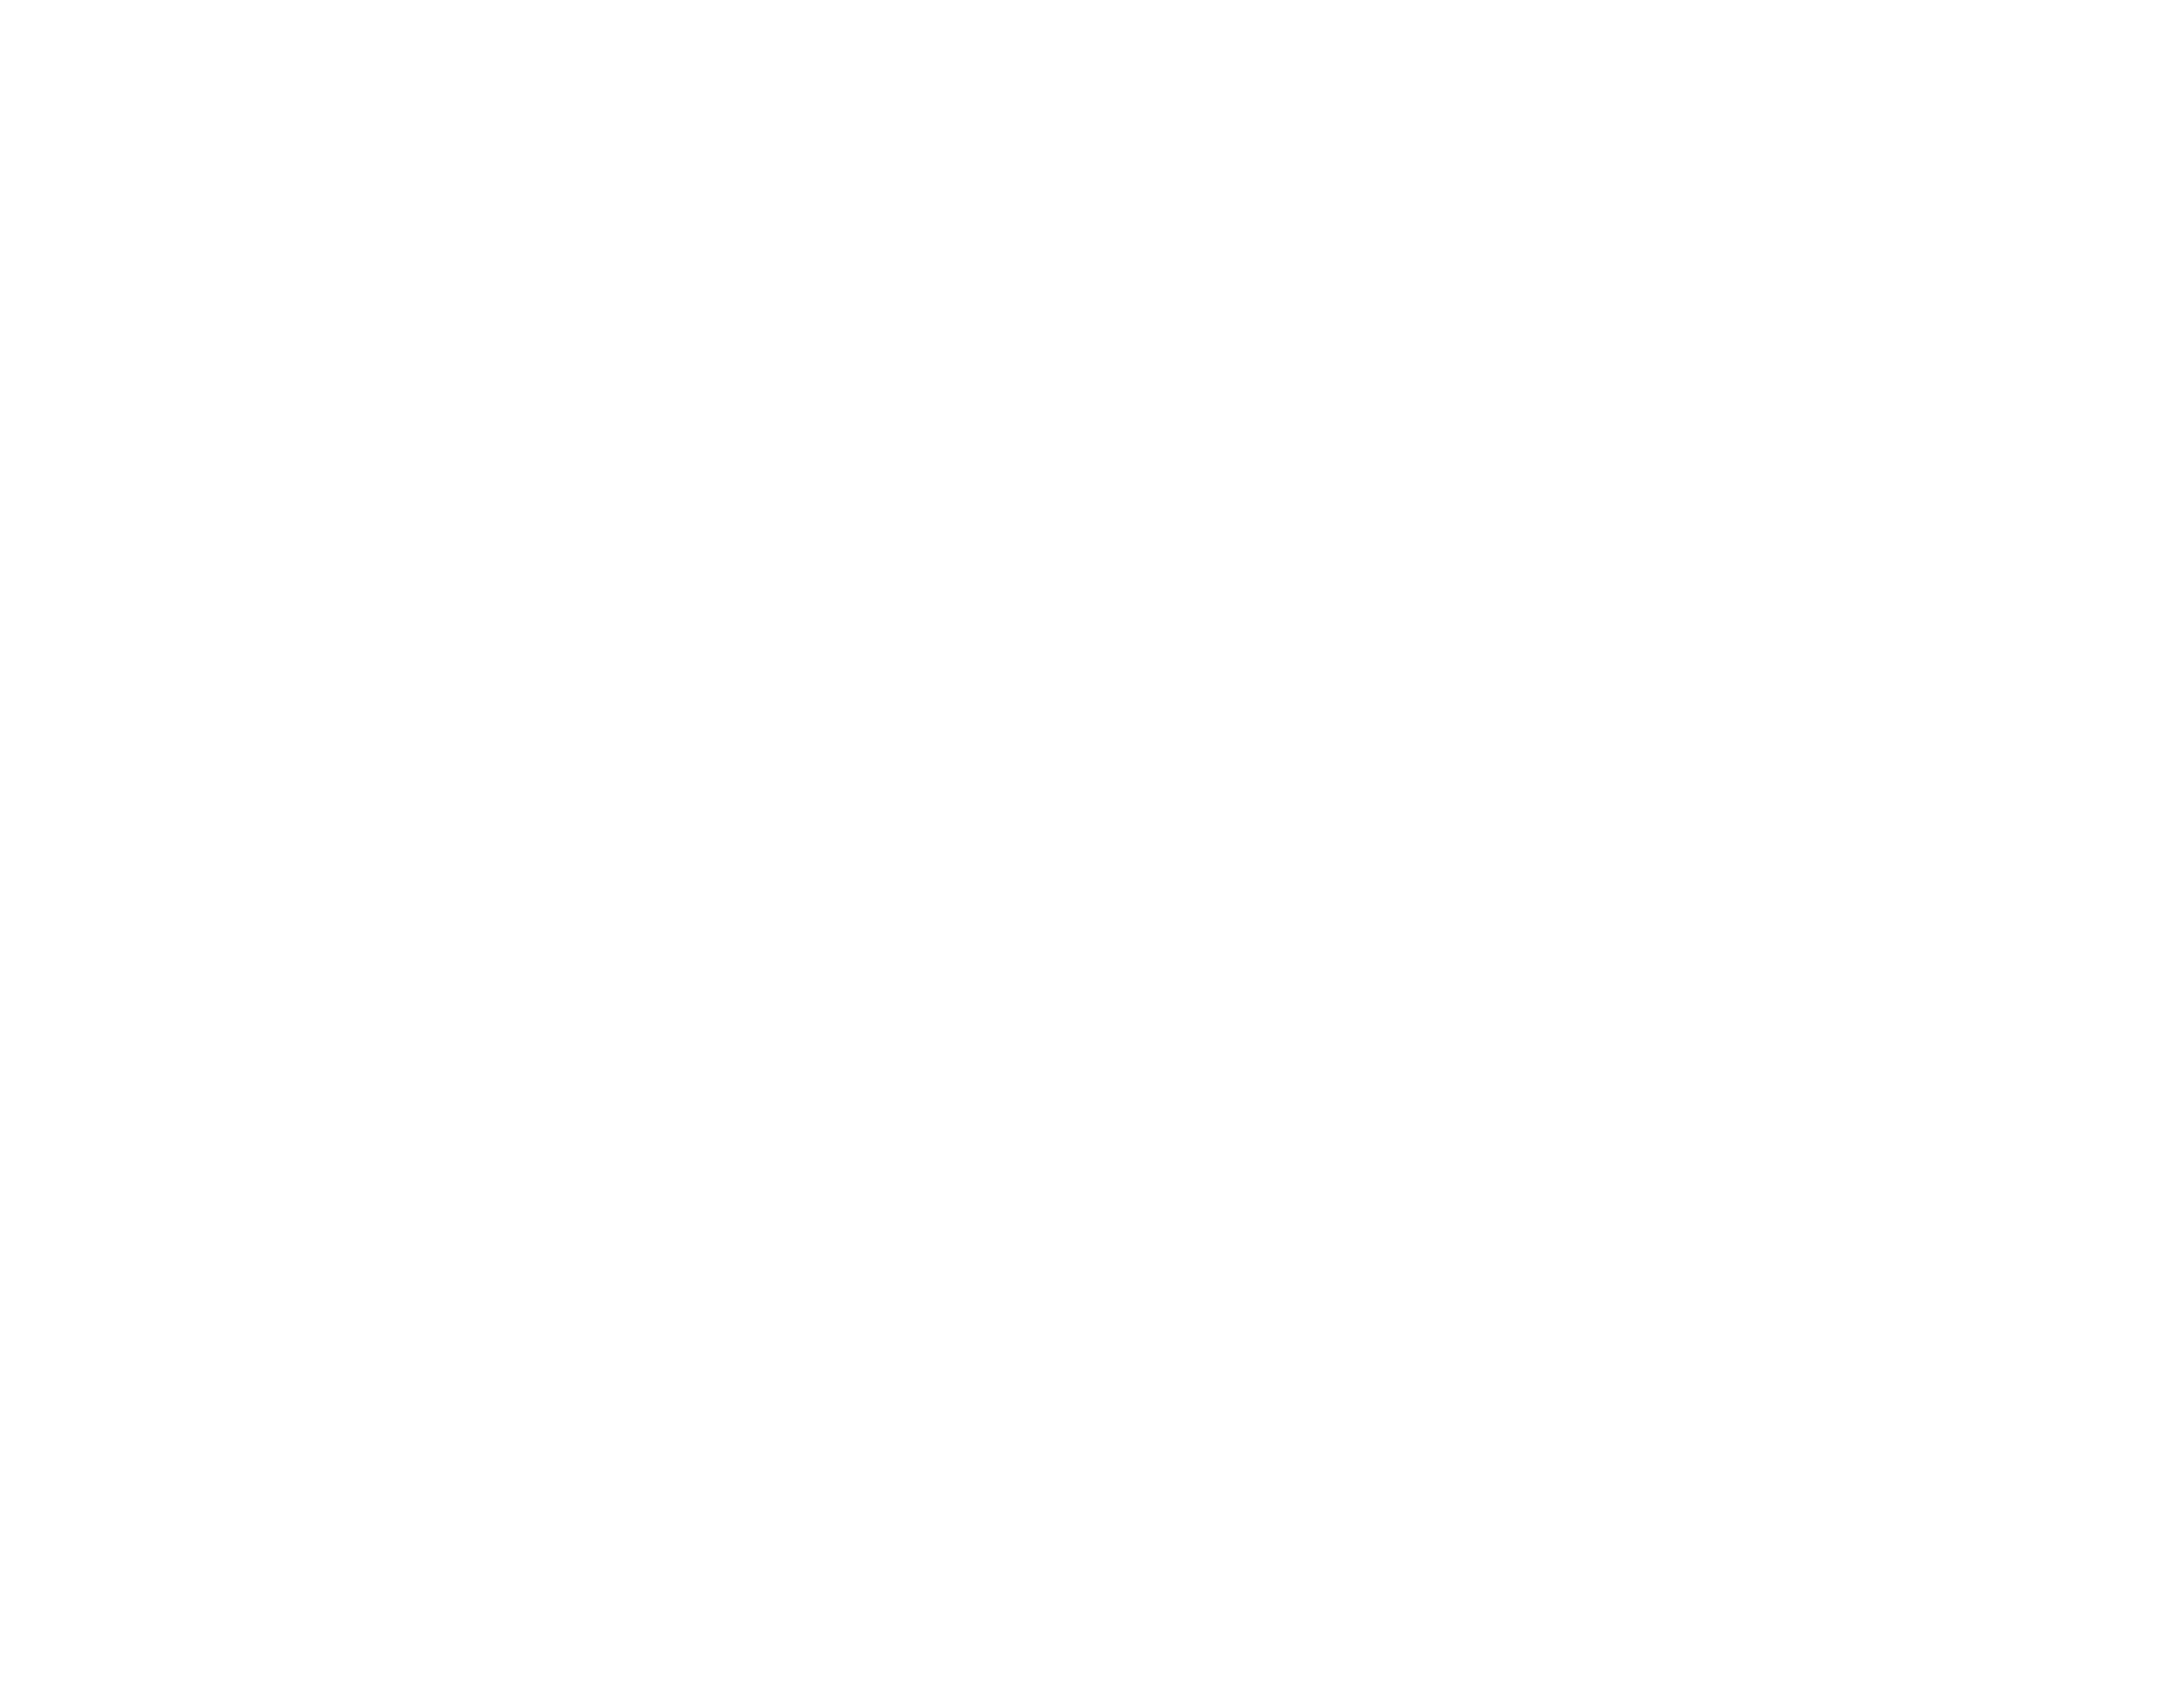

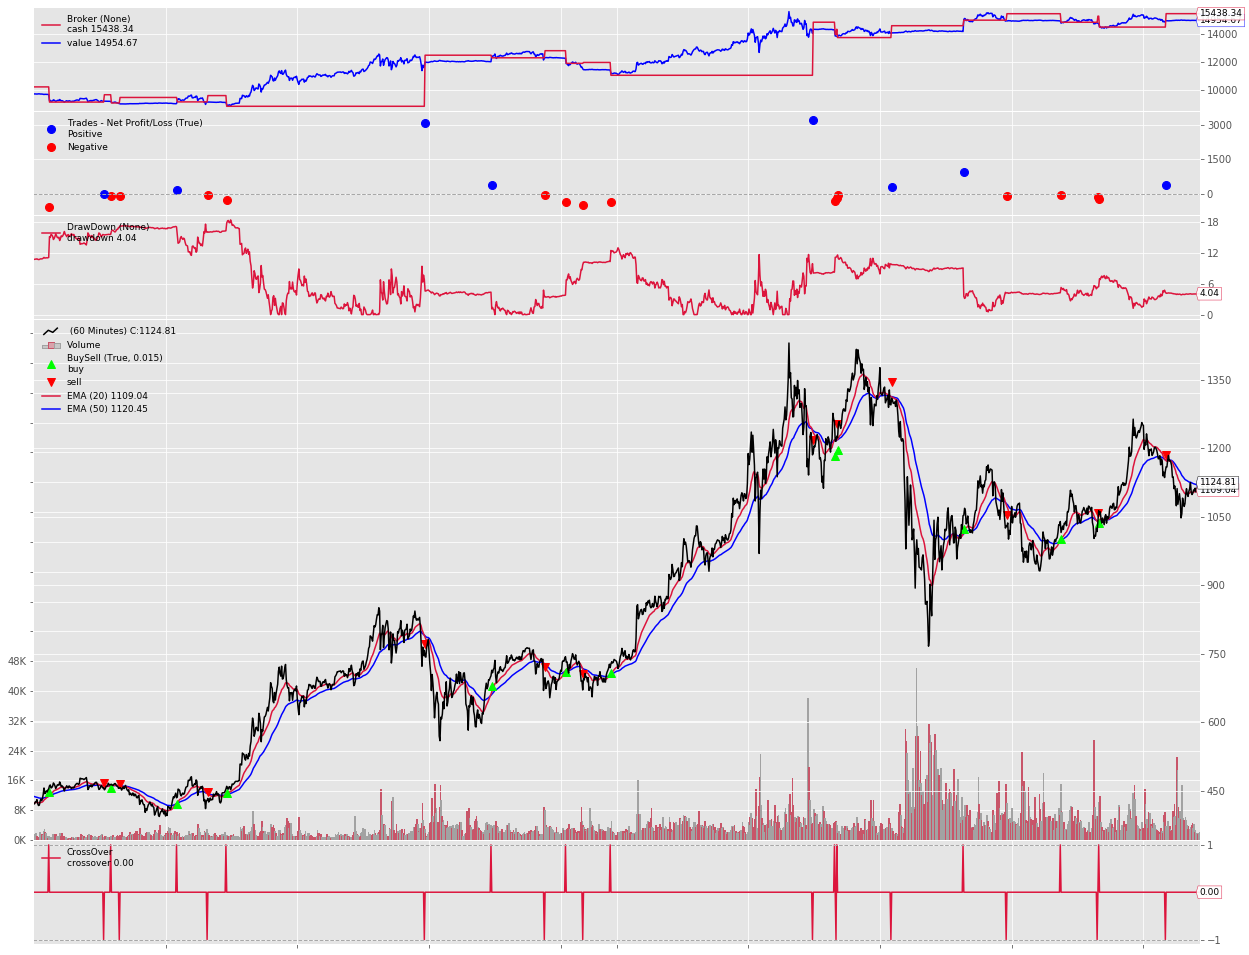

In [27]:
# Backtest with optimised parameters on ETH/USD

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 20),
        ('long_ema', 50),
        ('mult', 10),
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=eth_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', thestrat.analyzers.returns.get_analysis()['rnorm100'] * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 2, 1))
    
    # cerebro.plot()  # plot backtest



So with these parameters Portfolio value increased, Sharpe and CAGR increased. Less trades were made and strike rate increased while DrawDown decreased

# Bitcoin

## Download and organise data from Binance (BTC / USDT) 1 hour candles

In [13]:
# download data (might take a minute)
# BTC/USDT pair at 1 hour granularity
btc_usdt1h_raw = pd.DataFrame(client.get_historical_klines("BTCUSDT", 
                                                           Client.KLINE_INTERVAL_1HOUR, 
                                                           '1 Jan 2017'))

In [14]:
# organise btc/usdt data
btc_usdt1h = organise_binance_klines(btc_usdt1h_raw, save_csv=True, csv_name='btc_usdt1h')

# describe downloaded data
btc_usdt1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17535 entries, 2017-08-17 04:59:59.999000 to 2019-08-21 14:59:59.999000
Data columns (total 13 columns):
open_time_unix                  17535 non-null int64
open                            17535 non-null float64
high                            17535 non-null float64
low                             17535 non-null float64
close                           17535 non-null float64
volume                          17535 non-null float64
close_time_unix                 17535 non-null int64
quote_asset_volume              17535 non-null float64
number_of_trades                17535 non-null int64
taker_buy_base_asset_volume     17535 non-null float64
taker_buy_quote_asset_volume    17535 non-null float64
ignore                          17535 non-null object
candle-start                    17535 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 1.9+ MB


In [15]:
btc_usdt1h.head()

,open_time_unix,open,high,low,close,volume,close_time_unix,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,candle-start
candle-end,,,,,,,,,,,,,
2017-08-17 04:59:59.999,1502942400000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,202366.138393,171,35.160503,150952.477943,7887.63551305,2017-08-17 04:00:00
2017-08-17 05:59:59.999,1502946000000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,100304.823567,102,21.448071,92608.279728,8039.26240152,2017-08-17 05:00:00
2017-08-17 06:59:59.999,1502949600000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,31282.312670,36,4.802861,20795.317224,8041.76049845,2017-08-17 06:00:00
2017-08-17 07:59:59.999,1502953200000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,19241.058300,25,2.602292,11291.347015,8048.12788573,2017-08-17 07:00:00
2017-08-17 08:59:59.999,1502956800000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4239.503586,28,0.814655,3552.746817,8018.03650010,2017-08-17 08:00:00


In [16]:
btc_usdt1h.describe()

,open_time_unix,open,high,low,close,volume,close_time_unix,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,1.753500e+04,17535.000000,17535.000000,17535.000000,17535.000000,17535.000000,1.753500e+04,1.753500e+04,17535.000000,17535.000000,1.753500e+04
mean,1.534680e+12,7272.242046,7325.026181,7214.964224,7272.546448,1342.630620,1.534683e+12,1.007057e+07,9776.346450,691.017339,5.163909e+06
std,1.831833e+10,3039.388169,3081.376430,2991.272675,3039.334745,1361.829253,1.831833e+10,1.191107e+07,9272.869954,681.590569,5.932366e+06
min,1.502942e+12,2870.900000,2950.000000,2817.000000,2919.000000,0.000000,1.502946e+12,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.518867e+12,4648.175000,4685.550000,4611.420000,4645.705000,554.910558,1.518871e+12,3.186062e+06,4759.000000,282.852440,1.643457e+06
50%,1.534712e+12,6661.000000,6688.910000,6631.820000,6661.170000,1047.305588,1.534716e+12,7.264499e+06,7590.000000,551.841149,3.798123e+06
75%,1.550529e+12,8870.000000,8928.000000,8793.310000,8869.995000,1698.248371,1.550533e+12,1.259218e+07,12346.500000,883.546800,6.595508e+06
max,1.566396e+12,19709.500000,19798.680000,19552.000000,19709.500000,21248.059869,1.566400e+12,2.122868e+08,135909.000000,11409.932517,1.390818e+08


## Visualise BTC price data

<IPython.core.display.Javascript object>


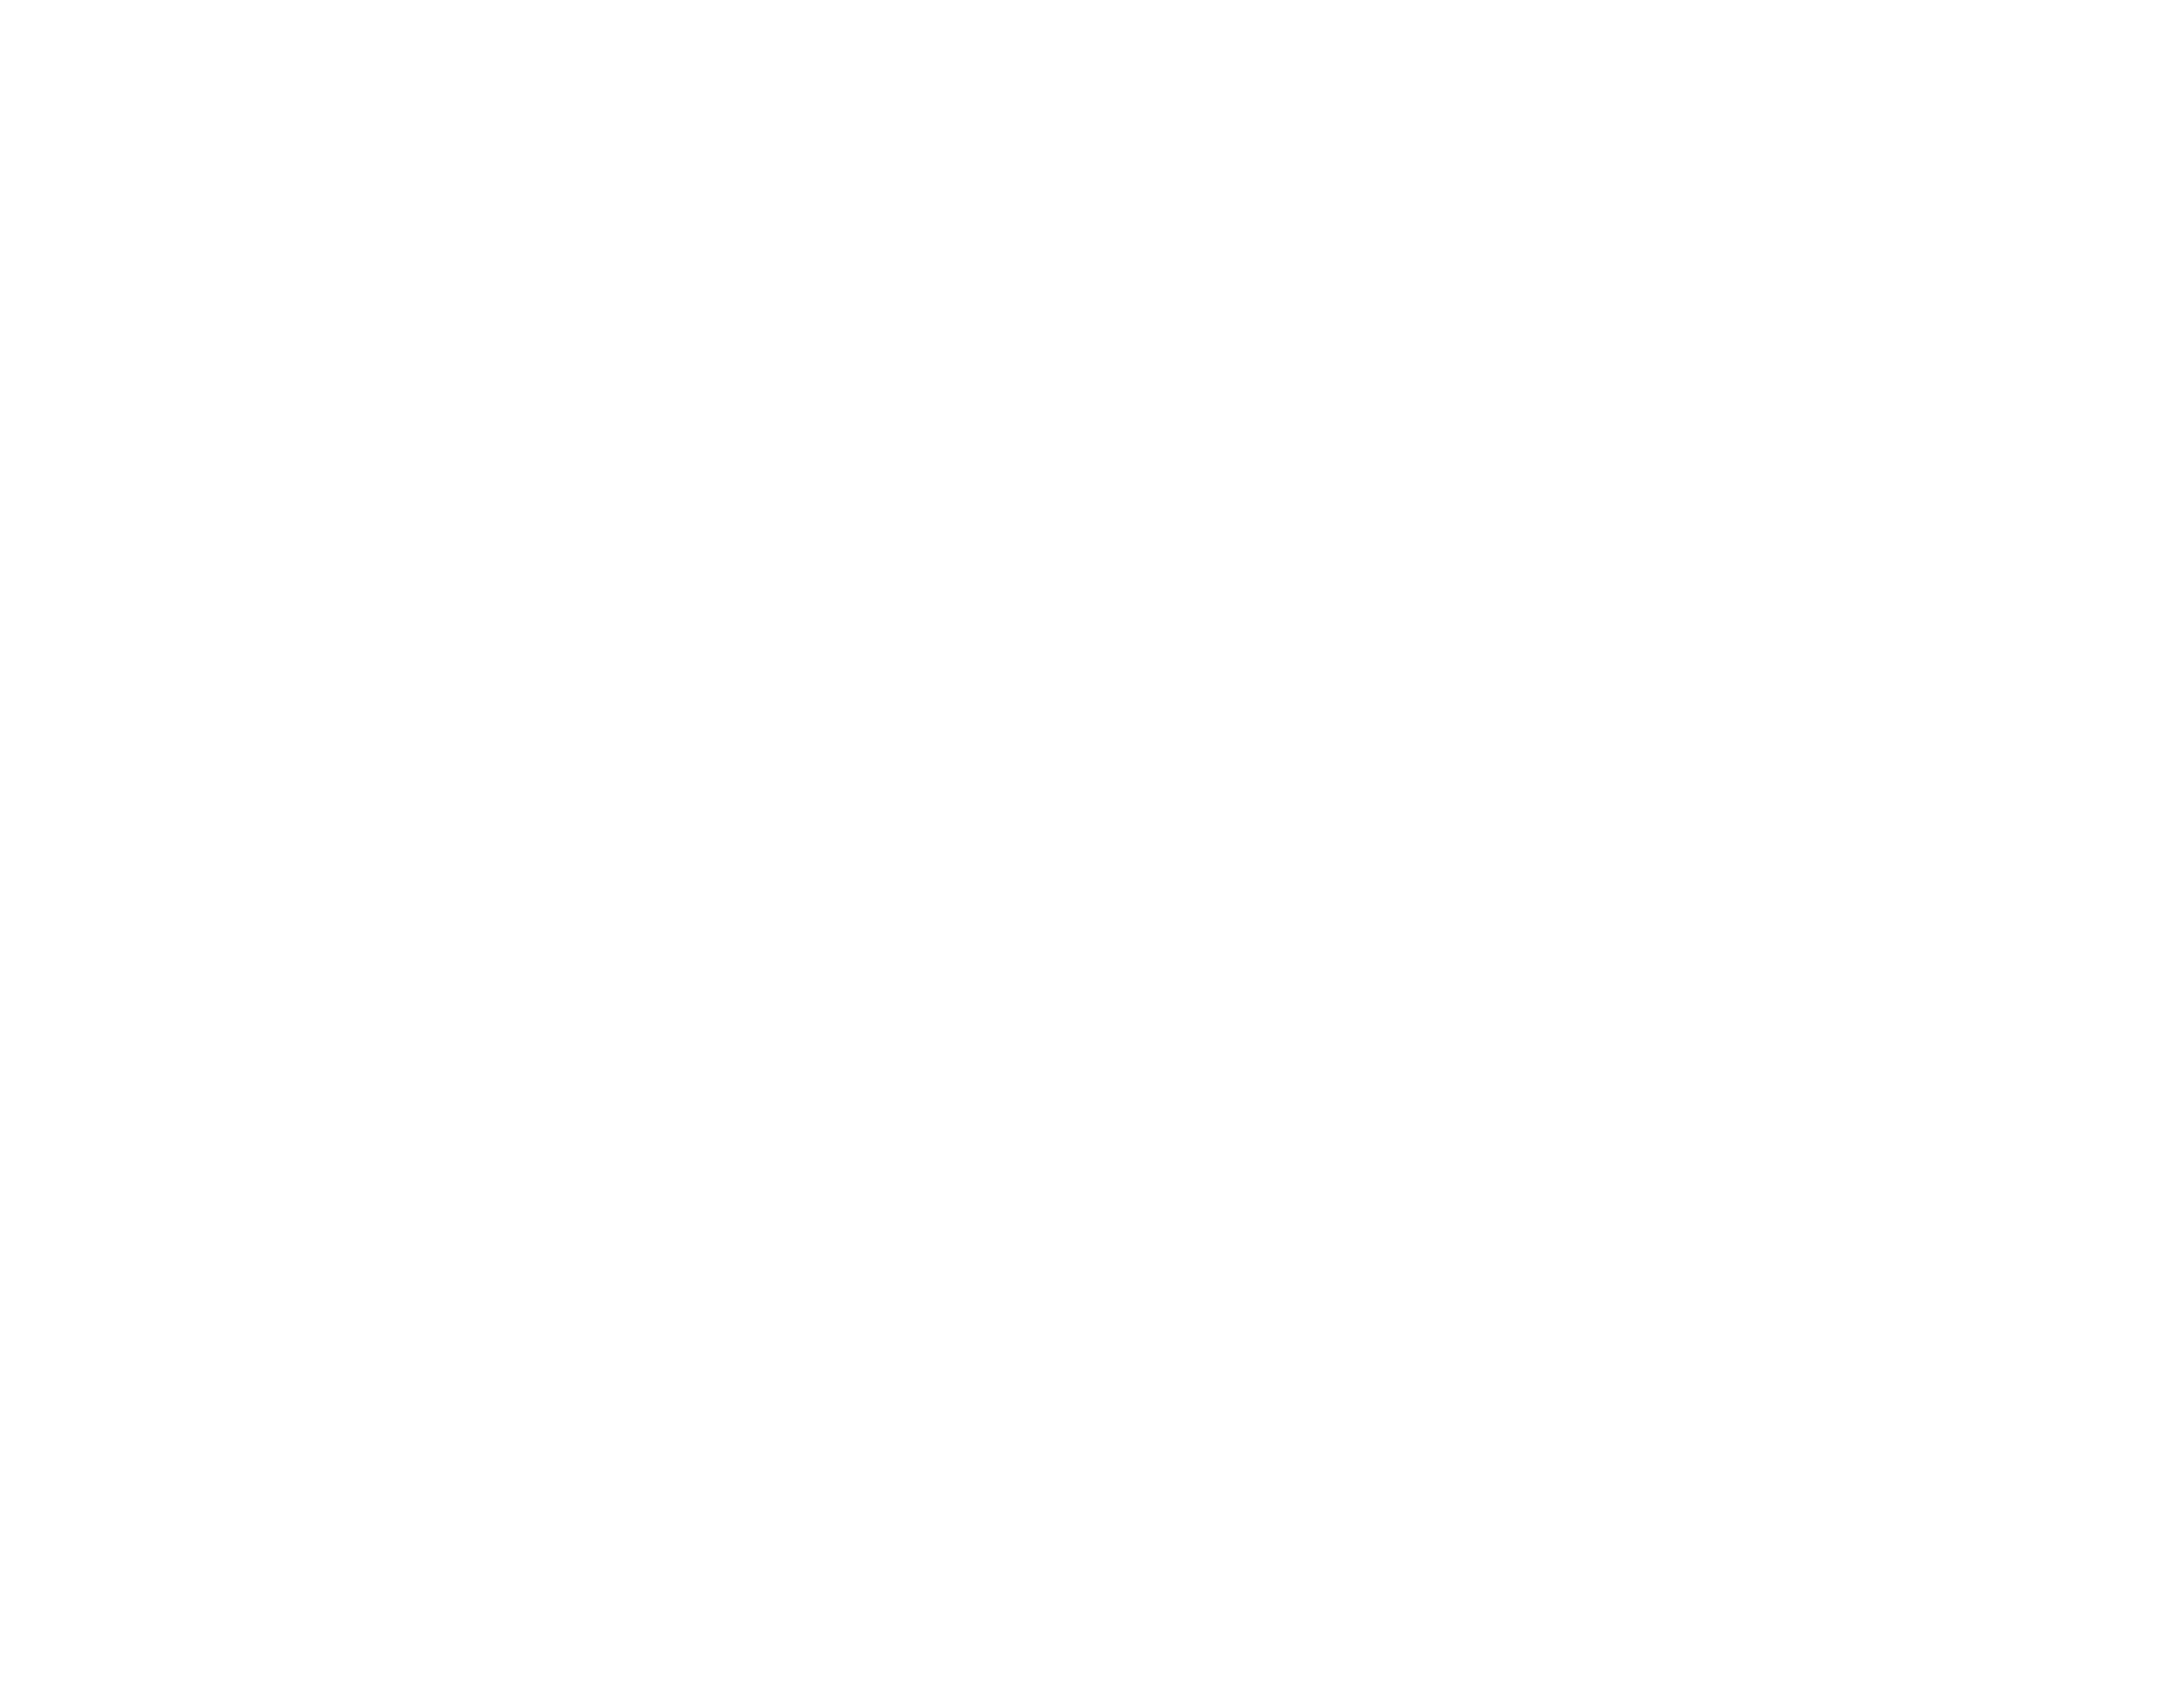

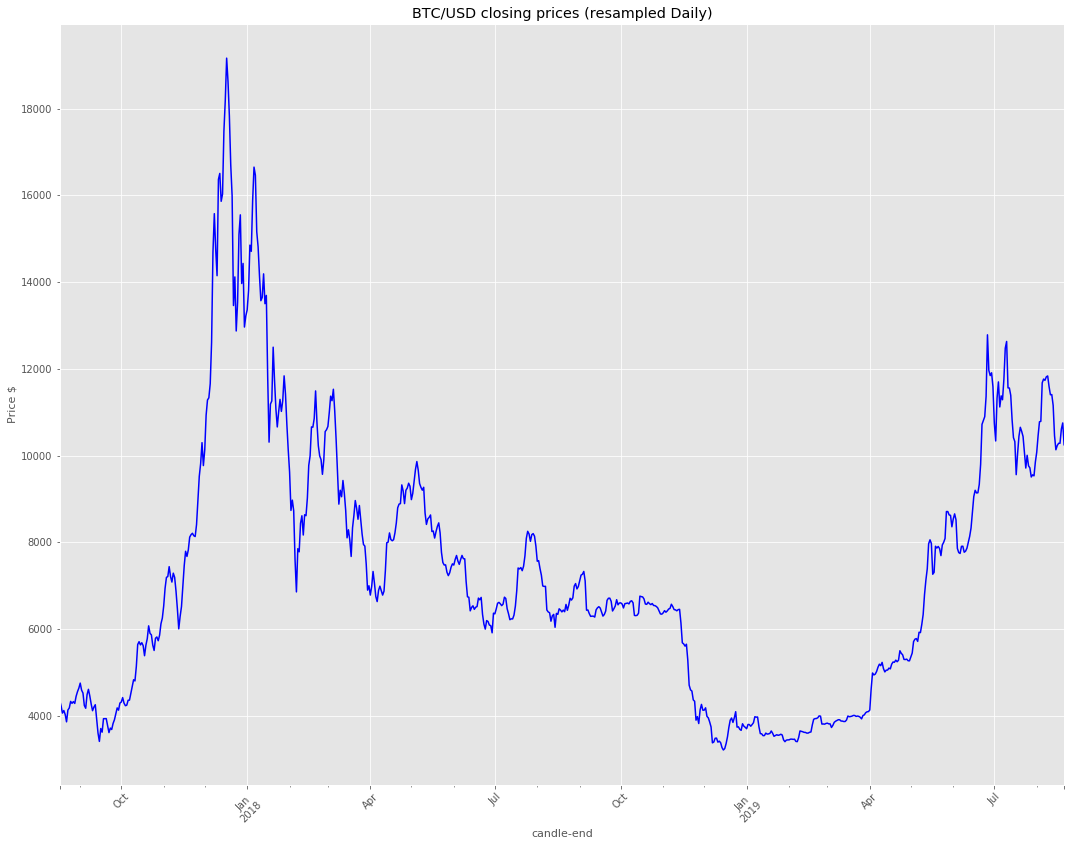

In [31]:
fig = plt.figure(figsize=(18, 14))

ax1 = fig.add_subplot()
ax1.set_xlabel(xlabel='Time', fontsize=11)
ax1.set_ylabel(ylabel='Price $', fontsize=11)

# data is in hourly resolution, so resampling it in daily format to smooth graph
btc_usdt1h['close'].resample('D').mean().plot(ax=ax1, color='blue')

plt.title('BTC/USD closing prices (resampled Daily)')

plt.xticks(rotation=45)

plt.show()

## Backtest: EMA and Price Crossover strategy on BTC / USDT 1h

Starting Portfolio Value: 10000.00
2017-08-23T01:59:59.998997, BUY CREATE , 4100.00
2017-08-23T02:59:59.999004, BUY EXECUTED, Price: 4101.53, Cost: 492.18, Comm 0.49
2017-08-23T02:59:59.999004, Trade id: 3215
2017-08-26T02:59:59.999004, CLOSE LONG , 4266.04 , Wait for Short
2017-08-26T03:59:59.999000, SELL EXECUTED, Price: 4245.01, Cost: 492.18, Comm 0.55
2017-08-26T03:59:59.999000, OPERATION PROFIT, GROSS 172.18, NET 171.13, Acc Balance: 10171.13
2017-08-28T04:59:59.998997, SELL CREATE , 4227.00
2017-08-28T05:59:59.999004, SELL EXECUTED, Price: 4251.92, Cost: -510.23, Comm 0.51
2017-08-28T05:59:59.999004, Trade id: 3216
2017-08-28T10:59:59.998997, CLOSE SHORT , 4290.77 , Wait for Long
2017-08-28T11:59:59.999004, BUY EXECUTED, Price: 4290.77, Cost: -510.23, Comm 0.51
2017-08-28T11:59:59.999004, OPERATION PROFIT, GROSS -46.62, NET -47.65, Acc Balance: 10123.49
2017-08-28T19:59:59.998997, BUY CREATE , 4321.65
2017-08-28T20:59:59.999004, BUY EXECUTED, Price: 4321.65, Cost: 518.60, Comm 0.

2017-11-13T13:59:59.998997, BUY CREATE , 6561.81
2017-11-13T14:59:59.999004, BUY EXECUTED, Price: 6525.40, Cost: 522.03, Comm 0.52
2017-11-13T14:59:59.999004, Trade id: 3247
2017-11-13T18:59:59.999000, CLOSE LONG , 6230.42 , Wait for Short
2017-11-13T19:59:59.998997, SELL EXECUTED, Price: 6230.58, Cost: 522.03, Comm 0.50
2017-11-13T19:59:59.998997, OPERATION PROFIT, GROSS -235.86, NET -236.88, Acc Balance: 11170.89
2017-11-23T11:59:59.999004, SELL CREATE , 8099.97
2017-11-23T12:59:59.999000, SELL EXECUTED, Price: 8099.95, Cost: -486.00, Comm 0.49
2017-11-23T12:59:59.999000, Trade id: 3248
2017-11-23T16:59:59.998997, CLOSE SHORT , 8176.11 , Wait for Long
2017-11-23T17:59:59.999004, BUY EXECUTED, Price: 8176.14, Cost: -486.00, Comm 0.49
2017-11-23T17:59:59.999004, OPERATION PROFIT, GROSS -45.71, NET -46.69, Acc Balance: 11124.20
2017-11-24T19:59:59.998997, BUY CREATE , 8224.98
2017-11-24T20:59:59.999004, BUY EXECUTED, Price: 8214.98, Cost: 492.90, Comm 0.49
2017-11-24T20:59:59.999004, Tr

2018-02-11T04:00:00.998995, SELL CREATE , 7976.74
2018-02-11T04:59:59.998997, SELL EXECUTED, Price: 7976.74, Cost: -478.60, Comm 0.48
2018-02-11T04:59:59.998997, Trade id: 3280
2018-02-11T12:59:59.999000, CLOSE SHORT , 8281.00 , Wait for Long
2018-02-11T13:59:59.998997, BUY EXECUTED, Price: 8280.00, Cost: -478.60, Comm 0.50
2018-02-11T13:59:59.998997, OPERATION PROFIT, GROSS -181.96, NET -182.93, Acc Balance: 10403.27
2018-02-12T02:59:59.999004, BUY CREATE , 8518.00
2018-02-12T03:59:59.999000, BUY EXECUTED, Price: 8518.00, Cost: 511.08, Comm 0.51
2018-02-12T03:59:59.999000, Trade id: 3281
2018-02-13T08:59:59.999004, CLOSE LONG , 8531.12 , Wait for Short
2018-02-13T09:59:59.999000, SELL EXECUTED, Price: 8531.06, Cost: 511.08, Comm 0.53
2018-02-13T09:59:59.999000, OPERATION PROFIT, GROSS 7.84, NET 6.80, Acc Balance: 10410.07
2018-02-21T10:59:59.998997, SELL CREATE , 10963.12
2018-02-21T11:59:59.999004, SELL EXECUTED, Price: 10975.63, Cost: -548.78, Comm 0.55
2018-02-21T11:59:59.999004, T

2018-05-13T09:59:59.999000, CLOSE SHORT , 8576.00 , Wait for Long
2018-05-13T10:59:59.998997, BUY EXECUTED, Price: 8583.00, Cost: -545.10, Comm 0.56
2018-05-13T10:59:59.998997, OPERATION PROFIT, GROSS 301.20, NET 300.10, Acc Balance: 10448.59
2018-05-13T19:59:59.998997, BUY CREATE , 8632.00
2018-05-13T20:59:59.999004, BUY EXECUTED, Price: 8632.00, Cost: 517.92, Comm 0.52
2018-05-13T20:59:59.999004, Trade id: 3311
2018-05-14T03:59:59.999000, CLOSE LONG , 8390.00 , Wait for Short
2018-05-14T04:59:59.998997, SELL EXECUTED, Price: 8383.26, Cost: 517.92, Comm 0.52
2018-05-14T04:59:59.998997, OPERATION PROFIT, GROSS -149.24, NET -150.28, Acc Balance: 10298.31
2018-05-14T05:59:59.999004, SELL CREATE , 8369.14
2018-05-14T06:59:59.999000, SELL EXECUTED, Price: 8369.14, Cost: -502.15, Comm 0.50
2018-05-14T06:59:59.999000, Trade id: 3312
2018-05-14T13:59:59.998997, CLOSE SHORT , 8680.00 , Wait for Long
2018-05-14T14:59:59.999004, BUY EXECUTED, Price: 8680.00, Cost: -502.15, Comm 0.52
2018-05-14T1

2018-07-01T14:59:59.999004, CLOSE LONG , 6285.38 , Wait for Short
2018-07-01T15:59:59.999000, SELL EXECUTED, Price: 6285.39, Cost: 512.96, Comm 0.52
2018-07-01T15:59:59.999000, OPERATION PROFIT, GROSS -101.28, NET -102.31, Acc Balance: 10013.30
2018-07-05T19:59:59.998997, SELL CREATE , 6510.32
2018-07-05T20:59:59.999004, SELL EXECUTED, Price: 6509.86, Cost: -520.79, Comm 0.52
2018-07-05T20:59:59.999004, Trade id: 3334
2018-07-06T12:59:59.999000, CLOSE SHORT , 6587.00 , Wait for Long
2018-07-06T13:59:59.998997, BUY EXECUTED, Price: 6587.85, Cost: -520.79, Comm 0.54
2018-07-06T13:59:59.998997, OPERATION PROFIT, GROSS -62.39, NET -63.45, Acc Balance: 9949.84
2018-07-06T22:59:59.998997, BUY CREATE , 6574.70
2018-07-06T23:59:59.999004, BUY EXECUTED, Price: 6574.70, Cost: 525.98, Comm 0.53
2018-07-06T23:59:59.999004, Trade id: 3335
2018-07-07T12:59:59.999000, CLOSE LONG , 6557.12 , Wait for Short
2018-07-07T13:59:59.998997, SELL EXECUTED, Price: 6560.38, Cost: 525.98, Comm 0.54
2018-07-07T13

2018-08-30T11:59:59.999004, SELL CREATE , 6870.14
2018-08-30T12:59:59.999000, SELL EXECUTED, Price: 6873.99, Cost: -481.18, Comm 0.48
2018-08-30T12:59:59.999000, Trade id: 3356
2018-08-30T23:59:59.999004, CLOSE SHORT , 6984.84 , Wait for Long
2018-08-31T00:59:59.999000, BUY EXECUTED, Price: 6984.84, Cost: -481.18, Comm 0.50
2018-08-31T00:59:59.999000, OPERATION PROFIT, GROSS -77.60, NET -78.58, Acc Balance: 9551.39
2018-08-31T07:59:59.998997, BUY CREATE , 6965.58
2018-08-31T08:59:59.999004, BUY EXECUTED, Price: 6965.58, Cost: 487.59, Comm 0.49
2018-08-31T08:59:59.999004, Trade id: 3357
2018-08-31T08:59:59.999004, CLOSE LONG , 6951.23 , Wait for Short
2018-08-31T09:59:59.999000, SELL EXECUTED, Price: 6953.82, Cost: 487.59, Comm 0.49
2018-08-31T09:59:59.999000, OPERATION PROFIT, GROSS -8.23, NET -9.21, Acc Balance: 9542.19
2018-08-31T10:59:59.998997, SELL CREATE , 6952.43
2018-08-31T11:59:59.999004, SELL EXECUTED, Price: 6952.43, Cost: -486.67, Comm 0.49
2018-08-31T11:59:59.999004, Trade

2018-10-09T12:59:59.999000, CLOSE LONG , 6634.10 , Wait for Short
2018-10-09T13:59:59.998997, SELL EXECUTED, Price: 6631.82, Cost: 463.10, Comm 0.48
2018-10-09T13:59:59.998997, OPERATION PROFIT, GROSS 11.30, NET 10.36, Acc Balance: 9880.94
2018-10-10T04:59:59.998997, SELL CREATE , 6594.40
2018-10-10T05:59:59.999004, SELL EXECUTED, Price: 6594.40, Cost: -461.61, Comm 0.46
2018-10-10T05:59:59.999004, Trade id: 3382
2018-10-10T18:59:59.999000, CLOSE SHORT , 6637.20 , Wait for Long
2018-10-10T19:59:59.998997, BUY EXECUTED, Price: 6637.20, Cost: -461.61, Comm 0.46
2018-10-10T19:59:59.998997, OPERATION PROFIT, GROSS -29.96, NET -30.89, Acc Balance: 9850.05
2018-10-14T04:59:59.998997, BUY CREATE , 6391.67
2018-10-14T05:59:59.999004, BUY EXECUTED, Price: 6391.73, Cost: 511.34, Comm 0.51
2018-10-14T05:59:59.999004, Trade id: 3383
2018-10-14T21:59:59.999000, CLOSE LONG , 6356.15 , Wait for Short
2018-10-14T22:59:59.998997, SELL EXECUTED, Price: 6356.22, Cost: 511.34, Comm 0.51
2018-10-14T22:59:5

2019-01-08T23:59:59.999004, CLOSE LONG , 3955.13 , Wait for Short
2019-01-09T00:59:59.999000, SELL EXECUTED, Price: 3955.45, Cost: 492.85, Comm 0.55
2019-01-09T00:59:59.999000, OPERATION PROFIT, GROSS 213.63, NET 212.58, Acc Balance: 10224.71
2019-01-10T06:59:59.999000, SELL CREATE , 3781.31
2019-01-10T07:59:59.998997, SELL EXECUTED, Price: 3779.63, Cost: -491.35, Comm 0.49
2019-01-10T07:59:59.998997, Trade id: 3416
2019-01-14T15:59:59.999000, CLOSE SHORT , 3630.98 , Wait for Long
2019-01-14T16:59:59.998997, BUY EXECUTED, Price: 3630.98, Cost: -491.35, Comm 0.53
2019-01-14T16:59:59.998997, OPERATION PROFIT, GROSS 193.25, NET 192.23, Acc Balance: 10416.94
2019-01-14T18:59:59.999000, BUY CREATE , 3628.01
2019-01-14T19:59:59.998997, BUY EXECUTED, Price: 3629.32, Cost: 508.10, Comm 0.51
2019-01-14T19:59:59.998997, Trade id: 3417
2019-01-15T20:59:59.999004, CLOSE LONG , 3532.59 , Wait for Short
2019-01-15T21:59:59.999000, SELL EXECUTED, Price: 3534.42, Cost: 508.10, Comm 0.51
2019-01-15T21:

2019-02-15T13:59:59.998997, BUY CREATE , 3618.74
2019-02-15T14:59:59.999004, BUY EXECUTED, Price: 3619.59, Cost: 506.74, Comm 0.51
2019-02-15T14:59:59.999004, Trade id: 3441
2019-02-15T14:59:59.999004, CLOSE LONG , 3585.99 , Wait for Short
2019-02-15T15:59:59.999000, SELL EXECUTED, Price: 3585.99, Cost: 506.74, Comm 0.50
2019-02-15T15:59:59.999000, OPERATION PROFIT, GROSS -47.04, NET -48.05, Acc Balance: 9915.76
2019-02-24T16:59:59.998997, SELL CREATE , 3758.76
2019-02-24T17:59:59.999004, SELL EXECUTED, Price: 3758.76, Cost: -488.64, Comm 0.49
2019-02-24T17:59:59.999004, Trade id: 3442
2019-02-27T23:59:59.999004, CLOSE SHORT , 3818.07 , Wait for Long
2019-02-28T00:59:59.999000, BUY EXECUTED, Price: 3818.04, Cost: -488.64, Comm 0.55
2019-02-28T00:59:59.999000, OPERATION PROFIT, GROSS -77.06, NET -78.10, Acc Balance: 9837.65
2019-02-28T11:59:59.999004, BUY CREATE , 3833.82
2019-02-28T12:59:59.999000, BUY EXECUTED, Price: 3833.46, Cost: 498.35, Comm 0.50
2019-02-28T12:59:59.999000, Trade 

2019-05-20T12:59:59.999000, CLOSE LONG , 7703.58 , Wait for Short
2019-05-20T13:59:59.998997, SELL EXECUTED, Price: 7702.73, Cost: 474.24, Comm 0.48
2019-05-20T13:59:59.998997, OPERATION PROFIT, GROSS -120.76, NET -121.71, Acc Balance: 9639.86
2019-05-22T12:59:59.999000, SELL CREATE , 7773.04
2019-05-22T13:59:59.998997, SELL EXECUTED, Price: 7772.67, Cost: -466.36, Comm 0.47
2019-05-22T13:59:59.998997, Trade id: 3466
2019-05-22T15:59:59.999000, CLOSE SHORT , 7939.60 , Wait for Long
2019-05-22T16:59:59.998997, BUY EXECUTED, Price: 7939.96, Cost: -466.36, Comm 0.48
2019-05-22T16:59:59.998997, OPERATION PROFIT, GROSS -100.37, NET -101.32, Acc Balance: 9538.54
2019-05-24T00:59:59.999000, BUY CREATE , 7860.40
2019-05-24T01:59:59.998997, BUY EXECUTED, Price: 7859.81, Cost: 471.59, Comm 0.47
2019-05-24T01:59:59.998997, Trade id: 3467
2019-05-26T03:59:59.999000, CLOSE LONG , 7965.00 , Wait for Short
2019-05-26T04:59:59.998997, SELL EXECUTED, Price: 7964.85, Cost: 471.59, Comm 0.50
2019-05-26T0

2019-08-17T08:59:59.999004, BUY CREATE , 10390.31
2019-08-17T09:59:59.999000, BUY EXECUTED, Price: 10390.81, Cost: 519.54, Comm 0.52
2019-08-17T09:59:59.999000, Trade id: 3503
2019-08-17T11:59:59.999004, CLOSE LONG , 10333.23 , Wait for Short
2019-08-17T12:59:59.999000, SELL EXECUTED, Price: 10330.76, Cost: 519.54, Comm 0.52
2019-08-17T12:59:59.999000, OPERATION PROFIT, GROSS -30.02, NET -31.06, Acc Balance: 9722.35
2019-08-17T16:59:59.998997, SELL CREATE , 10280.00
2019-08-17T17:59:59.999004, SELL EXECUTED, Price: 10277.13, Cost: -513.86, Comm 0.51
2019-08-17T17:59:59.999004, Trade id: 3504
2019-08-18T10:59:59.998997, CLOSE SHORT , 10357.95 , Wait for Long
2019-08-18T11:59:59.999004, BUY EXECUTED, Price: 10357.84, Cost: -513.86, Comm 0.53
2019-08-18T11:59:59.999004, OPERATION PROFIT, GROSS -40.36, NET -41.40, Acc Balance: 9680.95
2019-08-18T14:59:59.999004, BUY CREATE , 10374.90
2019-08-18T15:59:59.999000, BUY EXECUTED, Price: 10372.18, Cost: 518.61, Comm 0.52
2019-08-18T15:59:59.9990

<IPython.core.display.Javascript object>


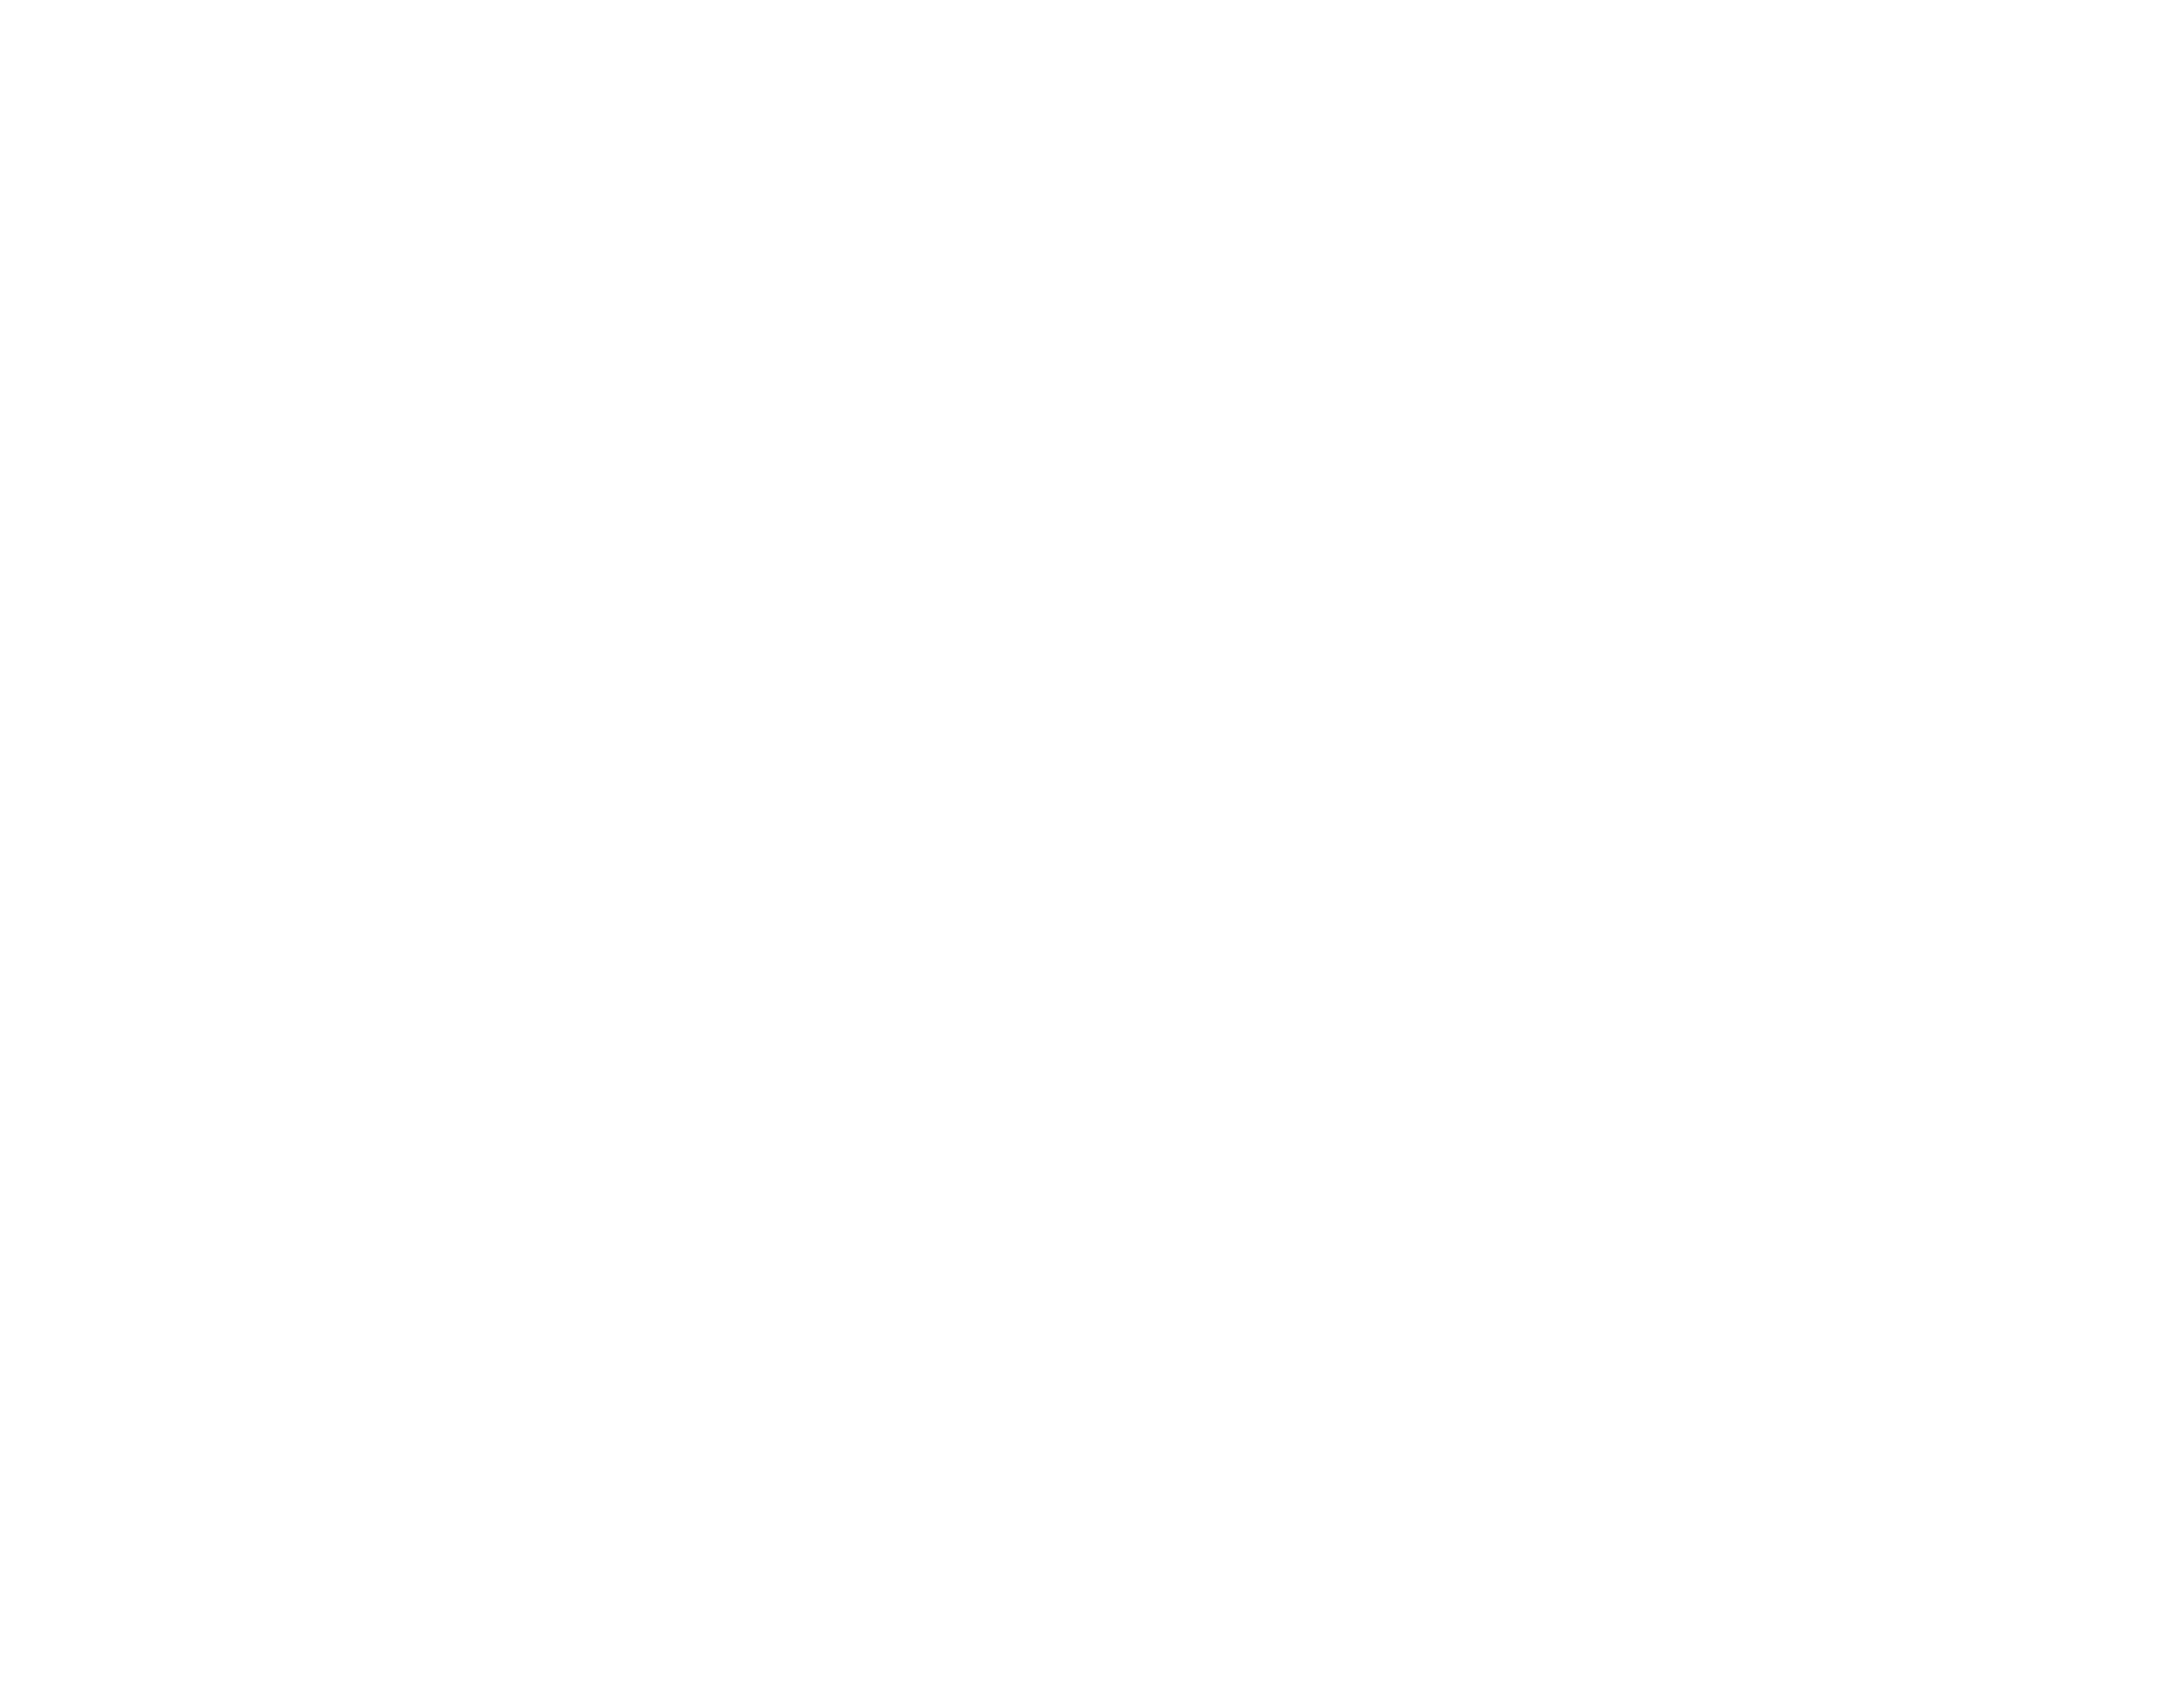

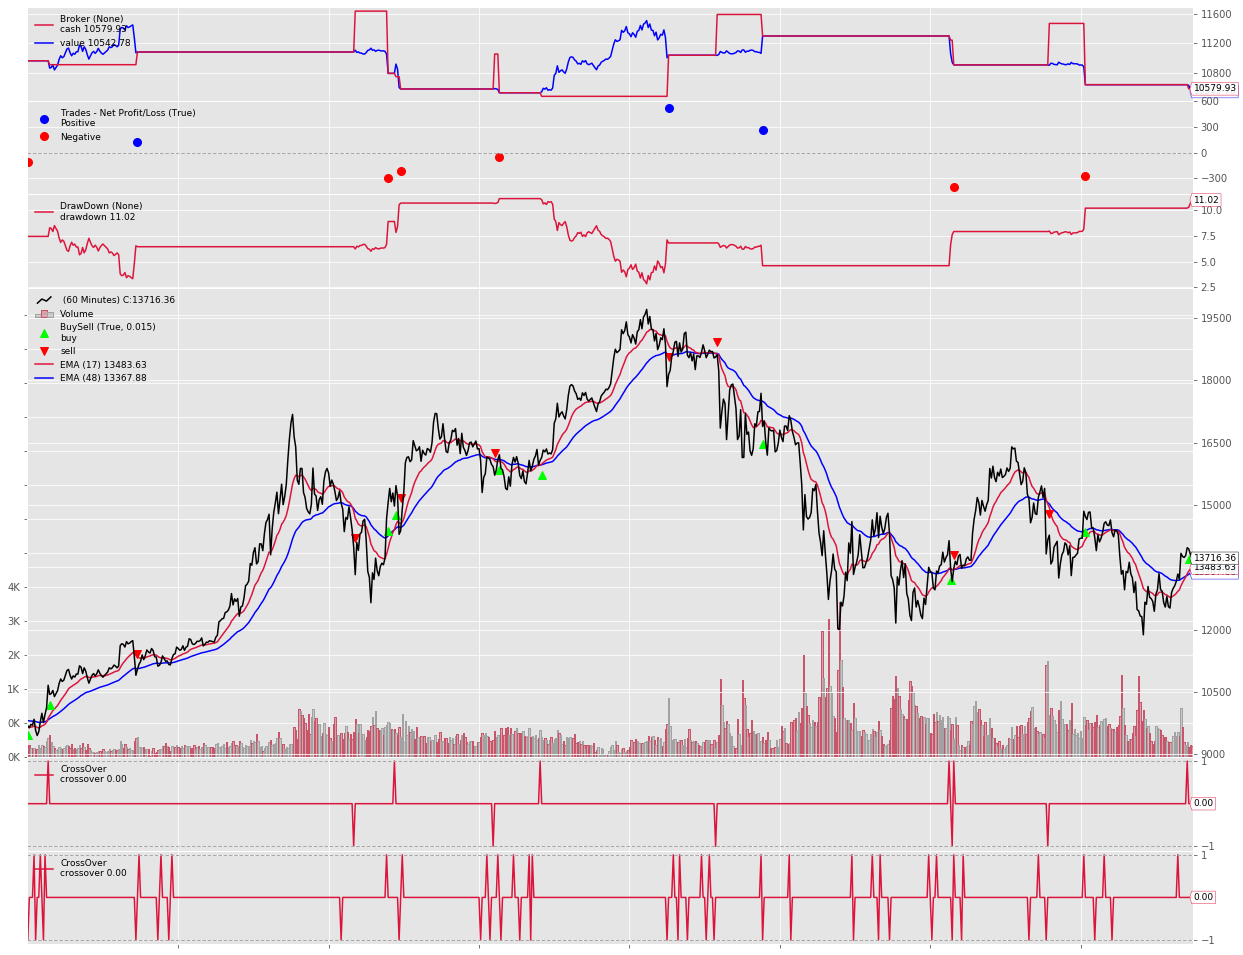

In [32]:
# Backtest for EMA and Price Crossover on BTC / USDT

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),  # multiply profits and loses (margin trading)
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )
    

    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)
        self.pricecrossover = bt.ind.CrossOver(self.datas[0].close, ema_long)
        
        self.wait_to_enter = ''


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        # if an order is active, no new orders are allowed
        if self.order:
            return   
        
        # if position is not opened
        if not self.position:
            
            # if signal is go long - cross upwards
            if self.crossover > 0:
                
                # if we are waiting for a Short signal
                if self.wait_to_enter == 'wait_for_short':
                    return
                
                else: # BUY BUY BUY
                    self.log('BUY CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.buy(size=round(min((cerebro.broker.getvalue()*0.05),
                                                         500) / self.dataclose[0], 2))
                            # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
            
            # if signal is go short - cross downwards
            elif self.crossover < 0:
                
                # if we are waiting for a Long signal
                if self.wait_to_enter == 'wait_for_long':
                    return

                else:  # SELL SELL SELL
                    self.log('SELL CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.sell(size=round(min((cerebro.broker.getvalue()*0.05),
                                             500) / self.dataclose[0], 2))
                             # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
        
        # if we are in the market:
        elif self.position:
            # if price signals close short == -1
            if self.pricecrossover > 0:
                self.log('CLOSE SHORT , %.2f , Wait for Long' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_long'
                self.order = self.close()
            
            # if price signals close long == 1
            elif self.pricecrossover < 0:
                self.log('CLOSE LONG , %.2f , Wait for Short' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_short'
                self.order = self.close()

                
                
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isopen:
            self.log('Trade id: {}'.format(trade.ref))
        
        elif trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=btc_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', thestrat.analyzers.returns.get_analysis()['rnorm100'] * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 1, 1))
    
    # cerebro.plot()  # plot backtest

## Optimise parameters for EMA and Price Crossover

In [19]:
# Parameter optimisation for EMA and Price Crossover on BTC / USDT

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', False),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)
        self.pricecrossover = bt.ind.CrossOver(self.datas[0].close, ema_long)
        
        self.wait_to_enter = ''


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        # if an order is active, no new orders are allowed
        if self.order:
            return   
        
        # if position is not opened
        if not self.position:
            
            # if signal is go long - cross upwards
            if self.crossover > 0:
                
                # if we are waiting for a Short signal
                if self.wait_to_enter == 'wait_for_short':
                    return
                
                else: # BUY BUY BUY
                    self.log('BUY CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.buy(size=round(min((cerebro.broker.getvalue()*0.05),
                                                         500) / self.dataclose[0], 2))
                            # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
            
            # if signal is go short - cross downwards
            elif self.crossover < 0:
                
                # if we are waiting for a Long signal
                if self.wait_to_enter == 'wait_for_long':
                    return

                else:  # SELL SELL SELL
                    self.log('SELL CREATE , %.2f' % self.dataclose[0])
                    self.wait_to_enter = ''
                    # to make orders at 5% of portfolio value, no more than 500$
                    self.order = self.sell(size=round(min((cerebro.broker.getvalue()*0.05),
                                             500) / self.dataclose[0], 2))
                             # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)
        
        # if we are in the market:
        elif self.position:
            # if price signals close short == -1
            if self.pricecrossover > 0:
                self.log('CLOSE SHORT , %.2f , Wait for Long' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_long'
                self.order = self.close()
            
            # if price signals close long == 1
            elif self.pricecrossover < 0:
                self.log('CLOSE LONG , %.2f , Wait for Short' % self.dataclose[0])
                self.wait_to_enter = 'wait_for_short'
                self.order = self.close()


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))
    
    
#     UNCOMMENT TO OPTIMISE
    def stop(self):
        self.log('(Short EMA %2d), (Long EMA: %2d) Ending Value %.2f' %
                 (self.params.short_ema, self.params.long_ema, self.broker.getvalue()),
                 doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    strats = cerebro.optstrategy(
        TestStrategy,
        short_ema=range(15, 21),
        long_ema=range(45, 51))
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=btc_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Add a Percentage sizer - set to 5% of portfolio value
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=5)
    # cerebro.addsizer(bt.sizers.FixedSize)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Run over everything
    thestrats = cerebro.run(maxcpus=2)  # OPTIMIZE
    thestrat = thestrats[0]


Starting Portfolio Value: 10000.00
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 45) Ending Value 8960.36
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 46) Ending Value 8133.69
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 47) Ending Value 10146.28
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 48) Ending Value 9880.26
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 50) Ending Value 7554.54
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 49) Ending Value 10122.25
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 45) Ending Value 9992.62
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 46) Ending Value 10671.48
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 47) Ending Value 10708.45
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 48) Ending Value 10389.72
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 49) Ending Value 8735.38
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 50) Ending Value 7679.09


EMAs (20 and 46) returned the best result (12k) followed by EMAs 20-47 and 20-49

## Backtest Simple EMA crossover strategy

Starting Portfolio Value: 10000.00
2017-08-23T01:59:59.998997, BUY CREATE , 4100.00
2017-08-23T02:59:59.999004, BUY EXECUTED, Price: 4101.53, Cost: 492.18, Comm 0.49
2017-08-23T02:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 492.18
2017-08-28T04:59:59.998997, CLOSE LONG , 4227.00
2017-08-28T04:59:59.998997, SELL CREATE , 4227.00
2017-08-28T05:59:59.999004, SELL EXECUTED, Price: 4251.92, Cost: 492.18, Comm 0.58
2017-08-28T05:59:59.999004, SELL EXECUTED, Price: 4251.92, Cost: -510.23, Comm 0.51
2017-08-28T05:59:59.999004, OPERATION PROFIT, GROSS 180.47, NET 179.40, Acc Balance: 10188.84
2017-08-28T05:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -510.23
2017-08-28T19:59:59.998997, CLOSE SHORT , 4321.65
2017-08-28T19:59:59.998997, BUY CREATE , 4321.65
2017-08-28T20:59:59.999004, BUY EXECUTED, Price: 4321.65, Cost: -510.23, Comm 0.52
2017-08-28T20:59:59.999004, BUY EXECUTED, Price: 4321.65, Cost: 518.60, Comm 0.52
2017-08-28T20:59:59.999004, OPERATION PROFIT, GROSS -83.68, NET -84.70, Acc Bal

2017-11-09T11:59:59.999004, CLOSE LONG , 7076.00
2017-11-09T11:59:59.999004, SELL CREATE , 7076.00
2017-11-09T12:59:59.999000, SELL EXECUTED, Price: 7076.00, Cost: 514.50, Comm 0.51
2017-11-09T12:59:59.999000, SELL EXECUTED, Price: 7076.00, Cost: -495.32, Comm 0.50
2017-11-09T12:59:59.999000, OPERATION PROFIT, GROSS -191.80, NET -192.82, Acc Balance: 13167.41
2017-11-09T12:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -495.32
2017-11-13T13:59:59.998997, CLOSE SHORT , 6561.81
2017-11-13T13:59:59.998997, BUY CREATE , 6561.81
2017-11-13T14:59:59.999004, BUY EXECUTED, Price: 6525.40, Cost: -495.32, Comm 0.51
2017-11-13T14:59:59.999004, BUY EXECUTED, Price: 6525.40, Cost: 522.03, Comm 0.52
2017-11-13T14:59:59.999004, OPERATION PROFIT, GROSS 385.42, NET 384.41, Acc Balance: 13467.95
2017-11-13T14:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 522.03
2017-11-23T11:59:59.999004, CLOSE LONG , 8099.97
2017-11-23T11:59:59.999004, SELL CREATE , 8099.97
2017-11-23T12:59:59.999000, SELL EXECUTED, Price: 

2018-02-03T19:59:59.998997, CLOSE SHORT , 9339.43
2018-02-03T19:59:59.998997, BUY CREATE , 9339.43
2018-02-03T20:59:59.999004, BUY EXECUTED, Price: 9350.00, Cost: -450.88, Comm 0.44
2018-02-03T20:59:59.999004, BUY EXECUTED, Price: 9350.00, Cost: 467.50, Comm 0.47
2018-02-03T20:59:59.999004, OPERATION PROFIT, GROSS 768.80, NET 767.92, Acc Balance: 18316.32
2018-02-03T20:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 467.50
2018-02-04T10:59:59.998997, CLOSE LONG , 8849.97
2018-02-04T10:59:59.998997, SELL CREATE , 8849.97
2018-02-04T11:59:59.999004, SELL EXECUTED, Price: 8848.53, Cost: 467.50, Comm 0.46
2018-02-04T11:59:59.999004, SELL EXECUTED, Price: 8848.53, Cost: -530.91, Comm 0.53
2018-02-04T11:59:59.999004, OPERATION PROFIT, GROSS -250.73, NET -251.66, Acc Balance: 18097.31
2018-02-04T11:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -530.91
2018-02-07T08:59:59.999004, CLOSE SHORT , 7654.85
2018-02-07T08:59:59.999004, BUY CREATE , 7654.85
2018-02-07T09:59:59.999000, BUY EXECUTED, Price: 7

2018-05-06T11:59:59.999004, CLOSE LONG , 9539.94
2018-05-06T11:59:59.999004, SELL CREATE , 9539.94
2018-05-06T12:59:59.999000, SELL EXECUTED, Price: 9536.98, Cost: 456.70, Comm 0.53
2018-05-06T12:59:59.999000, SELL EXECUTED, Price: 9536.98, Cost: -476.85, Comm 0.48
2018-05-06T12:59:59.999000, OPERATION PROFIT, GROSS 201.49, NET 200.51, Acc Balance: 22033.49
2018-05-06T12:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -476.85
2018-05-10T01:59:59.998997, CLOSE SHORT , 9318.00
2018-05-10T01:59:59.998997, BUY CREATE , 9318.00
2018-05-10T02:59:59.999004, BUY EXECUTED, Price: 9315.01, Cost: -476.85, Comm 0.52
2018-05-10T02:59:59.999004, BUY EXECUTED, Price: 9315.01, Cost: 465.75, Comm 0.47
2018-05-10T02:59:59.999004, OPERATION PROFIT, GROSS 110.98, NET 109.99, Acc Balance: 22153.84
2018-05-10T02:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 465.75
2018-05-10T19:59:59.998997, CLOSE LONG , 9085.00
2018-05-10T19:59:59.998997, SELL CREATE , 9085.00
2018-05-10T20:59:59.999004, SELL EXECUTED, Price: 90

2018-08-07T14:59:59.999004, CLOSE SHORT , 7093.86
2018-08-07T14:59:59.999004, BUY CREATE , 7093.86
2018-08-07T15:59:59.999000, BUY EXECUTED, Price: 7093.86, Cost: -489.30, Comm 0.53
2018-08-07T15:59:59.999000, BUY EXECUTED, Price: 7093.86, Cost: 496.57, Comm 0.50
2018-08-07T15:59:59.999000, OPERATION PROFIT, GROSS 636.71, NET 635.69, Acc Balance: 23702.87
2018-08-07T15:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 496.57
2018-08-07T21:59:59.999000, CLOSE LONG , 6755.41
2018-08-07T21:59:59.999000, SELL CREATE , 6755.41
2018-08-07T22:59:59.998997, SELL EXECUTED, Price: 6755.02, Cost: 496.57, Comm 0.47
2018-08-07T22:59:59.998997, SELL EXECUTED, Price: 6755.02, Cost: -472.85, Comm 0.47
2018-08-07T22:59:59.998997, OPERATION PROFIT, GROSS -237.19, NET -238.16, Acc Balance: 23451.37
2018-08-07T22:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: -472.85
2018-08-12T08:59:59.999004, CLOSE SHORT , 6304.32
2018-08-12T08:59:59.999004, BUY CREATE , 6304.32
2018-08-12T09:59:59.999000, BUY EXECUTED, Price: 6

2018-09-11T05:59:59.999004, CLOSE SHORT , 6339.35
2018-09-11T05:59:59.999004, BUY CREATE , 6339.35
2018-09-11T06:59:59.999000, BUY EXECUTED, Price: 6339.36, Cost: -489.46, Comm 0.52
2018-09-11T06:59:59.999000, BUY EXECUTED, Price: 6339.36, Cost: 507.15, Comm 0.51
2018-09-11T06:59:59.999000, OPERATION PROFIT, GROSS 457.03, NET 456.02, Acc Balance: 23657.23
2018-09-11T06:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 507.15
2018-09-11T07:59:59.998997, CLOSE LONG , 6310.19
2018-09-11T07:59:59.998997, SELL CREATE , 6310.19
2018-09-11T08:59:59.999004, SELL EXECUTED, Price: 6310.19, Cost: 507.15, Comm 0.50
2018-09-11T08:59:59.999004, SELL EXECUTED, Price: 6310.19, Cost: -504.82, Comm 0.50
2018-09-11T08:59:59.999004, OPERATION PROFIT, GROSS -23.34, NET -24.35, Acc Balance: 23634.89
2018-09-11T08:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -504.82
2018-09-11T09:59:59.999000, CLOSE SHORT , 6339.98
2018-09-11T09:59:59.999000, BUY CREATE , 6339.98
2018-09-11T10:59:59.998997, BUY EXECUTED, Price: 634

2018-10-18T14:59:59.999004, CLOSE LONG , 6707.42
2018-10-18T14:59:59.999004, SELL CREATE , 6707.42
2018-10-18T15:59:59.999000, SELL EXECUTED, Price: 6707.42, Cost: 511.34, Comm 0.59
2018-10-18T15:59:59.999000, SELL EXECUTED, Price: 6707.42, Cost: -469.52, Comm 0.47
2018-10-18T15:59:59.999000, OPERATION PROFIT, GROSS 252.55, NET 251.45, Acc Balance: 23860.88
2018-10-18T15:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -469.52
2018-10-21T06:59:59.999000, CLOSE SHORT , 6613.57
2018-10-21T06:59:59.999000, BUY CREATE , 6613.57
2018-10-21T07:59:59.998997, BUY EXECUTED, Price: 6613.60, Cost: -469.52, Comm 0.50
2018-10-21T07:59:59.998997, BUY EXECUTED, Price: 6613.60, Cost: 529.09, Comm 0.53
2018-10-21T07:59:59.998997, OPERATION PROFIT, GROSS 65.67, NET 64.70, Acc Balance: 23930.39
2018-10-21T07:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: 529.09
2018-10-22T09:59:59.999000, CLOSE LONG , 6591.77
2018-10-22T09:59:59.999000, SELL CREATE , 6591.77
2018-10-22T10:59:59.998997, SELL EXECUTED, Price: 6591

2019-01-05T02:59:59.999004, CLOSE SHORT , 3811.88
2019-01-05T02:59:59.999004, BUY CREATE , 3811.88
2019-01-05T03:59:59.999000, BUY EXECUTED, Price: 3813.16, Cost: -491.40, Comm 0.52
2019-01-05T03:59:59.999000, BUY EXECUTED, Price: 3813.16, Cost: 495.71, Comm 0.50
2019-01-05T03:59:59.999000, OPERATION PROFIT, GROSS -43.12, NET -44.14, Acc Balance: 25530.05
2019-01-05T03:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 495.71
2019-01-06T04:59:59.998997, CLOSE LONG , 3767.90
2019-01-06T04:59:59.998997, SELL CREATE , 3767.90
2019-01-06T05:59:59.999004, SELL EXECUTED, Price: 3768.13, Cost: 495.71, Comm 0.50
2019-01-06T05:59:59.999004, SELL EXECUTED, Price: 3768.13, Cost: -489.86, Comm 0.49
2019-01-06T05:59:59.999004, OPERATION PROFIT, GROSS -58.54, NET -59.54, Acc Balance: 25467.09
2019-01-06T05:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -489.86
2019-01-06T12:59:59.999000, CLOSE SHORT , 3790.81
2019-01-06T12:59:59.999000, BUY CREATE , 3790.81
2019-01-06T13:59:59.998997, BUY EXECUTED, Price: 379

2019-02-12T02:59:59.999004, CLOSE LONG , 3613.39
2019-02-12T02:59:59.999004, SELL CREATE , 3613.39
2019-02-12T03:59:59.999000, SELL EXECUTED, Price: 3614.46, Cost: 515.87, Comm 0.60
2019-02-12T03:59:59.999000, SELL EXECUTED, Price: 3614.46, Cost: -506.02, Comm 0.51
2019-02-12T03:59:59.999000, OPERATION PROFIT, GROSS 263.04, NET 261.93, Acc Balance: 24942.17
2019-02-12T03:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -506.02
2019-02-12T20:59:59.999004, CLOSE SHORT , 3647.64
2019-02-12T20:59:59.999004, BUY CREATE , 3647.64
2019-02-12T21:59:59.999000, BUY EXECUTED, Price: 3647.62, Cost: -506.02, Comm 0.51
2019-02-12T21:59:59.999000, BUY EXECUTED, Price: 3647.62, Cost: 510.67, Comm 0.51
2019-02-12T21:59:59.999000, OPERATION PROFIT, GROSS -46.42, NET -47.44, Acc Balance: 24860.13
2019-02-12T21:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 510.67
2019-02-12T22:59:59.998997, CLOSE LONG , 3620.64
2019-02-12T22:59:59.998997, SELL CREATE , 3620.64
2019-02-12T23:59:59.999004, SELL EXECUTED, Price: 36

2019-05-16T22:59:59.998997, CLOSE LONG , 7828.42
2019-05-16T22:59:59.998997, SELL CREATE , 7828.42
2019-05-16T23:59:59.999004, SELL EXECUTED, Price: 7825.13, Cost: 521.13, Comm 0.85
2019-05-16T23:59:59.999004, SELL EXECUTED, Price: 7825.13, Cost: -469.51, Comm 0.47
2019-05-16T23:59:59.999004, OPERATION PROFIT, GROSS 1831.30, NET 1829.93, Acc Balance: 27721.10
2019-05-16T23:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -469.51
2019-05-19T03:59:59.999000, CLOSE SHORT , 7903.22
2019-05-19T03:59:59.999000, BUY CREATE , 7903.22
2019-05-19T04:59:59.998997, BUY EXECUTED, Price: 7904.00, Cost: -469.51, Comm 0.51
2019-05-19T04:59:59.998997, BUY EXECUTED, Price: 7904.00, Cost: 474.24, Comm 0.47
2019-05-19T04:59:59.998997, OPERATION PROFIT, GROSS -47.32, NET -48.30, Acc Balance: 27700.47
2019-05-19T04:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: 474.24
2019-05-22T12:59:59.999000, CLOSE LONG , 7773.04
2019-05-22T12:59:59.999000, SELL CREATE , 7773.04
2019-05-22T13:59:59.998997, SELL EXECUTED, Price: 

2019-08-08T19:59:59.998997, CLOSE LONG , 11615.82
2019-08-08T19:59:59.998997, SELL CREATE , 11615.82
2019-08-08T20:59:59.999004, SELL EXECUTED, Price: 11614.59, Cost: 484.24, Comm 0.70
2019-08-08T20:59:59.999004, SELL EXECUTED, Price: 11614.59, Cost: -464.58, Comm 0.46
2019-08-08T20:59:59.999004, OPERATION PROFIT, GROSS 964.87, NET 963.69, Acc Balance: 28496.23
2019-08-08T20:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -464.58
2019-08-08T22:59:59.998997, CLOSE SHORT , 11848.39
2019-08-08T22:59:59.998997, BUY CREATE , 11848.39
2019-08-08T23:59:59.999004, BUY EXECUTED, Price: 11848.39, Cost: -464.58, Comm 0.47
2019-08-08T23:59:59.999004, BUY EXECUTED, Price: 11848.39, Cost: 473.94, Comm 0.47
2019-08-08T23:59:59.999004, OPERATION PROFIT, GROSS -93.52, NET -94.46, Acc Balance: 28458.47
2019-08-08T23:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 473.94
2019-08-10T11:59:59.999004, CLOSE LONG , 11395.23
2019-08-10T11:59:59.999004, SELL CREATE , 11395.23
2019-08-10T12:59:59.999000, SELL EXECUTED,

<IPython.core.display.Javascript object>


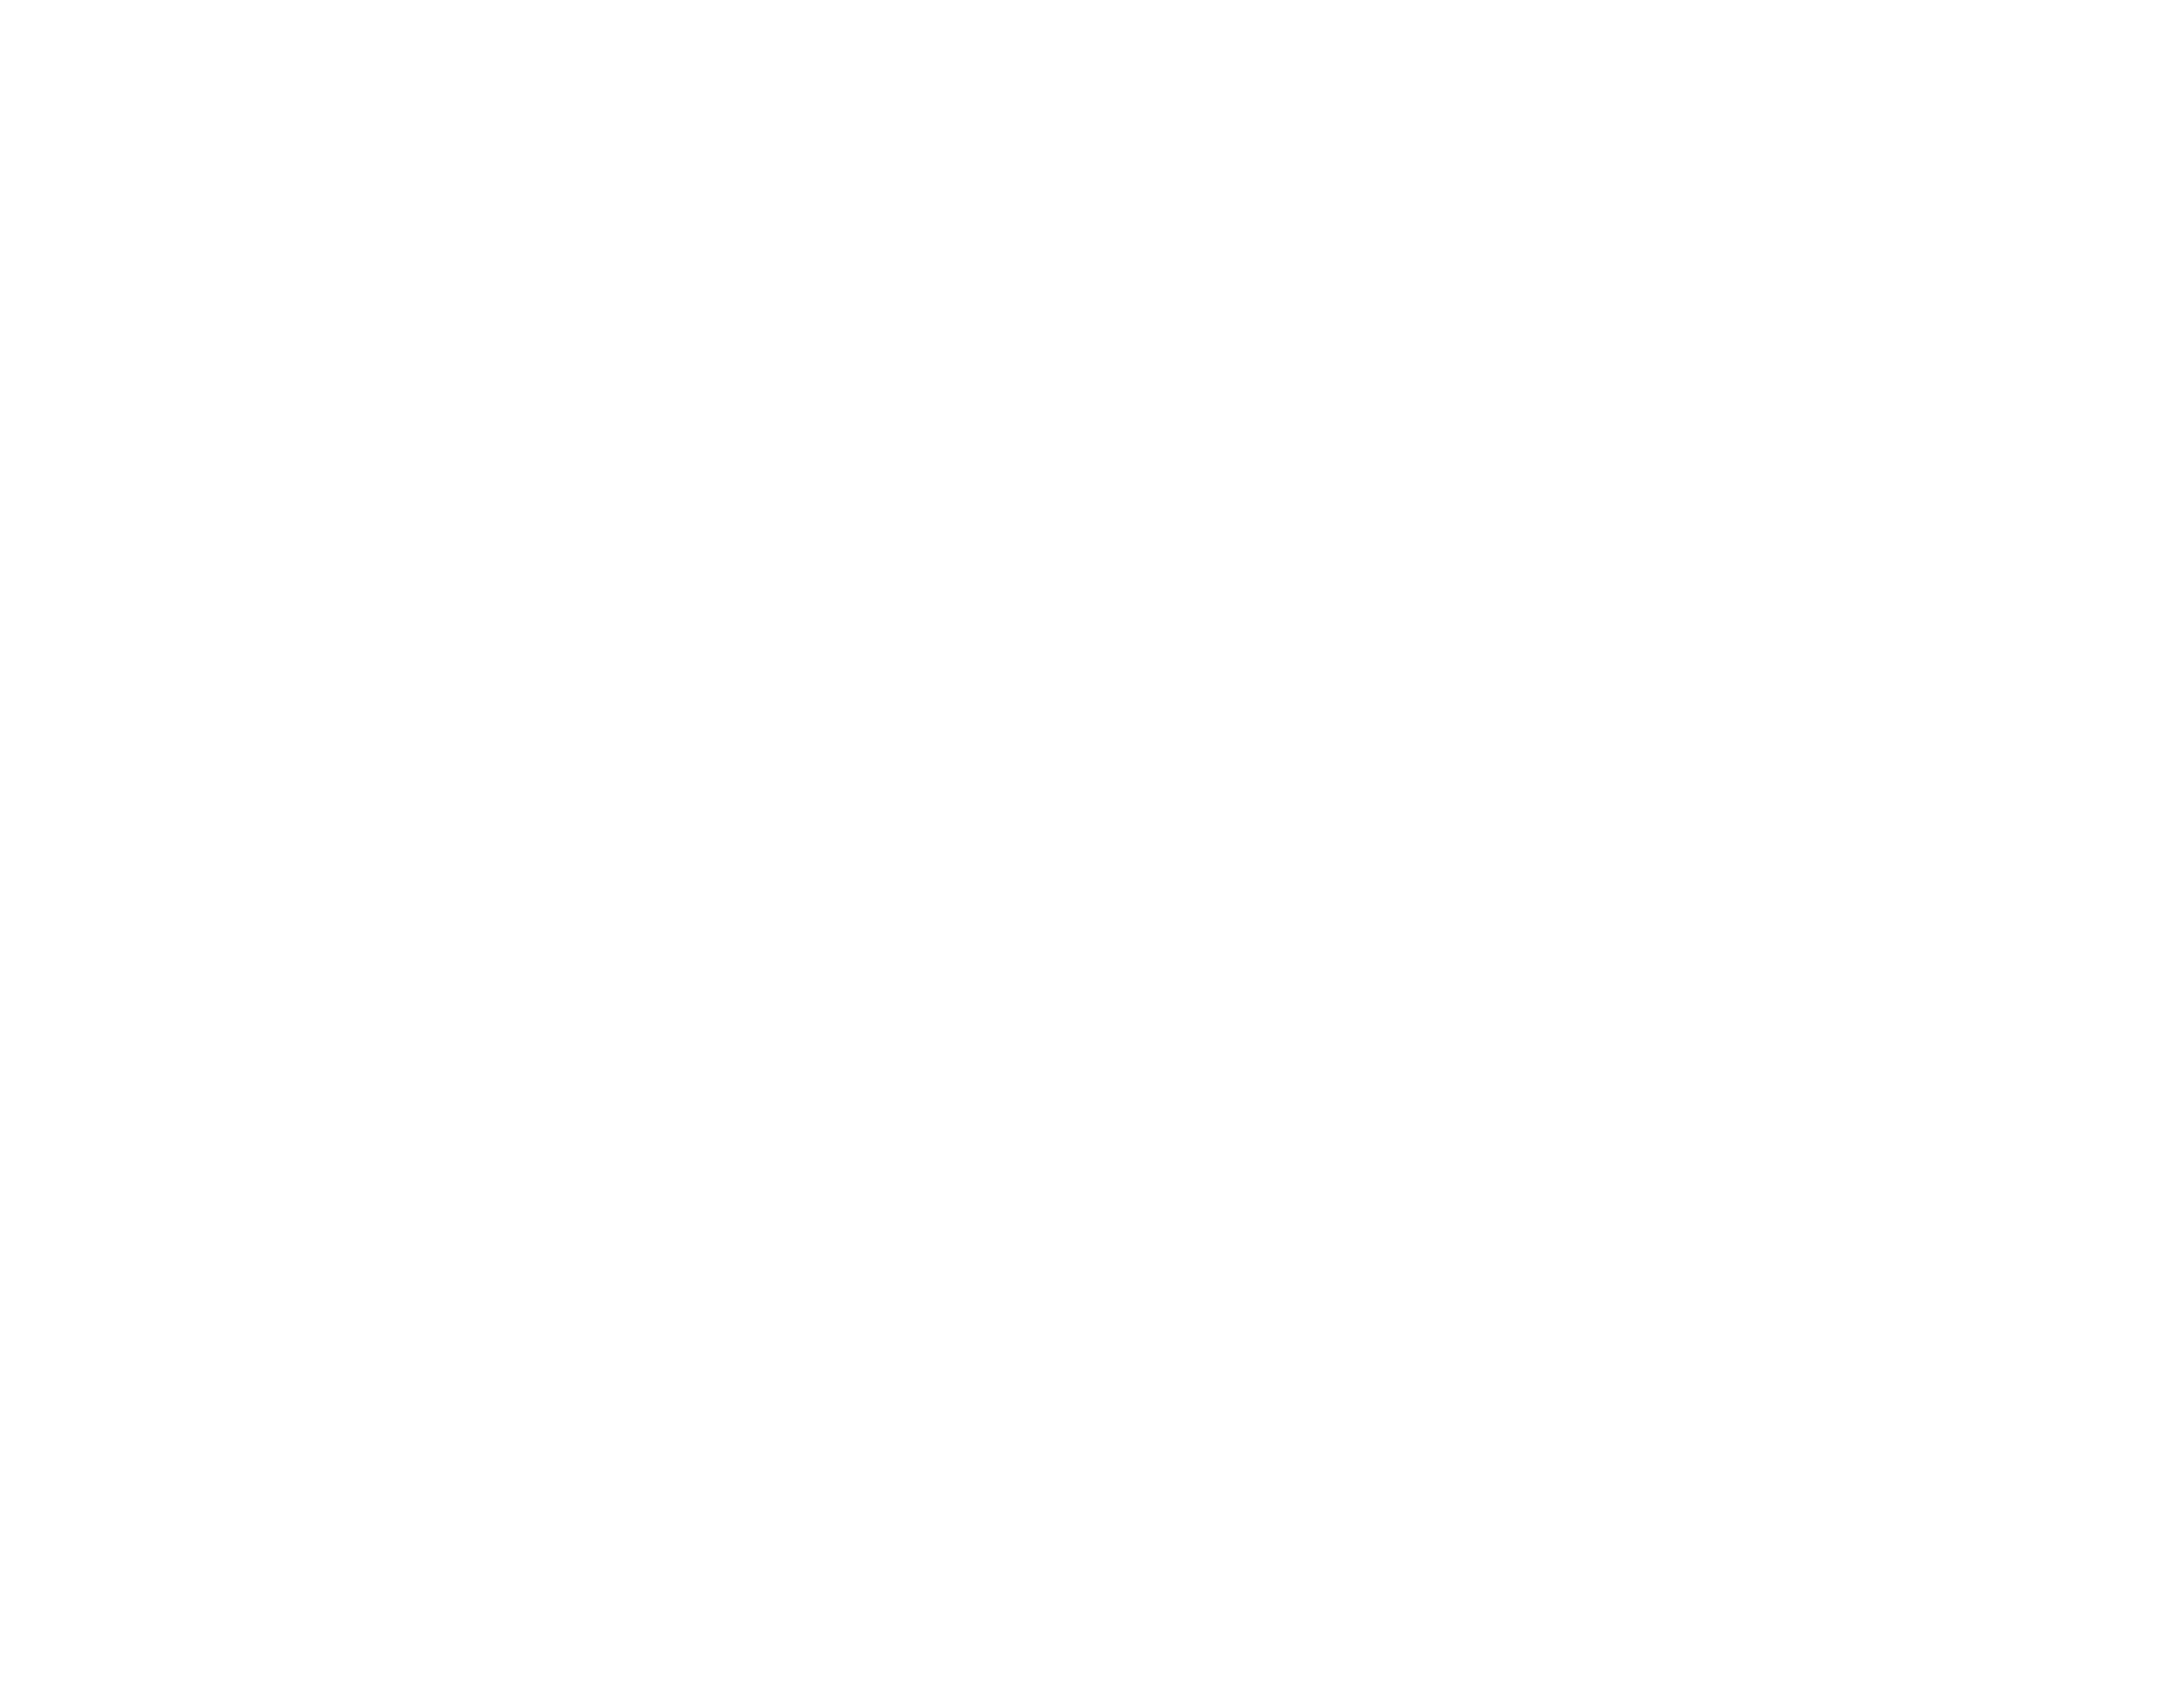

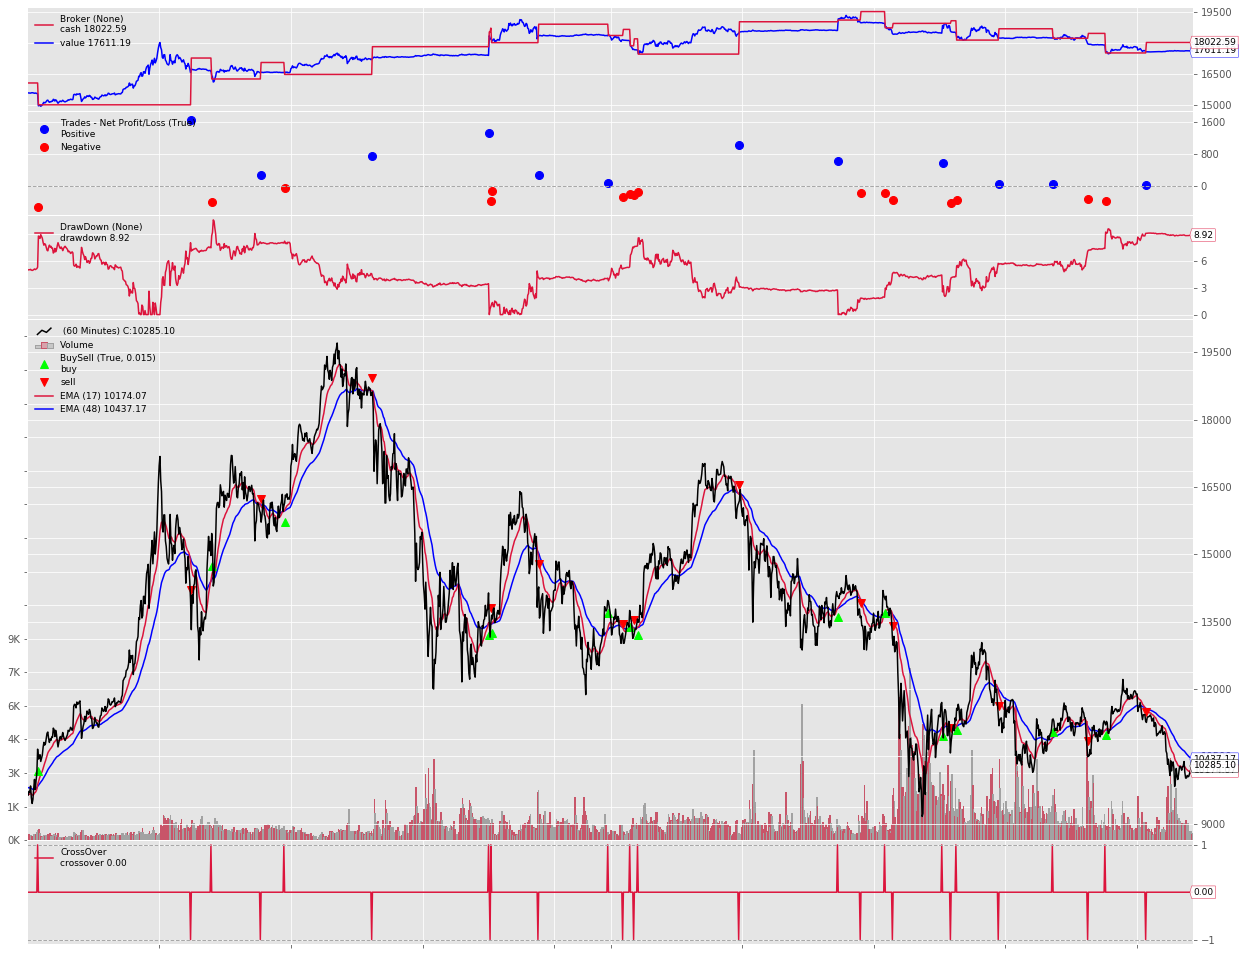

In [33]:
# Simple EMA Crossover on BTC / USDT

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=btc_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', thestrat.analyzers.returns.get_analysis()['rnorm100'] * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 2, 1))
    
    # cerebro.plot()  # plot backtest

## Optimise Simple EMA crossover strategy parameters

In [34]:
# Parameter optimisation for Simple EMA crossover strategy on BTC / USDT

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 17),
        ('long_ema', 48),
        ('mult', 10),
        ('lever', 10),
        ('printlog', False),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))
    
    
#     UNCOMMENT TO OPTIMISE
    def stop(self):
        self.log('(Short EMA %2d), (Long EMA: %2d) Ending Value %.2f' %
                 (self.params.short_ema, self.params.long_ema, self.broker.getvalue()),
                 doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    strats = cerebro.optstrategy(
        TestStrategy,
        short_ema=range(15, 21),
        long_ema=range(45, 51))
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=btc_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Add a Percentage sizer - set to 5% of portfolio value
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=5)
    # cerebro.addsizer(bt.sizers.FixedSize)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Run over everything
    thestrats = cerebro.run(maxcpus=2)  # OPTIMIZE
    thestrat = thestrats[0]


Starting Portfolio Value: 10000.00
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 45) Ending Value 26527.86
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 46) Ending Value 27065.91
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 47) Ending Value 27288.28
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 48) Ending Value 28160.14
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 49) Ending Value 28533.71
2019-08-21T14:59:59.999004, (Short EMA 15), (Long EMA: 50) Ending Value 28993.97
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 45) Ending Value 27908.95
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 46) Ending Value 28288.49
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 47) Ending Value 28542.90
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 48) Ending Value 28945.60
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 49) Ending Value 30295.61
2019-08-21T14:59:59.999004, (Short EMA 16), (Long EMA: 50) Ending Value 27

The performance didn't improve as much as in case of Ether but 16 and 49 gave us a bit of extra profit.

## Backtest with optimised parameters for simple EMA crossover

Starting Portfolio Value: 10000.00
2017-08-23T01:59:59.998997, BUY CREATE , 4100.00
2017-08-23T02:59:59.999004, BUY EXECUTED, Price: 4101.53, Cost: 492.18, Comm 0.49
2017-08-23T02:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 492.18
2017-08-28T04:59:59.998997, CLOSE LONG , 4227.00
2017-08-28T04:59:59.998997, SELL CREATE , 4227.00
2017-08-28T05:59:59.999004, SELL EXECUTED, Price: 4251.92, Cost: 492.18, Comm 0.58
2017-08-28T05:59:59.999004, SELL EXECUTED, Price: 4251.92, Cost: -510.23, Comm 0.51
2017-08-28T05:59:59.999004, OPERATION PROFIT, GROSS 180.47, NET 179.40, Acc Balance: 10188.84
2017-08-28T05:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -510.23
2017-08-28T19:59:59.998997, CLOSE SHORT , 4321.65
2017-08-28T19:59:59.998997, BUY CREATE , 4321.65
2017-08-28T20:59:59.999004, BUY EXECUTED, Price: 4321.65, Cost: -510.23, Comm 0.52
2017-08-28T20:59:59.999004, BUY EXECUTED, Price: 4321.65, Cost: 518.60, Comm 0.52
2017-08-28T20:59:59.999004, OPERATION PROFIT, GROSS -83.68, NET -84.70, Acc Bal

2017-11-08T05:59:59.999004, CLOSE SHORT , 7357.97
2017-11-08T05:59:59.999004, BUY CREATE , 7357.97
2017-11-08T06:59:59.999000, BUY EXECUTED, Price: 7350.00, Cost: -506.45, Comm 0.54
2017-11-08T06:59:59.999000, BUY EXECUTED, Price: 7350.00, Cost: 514.50, Comm 0.51
2017-11-08T06:59:59.999000, OPERATION PROFIT, GROSS -80.49, NET -81.53, Acc Balance: 13502.41
2017-11-08T06:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 514.50
2017-11-09T11:59:59.999004, CLOSE LONG , 7076.00
2017-11-09T11:59:59.999004, SELL CREATE , 7076.00
2017-11-09T12:59:59.999000, SELL EXECUTED, Price: 7076.00, Cost: 514.50, Comm 0.51
2017-11-09T12:59:59.999000, SELL EXECUTED, Price: 7076.00, Cost: -495.32, Comm 0.50
2017-11-09T12:59:59.999000, OPERATION PROFIT, GROSS -191.80, NET -192.82, Acc Balance: 13293.10
2017-11-09T12:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -495.32
2017-11-13T13:59:59.998997, CLOSE SHORT , 6561.81
2017-11-13T13:59:59.998997, BUY CREATE , 6561.81
2017-11-13T14:59:59.999004, BUY EXECUTED, Price: 6

2018-02-11T04:00:00.998995, CLOSE LONG , 7976.74
2018-02-11T04:00:00.998995, SELL CREATE , 7976.74
2018-02-11T04:59:59.998997, SELL EXECUTED, Price: 7976.74, Cost: 535.84, Comm 0.62
2018-02-11T04:59:59.998997, SELL EXECUTED, Price: 7976.74, Cost: -478.60, Comm 0.48
2018-02-11T04:59:59.998997, OPERATION PROFIT, GROSS 225.27, NET 224.12, Acc Balance: 19785.71
2018-02-11T04:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: -478.60
2018-02-12T02:59:59.999004, CLOSE SHORT , 8518.00
2018-02-12T02:59:59.999004, BUY CREATE , 8518.00
2018-02-12T03:59:59.999000, BUY EXECUTED, Price: 8518.00, Cost: -478.60, Comm 0.52
2018-02-12T03:59:59.999000, BUY EXECUTED, Price: 8518.00, Cost: 511.08, Comm 0.51
2018-02-12T03:59:59.999000, OPERATION PROFIT, GROSS -324.76, NET -325.76, Acc Balance: 19436.09
2018-02-12T03:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 511.08
2018-02-21T08:59:59.999004, CLOSE LONG , 11021.70
2018-02-21T08:59:59.999004, SELL CREATE , 11021.70
2018-02-21T09:59:59.999000, SELL EXECUTED, Price

2018-05-10T00:59:59.999000, CLOSE SHORT , 9323.20
2018-05-10T00:59:59.999000, BUY CREATE , 9323.20
2018-05-10T01:59:59.998997, BUY EXECUTED, Price: 9323.20, Cost: -476.85, Comm 0.52
2018-05-10T01:59:59.998997, BUY EXECUTED, Price: 9323.20, Cost: 466.16, Comm 0.47
2018-05-10T01:59:59.998997, OPERATION PROFIT, GROSS 106.89, NET 105.89, Acc Balance: 22974.90
2018-05-10T01:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: 466.16
2018-05-10T19:59:59.998997, CLOSE LONG , 9085.00
2018-05-10T19:59:59.998997, SELL CREATE , 9085.00
2018-05-10T20:59:59.999004, SELL EXECUTED, Price: 9085.00, Cost: 466.16, Comm 0.45
2018-05-10T20:59:59.999004, SELL EXECUTED, Price: 9085.00, Cost: -545.10, Comm 0.55
2018-05-10T20:59:59.999004, OPERATION PROFIT, GROSS -119.10, NET -120.02, Acc Balance: 22857.53
2018-05-10T20:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -545.10
2018-05-13T19:59:59.998997, CLOSE SHORT , 8632.00
2018-05-13T19:59:59.998997, BUY CREATE , 8632.00
2018-05-13T20:59:59.999004, BUY EXECUTED, Price: 8

2018-07-21T18:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 518.89
2018-07-26T22:59:59.998997, CLOSE LONG , 7915.00
2018-07-26T22:59:59.998997, SELL CREATE , 7915.00
2018-07-26T23:59:59.999004, SELL EXECUTED, Price: 7917.00, Cost: 518.89, Comm 0.63
2018-07-26T23:59:59.999004, SELL EXECUTED, Price: 7917.00, Cost: -475.02, Comm 0.48
2018-07-26T23:59:59.999004, OPERATION PROFIT, GROSS 352.98, NET 351.83, Acc Balance: 24395.30
2018-07-26T23:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -475.02
2018-07-27T20:59:59.999004, CLOSE SHORT , 8230.41
2018-07-27T20:59:59.999004, BUY CREATE , 8230.41
2018-07-27T21:59:59.999000, BUY EXECUTED, Price: 8230.40, Cost: -475.02, Comm 0.51
2018-07-27T21:59:59.999000, BUY EXECUTED, Price: 8230.40, Cost: 493.82, Comm 0.49
2018-07-27T21:59:59.999000, OPERATION PROFIT, GROSS -188.04, NET -189.02, Acc Balance: 24220.99
2018-07-27T21:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 493.82
2018-07-30T11:59:59.999004, CLOSE LONG , 8155.00
2018-07-30T11:59:59.999004, SELL CR

2018-10-10T04:59:59.998997, CLOSE LONG , 6594.40
2018-10-10T04:59:59.998997, SELL CREATE , 6594.40
2018-10-10T05:59:59.999004, SELL EXECUTED, Price: 6594.40, Cost: 529.25, Comm 0.56
2018-10-10T05:59:59.999004, SELL EXECUTED, Price: 6594.40, Cost: -527.55, Comm 0.53
2018-10-10T05:59:59.999004, OPERATION PROFIT, GROSS -17.02, NET -18.10, Acc Balance: 24609.36
2018-10-10T05:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -527.55
2018-10-14T04:59:59.998997, CLOSE SHORT , 6391.67
2018-10-14T04:59:59.998997, BUY CREATE , 6391.67
2018-10-14T05:59:59.999004, BUY EXECUTED, Price: 6391.73, Cost: -527.55, Comm 0.57
2018-10-14T05:59:59.999004, BUY EXECUTED, Price: 6391.73, Cost: 511.34, Comm 0.51
2018-10-14T05:59:59.999004, OPERATION PROFIT, GROSS 162.14, NET 161.04, Acc Balance: 24755.61
2018-10-14T05:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 511.34
2018-10-18T14:59:59.999004, CLOSE LONG , 6707.42
2018-10-18T14:59:59.999004, SELL CREATE , 6707.42
2018-10-18T15:59:59.999000, SELL EXECUTED, Price: 67

2019-01-05T01:59:59.998997, CLOSE SHORT , 3803.58
2019-01-05T01:59:59.998997, BUY CREATE , 3803.58
2019-01-05T02:59:59.999004, BUY EXECUTED, Price: 3803.56, Cost: -488.28, Comm 0.52
2019-01-05T02:59:59.999004, BUY EXECUTED, Price: 3803.56, Cost: 494.46, Comm 0.49
2019-01-05T02:59:59.999004, OPERATION PROFIT, GROSS -61.83, NET -62.84, Acc Balance: 26589.06
2019-01-05T02:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 494.46
2019-01-06T03:59:59.999000, CLOSE LONG , 3771.15
2019-01-06T03:59:59.999000, SELL CREATE , 3771.15
2019-01-06T04:59:59.998997, SELL EXECUTED, Price: 3771.70, Cost: 494.46, Comm 0.50
2019-01-06T04:59:59.998997, SELL EXECUTED, Price: 3771.70, Cost: -490.32, Comm 0.49
2019-01-06T04:59:59.998997, OPERATION PROFIT, GROSS -41.42, NET -42.42, Acc Balance: 26537.30
2019-01-06T04:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: -490.32
2019-01-06T12:59:59.999000, CLOSE SHORT , 3790.81
2019-01-06T12:59:59.999000, BUY CREATE , 3790.81
2019-01-06T13:59:59.998997, BUY EXECUTED, Price: 379

2019-02-12T02:59:59.999004, CLOSE LONG , 3613.39
2019-02-12T02:59:59.999004, SELL CREATE , 3613.39
2019-02-12T03:59:59.999000, SELL EXECUTED, Price: 3614.46, Cost: 515.87, Comm 0.60
2019-02-12T03:59:59.999000, SELL EXECUTED, Price: 3614.46, Cost: -506.02, Comm 0.51
2019-02-12T03:59:59.999000, OPERATION PROFIT, GROSS 263.04, NET 261.93, Acc Balance: 26024.52
2019-02-12T03:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: -506.02
2019-02-12T20:59:59.999004, CLOSE SHORT , 3647.64
2019-02-12T20:59:59.999004, BUY CREATE , 3647.64
2019-02-12T21:59:59.999000, BUY EXECUTED, Price: 3647.62, Cost: -506.02, Comm 0.51
2019-02-12T21:59:59.999000, BUY EXECUTED, Price: 3647.62, Cost: 510.67, Comm 0.51
2019-02-12T21:59:59.999000, OPERATION PROFIT, GROSS -46.42, NET -47.44, Acc Balance: 25942.48
2019-02-12T21:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 510.67
2019-02-12T22:59:59.998997, CLOSE LONG , 3620.64
2019-02-12T22:59:59.998997, SELL CREATE , 3620.64
2019-02-12T23:59:59.999004, SELL EXECUTED, Price: 36

2019-04-11T09:59:59.999000, CLOSE LONG , 5055.61
2019-04-11T09:59:59.999000, SELL CREATE , 5055.61
2019-04-11T10:59:59.998997, SELL EXECUTED, Price: 5054.42, Cost: 518.91, Comm 0.87
2019-04-11T10:59:59.998997, SELL EXECUTED, Price: 5054.42, Cost: -505.44, Comm 0.51
2019-04-11T10:59:59.998997, OPERATION PROFIT, GROSS 1381.68, NET 1380.29, Acc Balance: 27299.93
2019-04-11T10:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: -505.44
2019-04-14T18:59:59.999000, CLOSE SHORT , 5087.00
2019-04-14T18:59:59.999000, BUY CREATE , 5087.00
2019-04-14T19:59:59.998997, BUY EXECUTED, Price: 5087.14, Cost: -505.44, Comm 0.55
2019-04-14T19:59:59.998997, BUY EXECUTED, Price: 5087.14, Cost: 508.71, Comm 0.51
2019-04-14T19:59:59.998997, OPERATION PROFIT, GROSS -32.72, NET -33.78, Acc Balance: 27246.03
2019-04-14T19:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: 508.71
2019-04-15T20:59:59.999004, CLOSE LONG , 5018.25
2019-04-15T20:59:59.999004, SELL CREATE , 5018.25
2019-04-15T21:59:59.999000, SELL EXECUTED, Price: 

2019-06-28T19:59:59.998997, CLOSE SHORT , 12368.43
2019-06-28T19:59:59.998997, BUY CREATE , 12368.43
2019-06-28T20:59:59.999004, BUY EXECUTED, Price: 12366.71, Cost: -473.20, Comm 0.51
2019-06-28T20:59:59.999004, BUY EXECUTED, Price: 12366.71, Cost: 494.67, Comm 0.49
2019-06-28T20:59:59.999004, OPERATION PROFIT, GROSS -214.68, NET -215.66, Acc Balance: 29894.49
2019-06-28T20:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: 494.67
2019-06-29T06:59:59.999000, CLOSE LONG , 11842.35
2019-06-29T06:59:59.999000, SELL CREATE , 11842.35
2019-06-29T07:59:59.998997, SELL EXECUTED, Price: 11844.67, Cost: 494.67, Comm 0.49
2019-06-29T07:59:59.998997, SELL EXECUTED, Price: 11844.67, Cost: -473.79, Comm 0.47
2019-06-29T07:59:59.998997, OPERATION PROFIT, GROSS -208.82, NET -209.80, Acc Balance: 29718.21
2019-06-29T07:59:59.998997, TRADE OPENED, SIZE:  0 , VAL: -473.79
2019-06-29T13:59:59.998997, CLOSE SHORT , 12025.54
2019-06-29T13:59:59.998997, BUY CREATE , 12025.54
2019-06-29T14:59:59.999004, BUY EXECUT

2019-08-08T19:59:59.998997, CLOSE LONG , 11615.82
2019-08-08T19:59:59.998997, SELL CREATE , 11615.82
2019-08-08T20:59:59.999004, SELL EXECUTED, Price: 11614.59, Cost: 484.24, Comm 0.70
2019-08-08T20:59:59.999004, SELL EXECUTED, Price: 11614.59, Cost: -464.58, Comm 0.46
2019-08-08T20:59:59.999004, OPERATION PROFIT, GROSS 964.87, NET 963.69, Acc Balance: 30465.53
2019-08-08T20:59:59.999004, TRADE OPENED, SIZE:  0 , VAL: -464.58
2019-08-08T23:59:59.999004, CLOSE SHORT , 11999.77
2019-08-08T23:59:59.999004, BUY CREATE , 11999.77
2019-08-09T00:59:59.999000, BUY EXECUTED, Price: 11994.17, Cost: -464.58, Comm 0.49
2019-08-09T00:59:59.999000, BUY EXECUTED, Price: 11994.17, Cost: 479.77, Comm 0.48
2019-08-09T00:59:59.999000, OPERATION PROFIT, GROSS -151.83, NET -152.79, Acc Balance: 30305.52
2019-08-09T00:59:59.999000, TRADE OPENED, SIZE:  0 , VAL: 479.77
2019-08-10T11:59:59.999004, CLOSE LONG , 11395.23
2019-08-10T11:59:59.999004, SELL CREATE , 11395.23
2019-08-10T12:59:59.999000, SELL EXECUTE

<IPython.core.display.Javascript object>


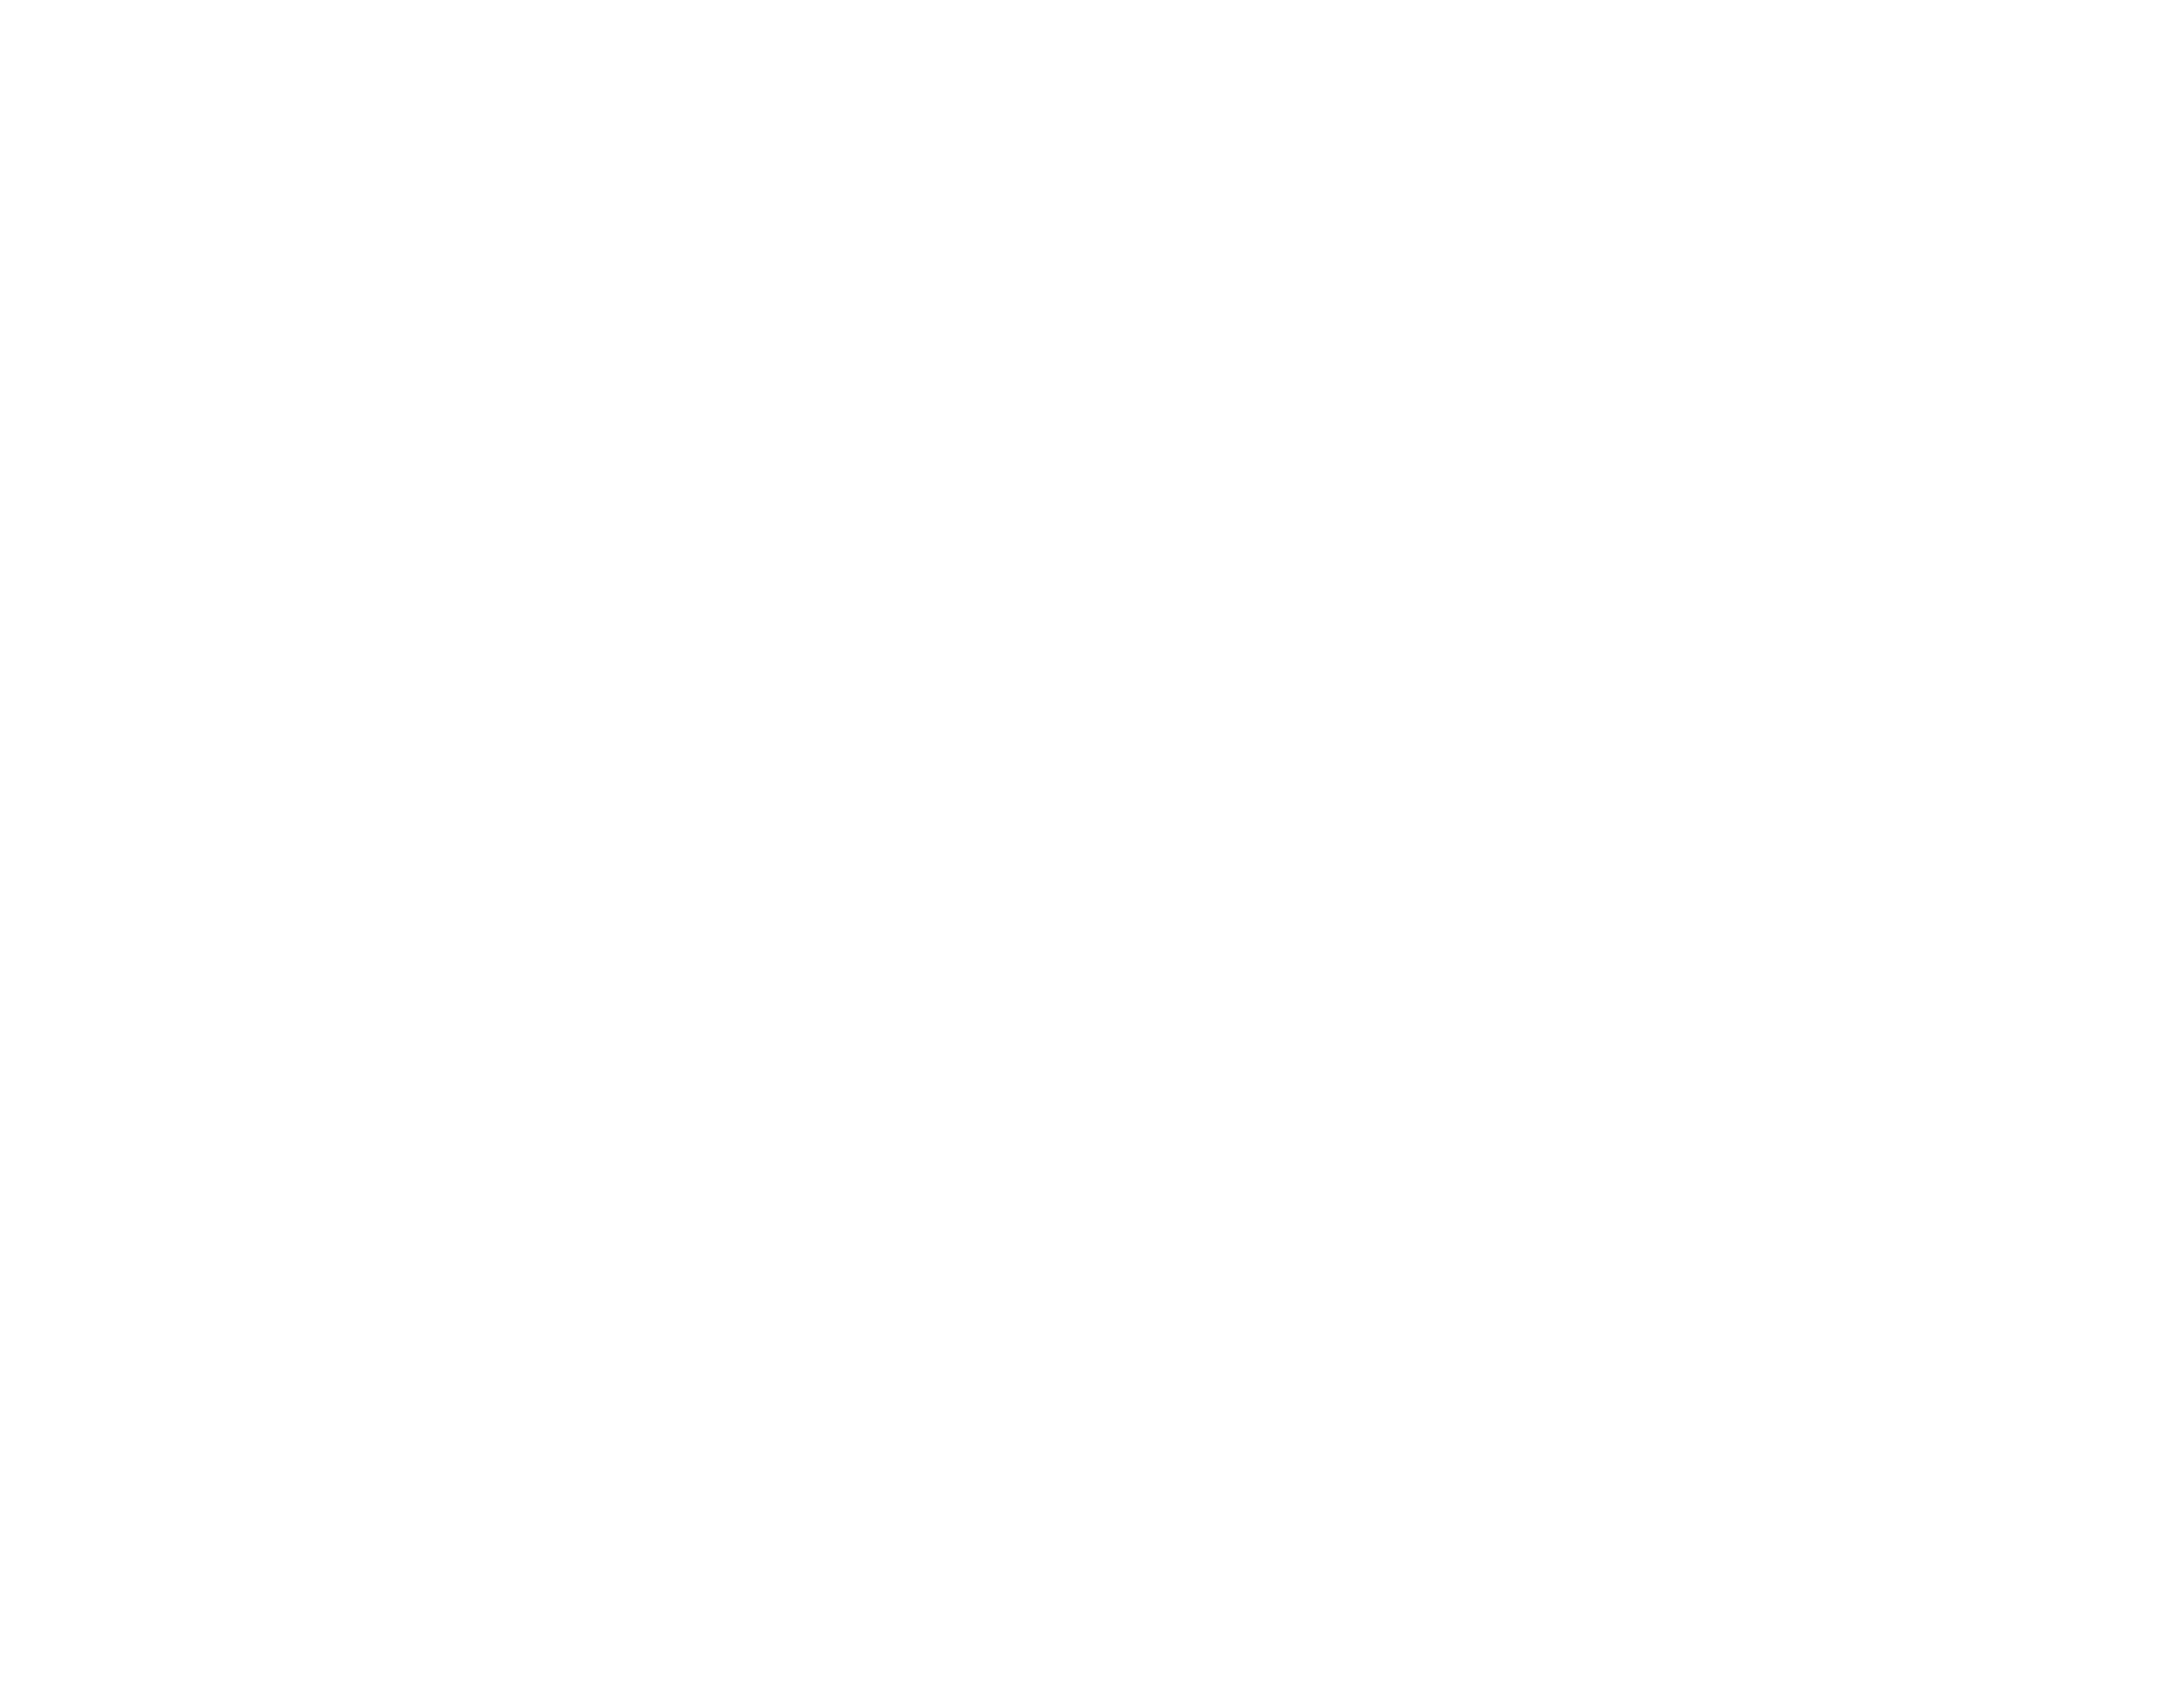

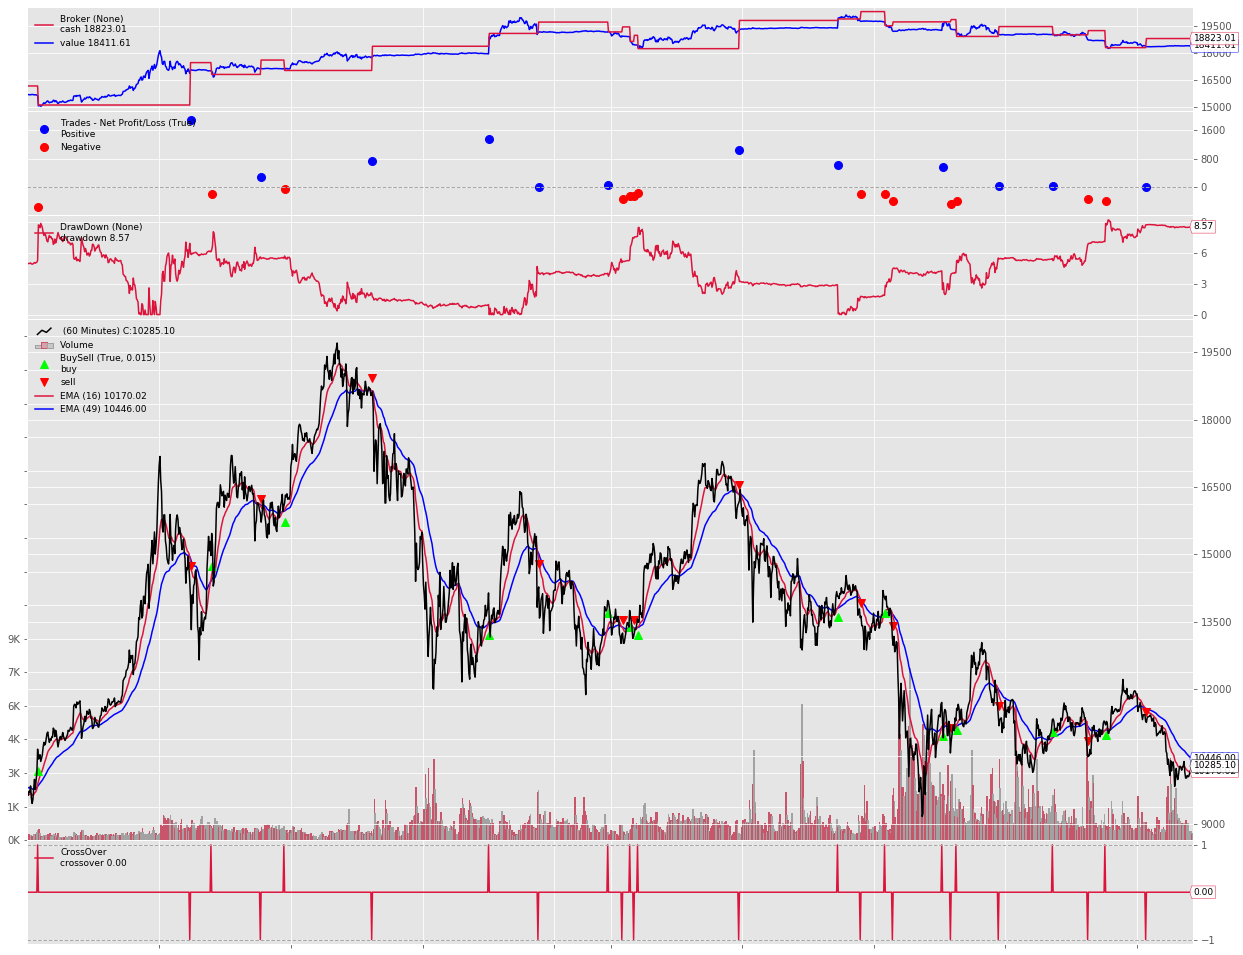

In [35]:
# Backtest with optimised parameters for simple EMA crossover on BTC / USDT

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('short_ema', 16),
        ('long_ema', 49),
        ('mult', 10),  # multiply profits and loses (margin trading)
        ('lever', 10),
        ('printlog', True),
        ('trailstoppct', 0.05),  # trailstop order trail 0.05 = 5%
    )


    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add exponential moving averages
        ema_short = bt.ind.EMA(period=self.params.short_ema)
        ema_long = bt.ind.EMA(period=self.params.long_ema)
        
        self.crossover = bt.ind.CrossOver(ema_short, ema_long)


    def next(self):
        
        # Simply log the closing price of the series from the reference
        # self.log('Close, %.2f' % self.dataclose[0])
        
        if self.order:
            return  # if an order is active, no new orders are allowed
            
        if self.crossover > 0:  # cross upwards
            if self.position:
                self.log('CLOSE SHORT , %.2f' % self.dataclose[0])
                self.close()

            self.log('BUY CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.buy(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                    # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)

        elif self.crossover < 0:  # cross downwards
            if self.position:
                self.log('CLOSE LONG , %.2f' % self.dataclose[0])
                self.close()

            self.log('SELL CREATE , %.2f' % self.dataclose[0])
            # to make orders at 5% of portfolio value, no more than 500$
            self.sell(size=round(min((cerebro.broker.getvalue()*0.05), 500) / self.dataclose[0], 2))
                     # exectype=bt.Order.StopTrail, trailpercent=self.params.trailstoppct)


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                         )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm)
                        )

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected', doprint=True)

        # Write down: no pending order
        self.order = None


    def notify_trade(self, trade):
        if trade.isclosed:
            self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f, Acc Balance: %.2f' %
                 (trade.pnl, trade.pnlcomm, cerebro.broker.getvalue()))
        
        elif trade.justopened:
            self.log('TRADE OPENED, SIZE: %2d , VAL: %.2f' % (trade.size, trade.value))


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    
    # timeframe and compression tells the system we have hourly data
    data = bt.feeds.PandasData(dataname=btc_usdt1h,
                               timeframe=bt.TimeFrame.Minutes,
                               compression=60)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)  # 10,000

    # Set the commission
    cerebro.broker.setcommission(commission=0.001,  # 0.1% binance commission
                                 mult=TestStrategy.params.mult,
                                 interest=0.01,  # long/short interest 0.01 -> 1%
                                 leverage=TestStrategy.params.lever,
                                 interest_long=True
                                 )
    
    print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

    # Create Analyzers
    # RF = 1%, 
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='mysharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='mydrawdown')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='mytradeanal')
    cerebro.addanalyzer(bt.analyzers.BasicTradeStats , _name='tradestats')
    
    # Create Observers
    cerebro.addobserver(bt.observers.DrawDown)

    # Run over everything
    thestrats = cerebro.run()
    thestrat = thestrats[0]
    
    # Print Analyzers
    print()
    print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())
    print()
    print('Annualised SharpeR:', thestrat.analyzers.mysharpe.get_analysis()['sharperatio'])
    print()
    # CAGR = (end bal / beg bal) ^ 1/n of years - 1
    print('CAGR % ', thestrat.analyzers.returns.get_analysis()['rnorm100'] * 100)
    print()
    printTradeAnalysis(thestrat.analyzers.mytradeanal.get_analysis())
    print()
    printDrawDown(thestrat.analyzers.mydrawdown.get_analysis())
    print()
    pprint.pprint(dict(thestrat.analyzers.tradestats.get_analysis()))
    
    # to plot part of the data
    cerebro.plot(start=datetime.date(2017, 12, 1), end=datetime.date(2018, 2, 1))
    
    # cerebro.plot()  # plot backtest

# The End